In [8]:
sp500_df.isna().any()

Price
Close     False
High      False
Low       False
Open      False
Volume    False
dtype: bool

## Visualisation

In [9]:
sp500_arima = sp500_df.Close

In [10]:
def plot_series(df, name):
    
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df, label=name, color='blue')

    plt.title(name, fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Close', fontsize=14)
    
    plt.gcf().autofmt_xdate()
    plt.grid(True)
    plt.legend()
    plt.show()

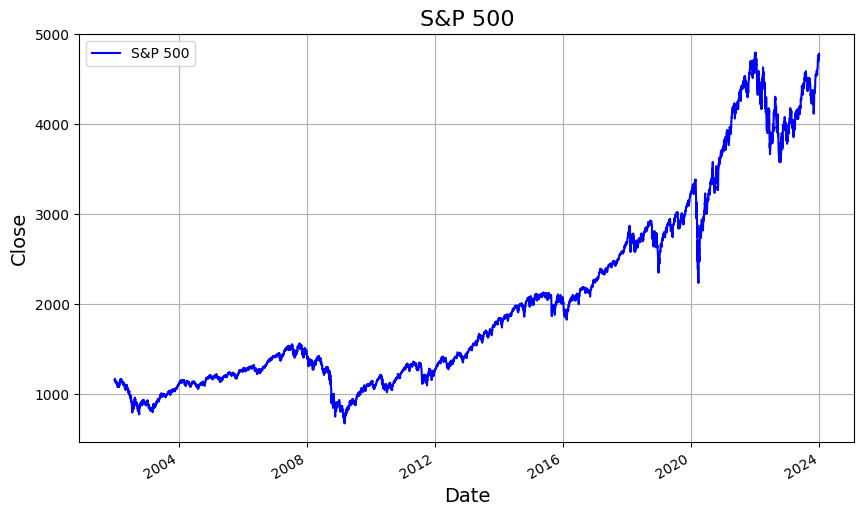

In [55]:
plot_series(sp500_arima, 'S&P 500')

In [56]:
adfuller(sp500_arima, maxlag = 1, regression = 'c', autolag = None)

(0.9739506807332794,
 0.9939833505599031,
 1,
 5535,
 {'1%': -3.431531993729679,
  '5%': -2.862062324527058,
  '10%': -2.567048032068246})

In [57]:
def plot_log_returns(df, name):
    
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, np.log(df/df.shift(1)), label=name, color='blue')

    plt.title(name, fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Returns', fontsize=14)
    
    plt.gcf().autofmt_xdate()
    plt.grid(True)
    plt.legend()
    plt.show()

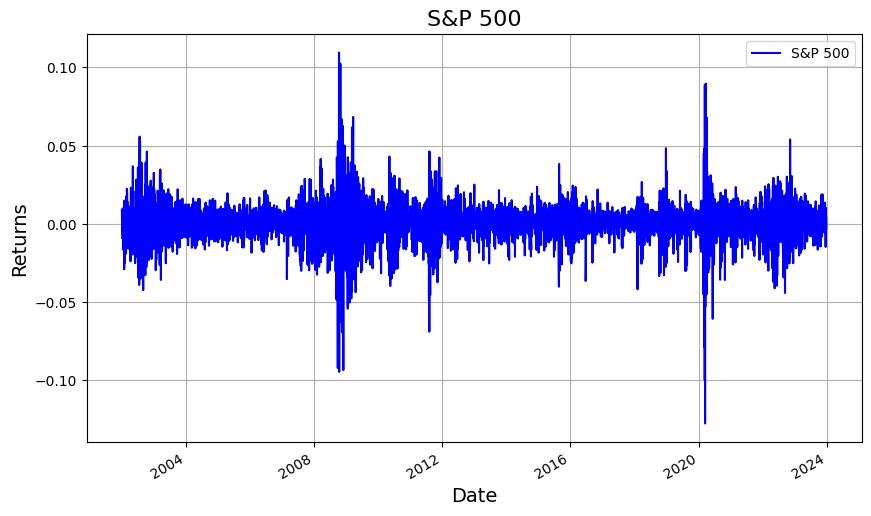

In [58]:
plot_log_returns(sp500_arima, 'S&P 500')

In [60]:
adfuller((np.log(sp500_arima/sp500_arima.shift(1))).dropna(), maxlag = 1, regression = 'c', autolag = None)

(-56.134205455164135,
 0.0,
 1,
 5534,
 {'1%': -3.431532207416466,
  '5%': -2.8620624189367487,
  '10%': -2.5670480823255235})

In [61]:
def plot_hist_log_returns(df, name):
    
    plt.figure(figsize=(10, 6))
    plt.hist(np.log(df/df.shift(1)), bins=25, alpha=0.8, edgecolor='black', label=name, color='blue')

    plt.title(name, fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Returns', fontsize=14)
    
    plt.gcf().autofmt_xdate()
    plt.grid(True)
    plt.legend()
    plt.show()

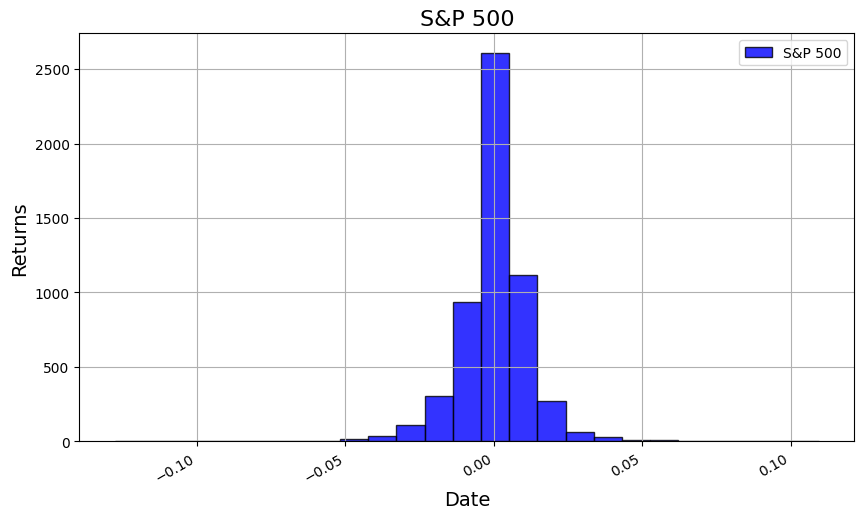

In [62]:
plot_hist_log_returns(sp500_arima, 'S&P 500')

## Basic data description

In [63]:
def describe_data(df, name):
    
    print(f'Description of: {name}\n')

    print(f'Count: {df.count().round()}\n')
    
    print(f'Minimum value: {df.min().round(4)}')
    print(f'1st Quantile: {df.quantile(0.25).round(4)}')
    print(f'Median: {df.quantile(0.5).round(4)}')
    print(f'Mean value: {df.mean().round(4)}')
    print(f'3rd Quantile: {df.quantile(0.75).round(4)}')
    print(f'Maximum value: {df.max().round(4)}\n')

    print(f'Skewness: {skew(df).round(4)}')
    print(f'Kurtosis: {kurtosis(df).round(4)}')
    print(f'Standard Error: {sem(df).round(4)}')
    print(f'Standard Deviation: {df.std().round(4)}')

In [65]:
describe_data(sp500_arima, 'S&P 500')

Description of: S&P 500

Count: 5537

Minimum value: 676.53
1st Quantile: 1191.5
Median: 1525.4
Mean value: 2033.3621
3rd Quantile: 2711.45
Maximum value: 4796.5601

Skewness: 0.9979
Kurtosis: -0.1948
Standard Error: 14.6189
Standard Deviation: 1087.8038


In [66]:
describe_data(np.log(sp500_arima/sp500_arima.shift(1)).dropna(), 'S&P 500 Log Returns')

Description of: S&P 500 Log Returns

Count: 5536

Minimum value: -0.1277
1st Quantile: -0.0045
Median: 0.0007
Mean value: 0.0003
3rd Quantile: 0.0058
Maximum value: 0.1096

Skewness: -0.4229
Kurtosis: 11.4881
Standard Error: 0.0002
Standard Deviation: 0.0122


## Framework for Cross Validation

In [11]:
def CV_machine_expanding(df, train_years=3, val_years=2, test_years=1):

    start_date = df.index[0].year
    end_date = df.index[-1].year 

    current_start_date = start_date
    indices = []

    while True:
        
        train_end_date = current_start_date + train_years - 1
        val_end_date = train_end_date + val_years
        test_end_date = val_end_date + test_years

        if test_end_date > end_date:
            break

        train_set = df.loc[f'{current_start_date}-01-01':f'{train_end_date}-12-31'].index
        val_set1 = df.loc[f'{train_end_date+1}-01-01':f'{val_end_date-1}-08-31'].index
        val_set2 = df.loc[f'{train_end_date+1}-01-01':f'{val_end_date}-04-30'].index
        val_set3 = df.loc[f'{train_end_date+1}-01-01':f'{val_end_date}-12-31'].index
        test_set = df.loc[f'{val_end_date+1}-01-01':f'{test_end_date}-12-31'].index

        indices.append([train_set, [val_set1, val_set2, val_set3], test_set])

        current_start_date = current_start_date + 1
    
    return indices

In [69]:
indices = CV_machine_expanding(sp500_arima)

for i, window in enumerate(indices):
    print(f"Window {i+1}:")
    print("Training set:")
    print(sp500_arima[window[0][:3]])
    print(sp500_arima[window[0][-3:]])
    print("Validation set 1:")
    print(sp500_arima[window[1][0][:3]])
    print(sp500_arima[window[1][0][-3:]])
    print("Validation set 2:")
    print([window[1][1][:3]])
    print(sp500_arima[window[1][1][-3:]])
    print("Validation set 3:")
    print(sp500_arima[window[1][2][:3]])
    print(sp500_arima[window[1][2][-3:]])
    print("Testing set:")
    print(sp500_arima[window[2][:3]])
    print(sp500_arima[window[2][-3:]])
    print("\n")

Window 1:
Training set:
Date
2002-01-02    1154.670044
2002-01-03    1165.270020
2002-01-04    1172.510010
Name: Close, dtype: float64
Date
2004-12-29    1213.449951
2004-12-30    1213.550049
2004-12-31    1211.920044
Name: Close, dtype: float64
Validation set 1:
Date
2005-01-03    1202.079956
2005-01-04    1188.050049
2005-01-05    1183.739990
Name: Close, dtype: float64
Date
2005-08-29    1212.280029
2005-08-30    1208.410034
2005-08-31    1220.329956
Name: Close, dtype: float64
Validation set 2:
[DatetimeIndex(['2005-01-03', '2005-01-04', '2005-01-05'], dtype='datetime64[ns]', name='Date', freq=None)]
Date
2006-04-26    1305.410034
2006-04-27    1309.719971
2006-04-28    1310.609985
Name: Close, dtype: float64
Validation set 3:
Date
2005-01-03    1202.079956
2005-01-04    1188.050049
2005-01-05    1183.739990
Name: Close, dtype: float64
Date
2006-12-27    1426.839966
2006-12-28    1424.729980
2006-12-29    1418.300049
Name: Close, dtype: float64
Testing set:
Date
2007-01-03    1416.

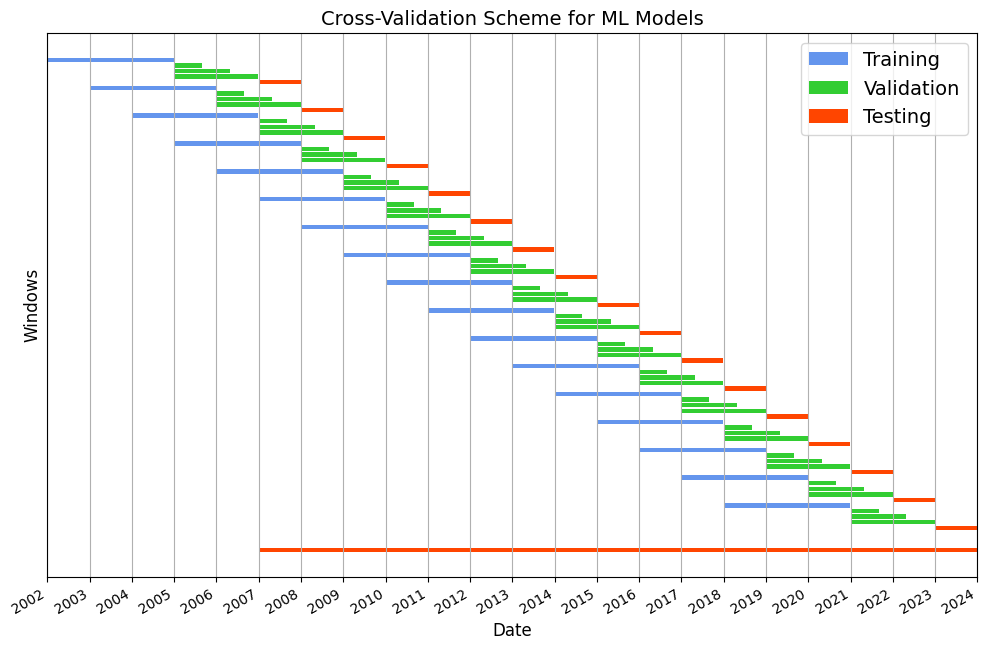

In [13]:
indices = CV_machine_expanding(sp500_arima)

plot_data = []
testing_start_dates = []
testing_end_dates = []

for i, window in enumerate(indices):
    plot_data.append({
        'Type': 'Training',
        'StartDate': window[0][0],
        'EndDate': window[0][-1]
    })
    plot_data.append({
        'Type': 'Validation',
        'StartDate': window[1][0][0],
        'EndDate': window[1][0][-1]
    })
    plot_data.append({
        'Type': 'Validation',
        'StartDate': window[1][1][0],
        'EndDate': window[1][1][-1]
    })
    plot_data.append({
        'Type': 'Validation',
        'StartDate': window[1][2][0],
        'EndDate': window[1][2][-1]
    })
    plot_data.append({
        'Type': 'Testing',
        'StartDate': window[2][0],
        'EndDate': window[2][-1]
    })
    testing_start_dates.append

plot_df = pd.DataFrame(plot_data)

plt.figure(figsize=(12, 8))

colors = {'Training': 'cornflowerblue', 'Validation': 'limegreen', 'Testing': 'orangered'}

for i, (label, color) in enumerate(colors.items()):
    subset = plot_df[plot_df['Type'] == label]
    plt.barh(subset.index, (subset['EndDate'] - subset['StartDate']).dt.days, left=subset['StartDate'].map(mdates.date2num), color=color, label=label)

plt.barh(5*len(indices) + 3, (plot_df[plot_df['Type'] == 'Testing'].EndDate.max() - plot_df[plot_df['Type'] == 'Testing'].StartDate.min()).days, left=plot_df[plot_df['Type'] == 'Testing'].StartDate.min(), color='orangered')

plt.xlabel('Date', fontsize=12)
plt.ylabel('Windows', fontsize=12)
plt.yticks([])
plt.title('Cross-Validation Scheme for ML Models', fontsize=14)
plt.legend(fontsize=14)
plt.grid(True)

plt.gca().invert_yaxis()
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.xlim(pd.Timestamp('2002-01-01'), pd.Timestamp('2024-01-01'))

plt.gcf().autofmt_xdate()

plt.show()

In [8]:
def CV_ARIMA(df, train_years=5, test_years=1):

    start_date = df.index[0].year
    end_date = df.index[-1].year 

    current_start_date = start_date
    indices = []

    while True:
        
        train_end_date = current_start_date + train_years - 1
        test_end_date = train_end_date + test_years

        if test_end_date > end_date:
            break

        train_set = df.loc[f'{current_start_date}-01-01':f'{train_end_date}-12-31'].index
        test_set = df.loc[f'{train_end_date+1}-01-01':f'{test_end_date}-12-31'].index

        indices.append([train_set, test_set])

        current_start_date = current_start_date + 1
    
    return indices

In [72]:
indices = CV_ARIMA(sp500_arima)

for i, window in enumerate(indices):
    print(f"Window {i+1}:")
    print("Training set:")
    print(sp500_arima[window[0][:3]])
    print(sp500_arima[window[0][-3:]])
    print("Testing set:")
    print(sp500_arima[window[1][:3]])
    print(sp500_arima[window[1][-3:]])
    print("\n")

Window 1:
Training set:
Date
2002-01-02    1154.670044
2002-01-03    1165.270020
2002-01-04    1172.510010
Name: Close, dtype: float64
Date
2006-12-27    1426.839966
2006-12-28    1424.729980
2006-12-29    1418.300049
Name: Close, dtype: float64
Testing set:
Date
2007-01-03    1416.599976
2007-01-04    1418.339966
2007-01-05    1409.709961
Name: Close, dtype: float64
Date
2007-12-27    1476.270020
2007-12-28    1478.489990
2007-12-31    1468.359985
Name: Close, dtype: float64


Window 2:
Training set:
Date
2003-01-02    909.030029
2003-01-03    908.590027
2003-01-06    929.010010
Name: Close, dtype: float64
Date
2007-12-27    1476.270020
2007-12-28    1478.489990
2007-12-31    1468.359985
Name: Close, dtype: float64
Testing set:
Date
2008-01-02    1447.160034
2008-01-03    1447.160034
2008-01-04    1411.630005
Name: Close, dtype: float64
Date
2008-12-29    869.419983
2008-12-30    890.640015
2008-12-31    903.250000
Name: Close, dtype: float64


Window 3:
Training set:
Date
2004-01-02 

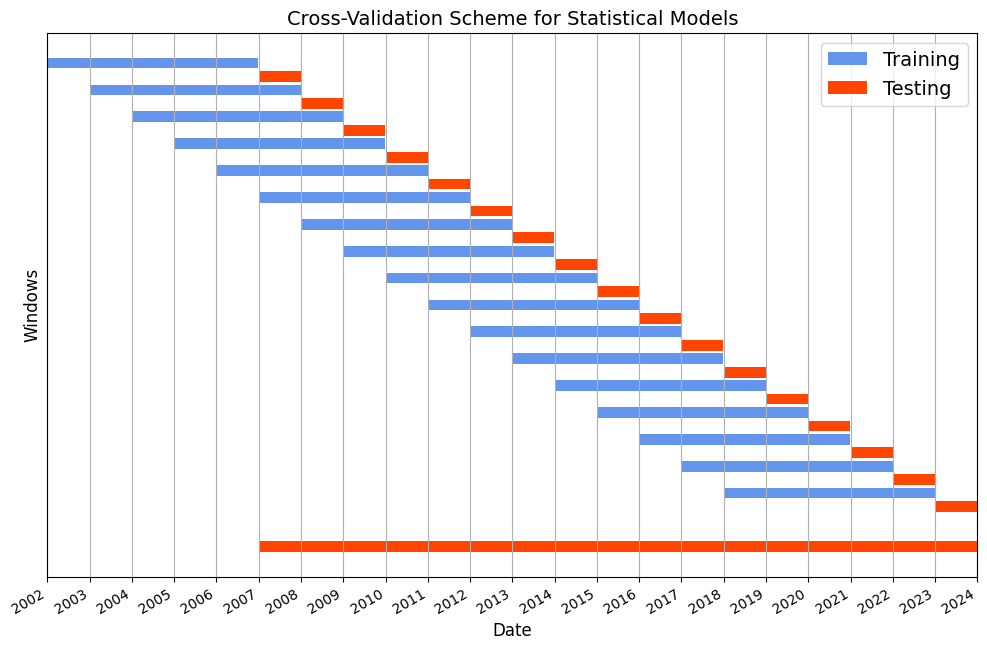

In [73]:
indices = CV_ARIMA(sp500_arima)

plot_data = []
testing_start_dates = []
testing_end_dates = []

for i, window in enumerate(indices):
    plot_data.append({
        'Type': 'Training',
        'StartDate': window[0][0],
        'EndDate': window[0][-1]
    })
    plot_data.append({
        'Type': 'Testing',
        'StartDate': window[1][0],
        'EndDate': window[1][-1]
    })
    testing_start_dates.append

plot_df = pd.DataFrame(plot_data)

plt.figure(figsize=(12, 8))

colors = {'Training': 'cornflowerblue', 'Testing': 'orangered'}

for i, (label, color) in enumerate(colors.items()):
    subset = plot_df[plot_df['Type'] == label]
    plt.barh(subset.index, (subset['EndDate'] - subset['StartDate']).dt.days, left=subset['StartDate'].map(mdates.date2num), color=color, label=label)

plt.barh(2*len(indices) + 2, (plot_df[plot_df['Type'] == 'Testing'].EndDate.max() - plot_df[plot_df['Type'] == 'Testing'].StartDate.min()).days, left=plot_df[plot_df['Type'] == 'Testing'].StartDate.min(), color='orangered')

plt.xlabel('Date', fontsize=12)
plt.ylabel('Windows', fontsize=12)
plt.yticks([])
plt.title('Cross-Validation Scheme for Statistical Models', fontsize=14)
plt.legend(fontsize=14)
plt.grid(True)

plt.gca().invert_yaxis()
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.xlim(pd.Timestamp('2002-01-01'), pd.Timestamp('2024-01-01'))

plt.gcf().autofmt_xdate()

plt.show()

## Function for calculating metrics

In [23]:
def mean_absolute_directional_loss(y_observed, y_predicted):

    y_observed = np.array(y_observed)
    y_predicted = np.array(y_predicted)
    
    direction = np.sign(y_observed * y_predicted)
    loss = np.abs(y_observed)
    directional_loss = (-1) * direction * loss
    
    MADL = np.mean(directional_loss)
    
    return MADL

In [14]:
def calculate_metrics(y_observed, y_predicted, returns = False):
    
    if not returns:
        metrics = {
            'MAE': mean_absolute_error(y_observed, y_predicted),
            'RMSE': root_mean_squared_error(y_observed, y_predicted),
        }
    else:
        metrics = {
            'MAE': mean_absolute_error(y_observed, y_predicted),
            'RMSE': root_mean_squared_error(y_observed, y_predicted),
            'MADL': mean_absolute_directional_loss(y_observed, y_predicted)
        }
    return metrics

## ARIMA

In [81]:
sp500_arima = pd.DataFrame(sp500_arima, columns = ['Close'])
sp500_arima

,Close
Date,
2002-01-02,1154.670044
2002-01-03,1165.270020
2002-01-04,1172.510010
2002-01-07,1164.890015
2002-01-08,1160.709961
...,...
2023-12-22,4754.629883
2023-12-26,4774.750000
2023-12-27,4781.580078


In [82]:
sp500_arima['Log_Returns'] = np.log(sp500_arima.Close / sp500_arima.Close.shift(1))
sp500_arima

,Close,Log_Returns
Date,,
2002-01-02,1154.670044,NaN
2002-01-03,1165.270020,0.009138
2002-01-04,1172.510010,0.006194
2002-01-07,1164.890015,-0.006520
2002-01-08,1160.709961,-0.003595
...,...,...
2023-12-22,4754.629883,0.001659
2023-12-26,4774.750000,0.004223
2023-12-27,4781.580078,0.001429


In [83]:
def plot_acf_pacf(ts, lags=40):

    fig, ax = plt.subplots(1, 2, figsize=(18, 8))
    
    plot_acf(ts, lags=lags, auto_ylims=True, ax=ax[0])
    plot_pacf(ts, lags=lags, auto_ylims=True, ax=ax[1])
    
    ax[0].set_ylim(-0.2, 0.2)
    ax[1].set_ylim(-0.2, 0.2)
    
    plt.show()

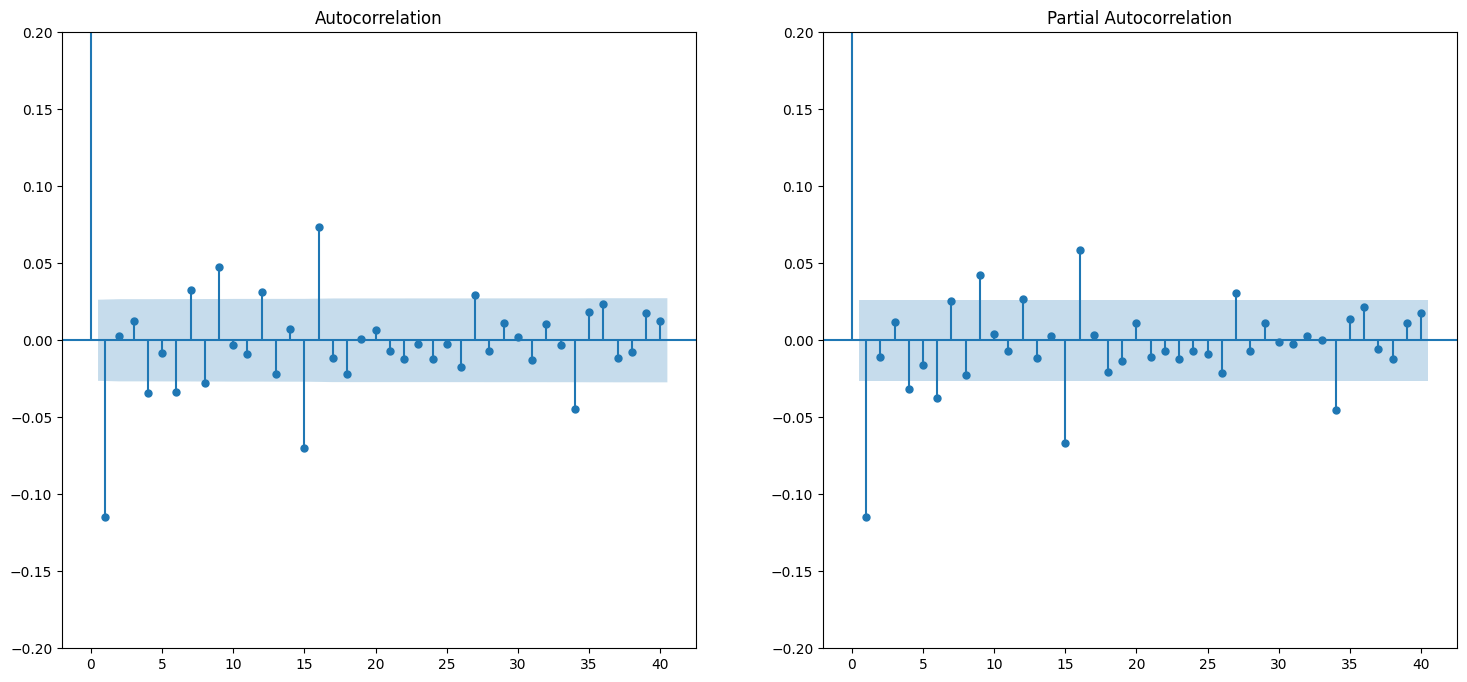

In [84]:
plot_acf_pacf(sp500_arima['Log_Returns'].dropna())

In [85]:
def fit_ARIMA_auto(series):
    
    best_aic_model = {'orders': (), 'aic_value': float("inf")}

    model_aic = auto_arima(series, start_p=0, d = 0, start_q=0, max_p=5, max_q=5, max_order = None, 
                           seasonal = False, stationary = True, stepwise = True, information_criterion = 'aic')

    best_aic_model['orders'] = model_aic.get_params()['order']

    best_aic_model['aic_value'] = model_aic.aic()

    return best_aic_model

In [83]:
model = auto_arima(sp500_arima['Log_Returns'].dropna(), start_p=0, start_q=0, max_p=5, max_d = 1, max_q=5, max_order = None, 
                           seasonal = False, stationary = True, stepwise = True, information_criterion = 'aic')

In [92]:
best_aic_model, best_bic_model = fit_ARIMA_auto(sp500_arima['Log_Returns'].dropna())
print(best_aic_model, best_bic_model)

{'orders': (0, 0, 1), 'aic_value': -33104.434103965934} {'orders': (0, 0, 1), 'bic_value': -33090.06397712069}


In [89]:
indices = CV_ARIMA(sp500_arima)

best_arima_orders_sp500_aic_auto ={}

for i, indice in tqdm(enumerate(indices)):
    
    best_aic_model = fit_ARIMA_auto(pd.DataFrame(sp500_arima['Log_Returns'][indice[0]].dropna()))
    
    best_arima_orders_sp500_aic_auto[i+1] = best_aic_model['orders']

17it [00:39,  2.32s/it]


### Forecasts for ARIMA models

In [12]:
def ARIMA_forecasts(df, orders):

    indices = CV_ARIMA(df, train_years=6, test_years=0)
    predictions = []
    
    for key, value in tqdm(orders.items()):

        series = df[indices[key-1][0]]
        start_year = series.index[0].year
        len_train_series = series.loc[f'{start_year}-01-01':f'{start_year+4}-12-31'].count()
        len_test_series = series.loc[f'{start_year+5}-01-01':f'{start_year+5}-12-31'].count()

        for i in range(len_test_series):
        
            model = ARIMA(series[i:len_train_series+i], order=value, trend = 'n')
            model_fitted = model.fit()
            prediction = model_fitted.forecast()
            predictions.append(prediction)

    return np.array(predictions)

In [93]:
predictions_arima_sp500_returns_auto = ARIMA_forecasts(sp500_arima['Log_Returns'], best_arima_orders_sp500_aic_auto)

100%|██████████| 17/17 [08:06<00:00, 28.59s/it]


In [94]:
predictions_arima_sp500_returns_auto = [pred for prediction in predictions_arima_sp500_returns_auto for pred in prediction]

In [95]:
calculate_metrics(sp500_arima['Log_Returns'].loc[f'2007-01-01':f'2023-12-31'], predictions_arima_sp500_returns_auto, True)

{'MAE': 0.008321988645258037,
 'RMSE': 0.01289004116645866,
 'MADL': -0.000327657033025192}

In [97]:
sp500_arima_complete_results = {
                                'Predictions for ARIMA': predictions_arima_sp500_returns_auto
                               }

In [10]:
sp500_arima_complete_results_df = pd.DataFrame(data = sp500_arima_complete_results, 
                                               index = sp500_arima['Log_Returns'].loc[f'2007-01-01':f'2023-12-31'].index)

NameError: name 'sp500_arima_complete_results' is not defined

In [99]:
sp500_arima_observed_values_and_predictions = pd.concat([sp500_arima, sp500_arima_complete_results_df], axis=1, join='outer')
sp500_arima_observed_values_and_predictions

,Close,Log_Returns,Predictions for ARIMA
Date,,,
2002-01-02,1154.670044,NaN,NaN
2002-01-03,1165.270020,0.009138,NaN
2002-01-04,1172.510010,0.006194,NaN
2002-01-07,1164.890015,-0.006520,NaN
2002-01-08,1160.709961,-0.003595,NaN
...,...,...,...
2023-12-22,4754.629883,0.001659,-0.003121
2023-12-26,4774.750000,0.004223,0.000725
2023-12-27,4781.580078,0.001429,-0.000547


## ARFIMA

In [103]:
sp500_arima_ready = sp500_arima_observed_values_and_predictions.copy()
sp500_arima_ready

,Close,Log_Returns,Predictions for ARIMA
Date,,,
2002-01-02,1154.670044,NaN,NaN
2002-01-03,1165.270020,0.009138,NaN
2002-01-04,1172.510010,0.006194,NaN
2002-01-07,1164.890015,-0.006520,NaN
2002-01-08,1160.709961,-0.003595,NaN
...,...,...,...
2023-12-22,4754.629883,0.001659,-0.003121
2023-12-26,4774.750000,0.004223,0.000725
2023-12-27,4781.580078,0.001429,-0.000547


In [104]:
sp500_arfima = pd.read_csv("")

In [105]:
sp500_arfima

,predictions_sp500
0,0.000163
1,0.000162
2,0.000156
3,0.000146
4,0.000153
...,...
4273,-0.001021
4274,0.000119
4275,0.001742
4276,-0.000899


In [107]:
calculate_metrics(sp500_arima_ready['Log_Returns'].loc[f'2007-01-01':f'2023-12-31'],
                  sp500_arfima, True)

{'MAE': 0.008283933320194394,
 'RMSE': 0.012857573065941878,
 'MADL': -0.00010338338084679572}

In [108]:
sp500_arfima_complete_results_df = pd.DataFrame()

sp500_arfima_complete_results_df["Predictions for ARFIMA"] = sp500_arfima["predictions_sp500"]

sp500_arfima_complete_results_df = sp500_arfima_complete_results_df.set_index(sp500_arima_ready['Log_Returns'].loc[f'2007-01-01':f'2023-12-31'].index)

sp500_arima_arfima_observed_values_and_predictions = pd.concat([sp500_arima_ready, sp500_arfima_complete_results_df], axis=1, join='outer')

sp500_arima_arfima_observed_values_and_predictions

,Close,Log_Returns,Predictions for ARIMA,Predictions for ARFIMA
Date,,,,
2002-01-02,1154.670044,NaN,NaN,NaN
2002-01-03,1165.270020,0.009138,NaN,NaN
2002-01-04,1172.510010,0.006194,NaN,NaN
2002-01-07,1164.890015,-0.006520,NaN,NaN
2002-01-08,1160.709961,-0.003595,NaN,NaN
...,...,...,...,...
2023-12-22,4754.629883,0.001659,-0.003121,-0.001021
2023-12-26,4774.750000,0.004223,0.000725,0.000119
2023-12-27,4781.580078,0.001429,-0.000547,0.001742


## Residuals for ML models

In [110]:
sp500_arima_arfima_observed_values_and_predictions['ARIMA_residuals'] = (sp500_arima_arfima_observed_values_and_predictions['Log_Returns'] 
                                                                    - sp500_arima_arfima_observed_values_and_predictions['Predictions for ARIMA']) 
sp500_arima_arfima_observed_values_and_predictions['ARFIMA_residuals'] = (sp500_arima_arfima_observed_values_and_predictions['Log_Returns'] 
                                                                    - sp500_arima_arfima_observed_values_and_predictions['Predictions for ARFIMA']) 
sp500_arima_arfima_observed_values_and_predictions

,Close,Log_Returns,Predictions for ARIMA,Predictions for ARFIMA,ARIMA_residuals,ARFIMA_residuals
Date,,,,,,
2002-01-02,1154.670044,NaN,NaN,NaN,NaN,NaN
2002-01-03,1165.270020,0.009138,NaN,NaN,NaN,NaN
2002-01-04,1172.510010,0.006194,NaN,NaN,NaN,NaN
2002-01-07,1164.890015,-0.006520,NaN,NaN,NaN,NaN
2002-01-08,1160.709961,-0.003595,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2023-12-22,4754.629883,0.001659,-0.003121,-0.001021,0.004780,0.002679
2023-12-26,4774.750000,0.004223,0.000725,0.000119,0.003498,0.004104
2023-12-27,4781.580078,0.001429,-0.000547,0.001742,0.001976,-0.000313


In [111]:
describe_data(sp500_arima_arfima_observed_values_and_predictions['ARIMA_residuals'], name = 'ARIMA')

Description of: ARIMA

Count: 4278

Minimum value: -0.1277
1st Quantile: -0.0044
Median: 0.0008
Mean value: 0.0003
3rd Quantile: 0.0061
Maximum value: 0.1075

Skewness: nan
Kurtosis: nan
Standard Error: nan
Standard Deviation: 0.0129


In [112]:
describe_data(sp500_arima_arfima_observed_values_and_predictions['ARFIMA_residuals'], name = 'ARFIMA')

Description of: ARFIMA

Count: 4278

Minimum value: -0.1247
1st Quantile: -0.0047
Median: 0.0005
Mean value: 0.0
3rd Quantile: 0.0058
Maximum value: 0.113

Skewness: nan
Kurtosis: nan
Standard Error: nan
Standard Deviation: 0.0129


In [117]:
sp500_arima_arfima_observed_values_and_predictions.to_csv("C:/Users/sdomi/OneDrive/Pulpit/ZSM PROJEKT/PLIKI/SP500_hybrids/ARIMA_ARFIMA_residuals_sp500.csv")

### Hybrid Models

In [18]:
file_path = ""
sp500_arima_arfima_observed_values_and_predictions = pd.read_csv(file_path)
sp500_arima_arfima_observed_values_and_predictions['Date'] = pd.to_datetime(sp500_arima_arfima_observed_values_and_predictions['Date'])
sp500_arima_arfima_observed_values_and_predictions.set_index('Date', inplace=True)

In [19]:
sp500_arima_arfima_observed_values_and_predictions

,Close,Log_Returns,Predictions for ARIMA,Predictions for ARFIMA,ARIMA_residuals,ARFIMA_residuals
Date,,,,,,
2002-01-02,1154.670044,NaN,NaN,NaN,NaN,NaN
2002-01-03,1165.270020,0.009138,NaN,NaN,NaN,NaN
2002-01-04,1172.510010,0.006194,NaN,NaN,NaN,NaN
2002-01-07,1164.890015,-0.006520,NaN,NaN,NaN,NaN
2002-01-08,1160.709961,-0.003595,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2023-12-22,4754.629883,0.001659,-0.003121,-0.001021,0.004780,0.002679
2023-12-26,4774.750000,0.004223,0.000725,0.000119,0.003498,0.004104
2023-12-27,4781.580078,0.001429,-0.000547,0.001742,0.001976,-0.000313


In [113]:
sp500_arima_residuals_df = pd.DataFrame(sp500_arima_arfima_observed_values_and_predictions['ARIMA_residuals'])
sp500_arima_residuals_df.rename(columns={'ARIMA_residuals': 'Residuals'}, inplace=True)
sp500_arfima_residuals_df = pd.DataFrame(sp500_arima_arfima_observed_values_and_predictions['ARFIMA_residuals'])
sp500_arfima_residuals_df.rename(columns={'ARFIMA_residuals': 'Residuals'}, inplace=True)

In [114]:
indices = CV_ARIMA(sp500_arima_arfima_observed_values_and_predictions)

In [115]:
model = ARIMA(sp500_arima_arfima_observed_values_and_predictions['Log_Returns'][indices[0][0]], order=(0,0,0), trend = 'n')
model_fitted = model.fit()
predicted = model_fitted.predict()

new_residuals = sp500_arima_arfima_observed_values_and_predictions['Log_Returns'][indices[0][0]] - predicted
sp500_arima_residuals_df.loc[f'2002-01-01':f'2006-12-31'] = pd.DataFrame(new_residuals)
sp500_arima_residuals_df

,Residuals
Date,
2002-01-02,NaN
2002-01-03,0.009138
2002-01-04,0.006194
2002-01-07,-0.006520
2002-01-08,-0.003595
...,...
2023-12-22,0.004780
2023-12-26,0.003498
2023-12-27,0.001976


In [116]:
sp500_arima_arfima_observed_values_and_predictions['Auxiliary ARIMA Predictions'] = sp500_arima_arfima_observed_values_and_predictions['Predictions for ARIMA'].copy()
sp500_arima_arfima_observed_values_and_predictions['Auxiliary ARIMA Predictions'].loc[f'2002-01-01':f'2006-12-31'] = predicted

In [117]:
predicted = pd.read_csv("")
predicted.index = sp500_arima_arfima_observed_values_and_predictions['Log_Returns'].loc[f'2002-01-01':f'2006-12-31'].index
new_residuals = sp500_arima_arfima_observed_values_and_predictions['Log_Returns'][indices[0][0]] - predicted['fitted']
sp500_arfima_residuals_df.loc[f'2002-01-01':f'2006-12-31'] = pd.DataFrame(new_residuals)
sp500_arfima_residuals_df

,Residuals
Date,
2002-01-02,NaN
2002-01-03,0.008975
2002-01-04,0.006030
2002-01-07,-0.006684
2002-01-08,-0.003758
...,...
2023-12-22,0.002679
2023-12-26,0.004104
2023-12-27,-0.000313


In [118]:
sp500_arima_arfima_observed_values_and_predictions['Auxiliary ARFIMA Predictions'] = sp500_arima_arfima_observed_values_and_predictions['Predictions for ARFIMA'].copy()
sp500_arima_arfima_observed_values_and_predictions['Auxiliary ARFIMA Predictions'].loc[f'2002-01-01':f'2006-12-31'] = predicted['fitted']
sp500_arima_arfima_observed_values_and_predictions['Auxiliary ARFIMA Predictions'].loc[f'2002-01-01':f'2007-12-31'] = 0

In [119]:
sp500_arima_arfima_observed_values_and_predictions

,Close,Log_Returns,Predictions for ARIMA,Predictions for ARFIMA,ARIMA_residuals,ARFIMA_residuals,Auxiliary ARIMA Predictions,Auxiliary ARFIMA Predictions
Date,,,,,,,,
2002-01-02,1154.670044,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
2002-01-03,1165.270020,0.009138,NaN,NaN,NaN,NaN,0.000000,0.000000
2002-01-04,1172.510010,0.006194,NaN,NaN,NaN,NaN,0.000000,0.000000
2002-01-07,1164.890015,-0.006520,NaN,NaN,NaN,NaN,0.000000,0.000000
2002-01-08,1160.709961,-0.003595,NaN,NaN,NaN,NaN,0.000000,0.000000
...,...,...,...,...,...,...,...,...
2023-12-22,4754.629883,0.001659,-0.003121,-0.001021,0.004780,0.002679,-0.003121,-0.001021
2023-12-26,4774.750000,0.004223,0.000725,0.000119,0.003498,0.004104,0.000725,0.000119
2023-12-27,4781.580078,0.001429,-0.000547,0.001742,0.001976,-0.000313,-0.000547,0.001742


## Support Vector Machines

In [30]:
def new_df_lagged(df, lag = 7):

    lagged_df = df.copy()

    for i in range(lag):
        lagged_df[f'Log_Returns_{i+1}'] = lagged_df['Log_Returns'].shift(i+1)

    lagged_df.rename(columns={'Log_Returns' : 'Target'}, inplace=True)
    lagged_df.dropna(inplace=True)
    lagged_df.index = pd.to_datetime(lagged_df.index)
    
    return lagged_df

In [327]:
sp500_arima_arfima_observed_values_and_predictions

,Close,Log_Returns,Predictions for ARIMA,Predictions for ARFIMA,ARIMA_residuals,ARFIMA_residuals,Auxiliary ARIMA Predictions,Auxiliary ARFIMA Predictions
Date,,,,,,,,
2002-01-02,1154.670044,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
2002-01-03,1165.270020,0.009138,NaN,NaN,NaN,NaN,0.000000,0.000000
2002-01-04,1172.510010,0.006194,NaN,NaN,NaN,NaN,0.000000,0.000000
2002-01-07,1164.890015,-0.006520,NaN,NaN,NaN,NaN,0.000000,0.000000
2002-01-08,1160.709961,-0.003595,NaN,NaN,NaN,NaN,0.000000,0.000000
...,...,...,...,...,...,...,...,...
2023-12-22,4754.629883,0.001659,-0.003121,-0.001021,0.004780,0.002679,-0.003121,-0.001021
2023-12-26,4774.750000,0.004223,0.000725,0.000119,0.003498,0.004104,0.000725,0.000119
2023-12-27,4781.580078,0.001429,-0.000547,0.001742,0.001976,-0.000313,-0.000547,0.001742


In [21]:
sp500_df = pd.DataFrame(sp500_arima_arfima_observed_values_and_predictions[['Log_Returns']])
sp500_df

,Log_Returns
Date,
2002-01-02,NaN
2002-01-03,0.009138
2002-01-04,0.006194
2002-01-07,-0.006520
2002-01-08,-0.003595
...,...
2023-12-22,0.001659
2023-12-26,0.004223
2023-12-27,0.001429


In [329]:
def CV_SVM(df, lag=7, target='Target', scaler = False,
           best_models_rmse = {},
           best_models_madl = {},
           *args, **kwargs):

    lagged_df = new_df_lagged(df, lag)

    features = lagged_df.columns.tolist()
    features.remove(target)
     
    indices = CV_machine_expanding(lagged_df)
    
    for i, index in enumerate(indices):
        
        train, val_0, val_1, val_2 = index[0], index[1][0], index[1][1], index[1][2]

        X_train, y_train = lagged_df.loc[train][features], lagged_df.loc[train][target]
        
        X_val_0, y_val_0 = lagged_df.loc[val_0][features], lagged_df.loc[val_0][target]
        X_val_1, y_val_1 = lagged_df.loc[val_1][features], lagged_df.loc[val_1][target]
        X_val_2, y_val_2 = lagged_df.loc[val_2][features], lagged_df.loc[val_2][target]

        if scaler:
            
            sc = StandardScaler()
            X_train = sc.fit_transform(X_train)
            X_val_0 = sc.transform(X_val_0)
            X_val_1 = sc.transform(X_val_1)
            X_val_2 = sc.transform(X_val_2)

        model = SVR(tol = 1e-4, *args, **kwargs)
        model.fit(X_train, y_train)

        pred_val_0 = model.predict(X_val_0).tolist()
        pred_val_1 = model.predict(X_val_1).tolist()
        pred_val_2 = model.predict(X_val_2).tolist()
        
        val_rmse_0 = root_mean_squared_error(y_val_0, pred_val_0)
        val_rmse_1 = root_mean_squared_error(y_val_1, pred_val_1)
        val_rmse_2 = root_mean_squared_error(y_val_2, pred_val_2)

        val_madl_0 = mean_absolute_directional_loss(y_val_0, pred_val_0)
        val_madl_1 = mean_absolute_directional_loss(y_val_1, pred_val_1)
        val_madl_2 = mean_absolute_directional_loss(y_val_2, pred_val_2)

        val_rmse = np.mean([val_rmse_0, val_rmse_1, val_rmse_2])
        val_madl = np.mean([val_madl_0, val_madl_1, val_madl_2])
        
        if val_rmse < list(best_models_rmse.values())[i][3]:
            
            best_models_rmse[i][0] = model
            best_models_rmse[i][1] = lag
            best_models_rmse[i][2] = scaler
            best_models_rmse[i][3] = val_rmse
            best_models_rmse[i][4] = pred_val_2

        if val_madl < list(best_models_madl.values())[i][3]:
            
            best_models_madl[i][0] = model
            best_models_madl[i][1] = lag
            best_models_madl[i][2] = scaler
            best_models_madl[i][3] = val_madl
            best_models_madl[i][4] = pred_val_2

    return best_models_rmse, best_models_madl

### Hyperparameters tuning for SVM

In [330]:
best_models_rmse_svm_exp = {}
best_models_madl_svm_exp = {}

for i in range(17):
    
    best_models_rmse_svm_exp[i] = ['model', 100, 'scaler', np.Inf, np.nan]
    best_models_madl_svm_exp[i] = ['model', 100, 'scaler', np.Inf, np.nan]

In [331]:
for kernel in tqdm(['linear', 'rbf']):

    if kernel == 'linear':
        
        for c in tqdm([0.0001, 0.001, 0.01, 0.1, 1]): 

                for scaling in [True]:

                    for lag in [4, 7, 14, 21, 28]:

                        for epsilon in [0.005, 0.0075, 0.01, 0.025]:
    
                            best_models_rmse_svm_loop, best_models_madl_svm_loop = CV_SVM(sp500_df, kernel = kernel, C = c, lag = lag, 
                                                                                              scaler = scaling, epsilon = epsilon, 
                                                                                              best_models_rmse = best_models_rmse_svm_exp,
                                                                                              best_models_madl = best_models_madl_svm_exp)
                            best_models_rmse_svm_exp = best_models_rmse_svm_loop
                            best_models_madl_svm_exp = best_models_madl_svm_loop
                    


                            
    else:

        for c in tqdm([0.0001, 0.001, 0.01, 0.1, 1, 5]):

                for gamma in [0.0001, 0.001, 0.01, 0.1, 1, 5]:

                    for scaling in [True]:

                        for lag in [4, 7, 14, 21, 28]:

                            for epsilon in [0.005, 0.0075, 0.01, 0.025]:

                                best_models_rmse_svm_loop, best_models_madl_svm_loop = CV_SVM(sp500_df, kernel = kernel, C = c, lag = lag, 
                                                                                              scaler = scaling, epsilon = epsilon, 
                                                                                              best_models_rmse = best_models_rmse_svm_exp,
                                                                                              best_models_madl = best_models_madl_svm_exp)
                                best_models_rmse_svm_exp = best_models_rmse_svm_loop
                                best_models_madl_svm_exp = best_models_madl_svm_loop

100%|██████████| 2/2 [57:11<00:00, 1715.75s/it]


In [332]:
list_of_results_svm_exp =[best_models_rmse_svm_exp, best_models_madl_svm_exp]

for number, dictio in enumerate(list_of_results_svm_exp):

    print(f'{number+1}')

    for i in range(17):

        print(list(dictio.values())[i][0], list(dictio.values())[i][1], list(dictio.values())[i][2])


1
SVR(C=0.0001, epsilon=0.005, kernel='linear', tol=0.0001) 7 True
SVR(C=0.01, epsilon=0.0075, kernel='linear', tol=0.0001) 7 True
SVR(C=1, epsilon=0.005, kernel='linear', tol=0.0001) 4 True
SVR(C=0.001, epsilon=0.0075, kernel='linear', tol=0.0001) 4 True
SVR(C=0.0001, epsilon=0.005, tol=0.0001) 28 True
SVR(C=0.001, epsilon=0.0075, tol=0.0001) 21 True
SVR(C=0.001, epsilon=0.005, tol=0.0001) 7 True
SVR(C=0.0001, epsilon=0.0075, kernel='linear', tol=0.0001) 7 True
SVR(C=0.0001, epsilon=0.005, kernel='linear', tol=0.0001) 7 True
SVR(C=0.001, epsilon=0.01, tol=0.0001) 28 True
SVR(C=0.0001, epsilon=0.0075, kernel='linear', tol=0.0001) 4 True
SVR(C=0.01, epsilon=0.005, tol=0.0001) 21 True
SVR(C=0.0001, epsilon=0.005, kernel='linear', tol=0.0001) 4 True
SVR(C=0.0001, epsilon=0.005, tol=0.0001) 28 True
SVR(C=0.0001, epsilon=0.01, kernel='linear', tol=0.0001) 14 True
SVR(C=0.1, epsilon=0.01, kernel='linear', tol=0.0001) 21 True
SVR(C=0.01, epsilon=0.01, tol=0.0001) 7 True
2
SVR(C=0.1, epsilon=0

In [333]:
predictions_rmse_svm_exp = []
predictions_madl_svm_exp = []


for i in range(17):
    
    predictions_rmse_svm_exp.append((list(best_models_rmse_svm_exp.values())[i][3]))
    predictions_madl_svm_exp.append((list(best_models_madl_svm_exp.values())[i][3]))

predictions_rmse_svm_exp = np.mean(predictions_rmse_svm_exp)
predictions_madl_svm_exp = np.mean(predictions_madl_svm_exp)

In [334]:
print('RMSE', predictions_rmse_svm_exp, '\n',
     'MADL', predictions_madl_svm_exp, '\n')

RMSE 0.011019510203734385 
 MADL -0.0013421885632597449 



### Predictions for SVM

In [1234]:
def pred_SVM(df, target='Target',
             best_models = {},
             debug = True, print_results = True, *args, **kwargs):

    lagged_df = new_df_lagged(df, lag = list(best_models.values())[0][1])
    indices = CV_machine_expanding(lagged_df)

    train_rmse_list = []
    train_mae_list = []
    train_madl_list = []
    test_rmse_list = []
    test_mae_list = []
    test_madl_list = []
    
    predictions = []

    for i, index in enumerate(indices):
        
        train, test = index[0], index[2]

        lag_chosen = list(best_models.values())[i][1]
        lagged_df = new_df_lagged(df, lag = lag_chosen)

        features = lagged_df.columns.tolist()
        features.remove(target)

        X_train, y_train = lagged_df.loc[train][features], lagged_df.loc[train][target]
        X_test, y_test = lagged_df.loc[test][features], lagged_df.loc[test][target]

        scaler_chosen = list(best_models.values())[i][2]
        if scaler_chosen:
            
            sc = StandardScaler()
            X_train = sc.fit_transform(X_train)
            X_test = sc.transform(X_test)

        model = list(best_models.values())[i][0]
        
        model.fit(X_train, y_train)

        pred_train = model.predict(X_train)
        pred_test = model.predict(X_test)
        
        predictions.append(pred_test.tolist().copy())
        
        train_rmse = root_mean_squared_error(y_train, pred_train)
        test_rmse = root_mean_squared_error(y_test, pred_test)
        train_mae = mean_absolute_error(y_train, pred_train)
        test_mae = mean_absolute_error(y_test, pred_test)
        train_madl = mean_absolute_directional_loss(y_train, pred_train)
        test_madl = mean_absolute_directional_loss(y_test, pred_test)
    
        train_rmse_list.append(train_rmse)
        test_rmse_list.append(test_rmse)
        train_mae_list.append(train_mae)
        test_mae_list.append(test_mae)
        train_madl_list.append(train_madl)
        test_madl_list.append(test_madl)

        if debug:
            
            print(model)
            print(lag_chosen)
            print(scaler_chosen)
    
    if print_results:  
        
        print("\navg Train RMSE:", round(np.mean(train_rmse_list), 5), "avg Test RMSE", round(np.mean(test_rmse_list), 5),
             "\navg Train MAE:", round(np.mean(train_mae_list), 5), "avg Test MAE", round(np.mean(test_mae_list), 5),
             "\navg Train MADL:", round(np.mean(train_madl_list), 5), "avg Test MADL", round(np.mean(test_madl_list), 5),)
    
    return train_rmse_list, test_rmse_list, train_mae_list, test_mae_list, test_madl_list, predictions

### RMSE

In [1235]:
(train_rmse_list, test_rmse_list, train_mae_list, test_mae_list,
 test_madl_list, predictions) = pred_SVM(df = sp500_df, best_models = best_models_rmse_svm_exp)

predictions_test_rmse_svm_exp = [pred for prediction in predictions for pred in prediction]

calculate_metrics(sp500_arima_arfima_observed_values_and_predictions['Log_Returns'].loc[f'2007-01-01':f'2023-12-31'],
                  predictions_test_rmse_svm_exp, True)

SVR(C=0.0001, epsilon=0.005, kernel='linear', tol=0.0001)
7
True
SVR(C=0.01, epsilon=0.0075, kernel='linear', tol=0.0001)
7
True
SVR(C=1, epsilon=0.005, kernel='linear', tol=0.0001)
4
True
SVR(C=0.001, epsilon=0.0075, kernel='linear', tol=0.0001)
4
True
SVR(C=0.0001, epsilon=0.005, tol=0.0001)
28
True
SVR(C=0.001, epsilon=0.0075, tol=0.0001)
21
True
SVR(C=0.001, epsilon=0.005, tol=0.0001)
7
True
SVR(C=0.0001, epsilon=0.0075, kernel='linear', tol=0.0001)
7
True
SVR(C=0.0001, epsilon=0.005, kernel='linear', tol=0.0001)
7
True
SVR(C=0.001, epsilon=0.01, tol=0.0001)
28
True
SVR(C=0.0001, epsilon=0.0075, kernel='linear', tol=0.0001)
4
True
SVR(C=0.01, epsilon=0.005, tol=0.0001)
21
True
SVR(C=0.0001, epsilon=0.005, kernel='linear', tol=0.0001)
4
True
SVR(C=0.0001, epsilon=0.005, tol=0.0001)
28
True
SVR(C=0.0001, epsilon=0.01, kernel='linear', tol=0.0001)
14
True
SVR(C=0.1, epsilon=0.01, kernel='linear', tol=0.0001)
21
True
SVR(C=0.01, epsilon=0.01, tol=0.0001)
7
True

avg Train RMSE: 0.01078

{'MAE': 0.008253282586365027,
 'RMSE': 0.012811785415991246,
 'MADL': -0.0004902194214495723}

### Save SVM predictions

In [1239]:
with open('', 'wb') as f:
    
    pickle.dump(best_models_rmse_svm_exp, f)
    pickle.dump(predictions_test_rmse_svm_exp, f)


### Hyperparameters tuning for HYBRID 1 - SVM

In [19]:
sp500_arima_hybrid1_df = pd.DataFrame(sp500_arima_arfima_observed_values_and_predictions[['Log_Returns', 'Auxiliary ARIMA Predictions']])
sp500_arima_hybrid1_df

,Log_Returns,Auxiliary ARIMA Predictions
Date,,
2002-01-02,NaN,0.000000
2002-01-03,0.009138,0.000000
2002-01-04,0.006194,0.000000
2002-01-07,-0.006520,0.000000
2002-01-08,-0.003595,0.000000
...,...,...
2023-12-22,0.001659,-0.003121
2023-12-26,0.004223,0.000725
2023-12-27,0.001429,-0.000547


In [20]:
sp500_arfima_hybrid1_df = pd.DataFrame(sp500_arima_arfima_observed_values_and_predictions[['Log_Returns', 'Auxiliary ARFIMA Predictions']])
sp500_arfima_hybrid1_df

,Log_Returns,Auxiliary ARFIMA Predictions
Date,,
2002-01-02,NaN,0.000000
2002-01-03,0.009138,0.000000
2002-01-04,0.006194,0.000000
2002-01-07,-0.006520,0.000000
2002-01-08,-0.003595,0.000000
...,...,...
2023-12-22,0.001659,-0.001021
2023-12-26,0.004223,0.000119
2023-12-27,0.001429,0.001742


In [342]:
best_models_rmse_svm_arima_exp = {}
best_models_rmse_svm_arfima_exp = {}
best_models_madl_svm_arima_exp = {}
best_models_madl_svm_arfima_exp = {}

for i in range(17):
    
    best_models_rmse_svm_arima_exp[i] = ['model', 100, 'scaler', np.Inf, np.nan]
    best_models_rmse_svm_arfima_exp[i] = ['model', 100, 'scaler', np.Inf, np.nan]
    best_models_madl_svm_arima_exp[i] = ['model', 100, 'scaler', np.Inf, np.nan]
    best_models_madl_svm_arfima_exp[i] = ['model', 100, 'scaler', np.Inf, np.nan]

In [343]:
for kernel in tqdm(['linear', 'rbf']): 

    if kernel == 'linear':
        
        for c in tqdm([0.0001, 0.001, 0.01, 0.1, 1]): 

                for scaling in [True]:

                    for lag in [4, 7, 14, 21, 28]:

                        for epsilon in [0.005, 0.0075, 0.01, 0.025]:
    
                            best_models_rmse_svm_arima_loop, best_models_madl_svm_arima_loop = CV_SVM(sp500_arima_hybrid1_df, kernel = kernel, C = c, lag = lag, 
                                                                                              scaler = scaling, epsilon = epsilon, 
                                                                                              best_models_rmse = best_models_rmse_svm_arima_exp,
                                                                                              best_models_madl = best_models_madl_svm_arima_exp)
                            best_models_rmse_svm_arima_exp = best_models_rmse_svm_arima_loop
                            best_models_madl_svm_arima_exp = best_models_madl_svm_arima_loop
                    
                            best_models_rmse_svm_arfima_loop, best_models_madl_svm_arfima_loop = CV_SVM(sp500_arfima_hybrid1_df, kernel = kernel, C = c, lag = lag, 
                                                                                              scaler = scaling, epsilon = epsilon, 
                                                                                              best_models_rmse = best_models_rmse_svm_arfima_exp,
                                                                                              best_models_madl = best_models_madl_svm_arfima_exp)
                            best_models_rmse_svm_arfima_exp = best_models_rmse_svm_arfima_loop
                            best_models_madl_svm_arfima_exp = best_models_madl_svm_arfima_loop


                            
    else:

        for c in tqdm([0.0001, 0.001, 0.01, 0.1, 1, 5]):

                for gamma in [0.0001, 0.001, 0.01, 0.1, 1, 5]:

                    for scaling in [True]:

                        for lag in [4, 7, 14, 21, 28]:

                            for epsilon in [0.005, 0.0075, 0.01, 0.025]:

                                best_models_rmse_svm_arima_loop, best_models_madl_svm_arima_loop = CV_SVM(sp500_arima_hybrid1_df, kernel = kernel, C = c, lag = lag, 
                                                                                              scaler = scaling, epsilon = epsilon, 
                                                                                              best_models_rmse = best_models_rmse_svm_arima_exp,
                                                                                              best_models_madl = best_models_madl_svm_arima_exp)
                                best_models_rmse_svm_arima_exp = best_models_rmse_svm_arima_loop
                                best_models_madl_svm_arima_exp = best_models_madl_svm_arima_loop
                    
                                best_models_rmse_svm_arfima_loop, best_models_madl_svm_arfima_loop = CV_SVM(sp500_arfima_hybrid1_df, kernel = kernel, C = c, lag = lag, 
                                                                                              scaler = scaling, epsilon = epsilon, 
                                                                                              best_models_rmse = best_models_rmse_svm_arfima_exp,
                                                                                              best_models_madl = best_models_madl_svm_arfima_exp)
                                best_models_rmse_svm_arfima_exp = best_models_rmse_svm_arfima_loop
                                best_models_madl_svm_arfima_exp = best_models_madl_svm_arfima_loop
    

100%|██████████| 2/2 [58:58<00:00, 1769.43s/it]


In [344]:
list_of_results_svm_exp =[best_models_rmse_svm_arima_exp, best_models_madl_svm_arima_exp,
                         best_models_rmse_svm_arfima_exp, best_models_madl_svm_arfima_exp]

for number, dictio in enumerate(list_of_results_svm_exp):

    print(f'{number+1}')

    for i in range(17):

        print(list(dictio.values())[i][0], list(dictio.values())[i][1], list(dictio.values())[i][2])


1
SVR(C=0.0001, epsilon=0.005, kernel='linear', tol=0.0001) 7 True
SVR(C=0.01, epsilon=0.0075, kernel='linear', tol=0.0001) 7 True
SVR(C=1, epsilon=0.005, kernel='linear', tol=0.0001) 4 True
SVR(C=0.001, epsilon=0.0075, kernel='linear', tol=0.0001) 4 True
SVR(C=0.0001, epsilon=0.005, tol=0.0001) 28 True
SVR(C=0.001, epsilon=0.0075, tol=0.0001) 21 True
SVR(C=0.001, epsilon=0.005, tol=0.0001) 7 True
SVR(C=0.0001, epsilon=0.0075, kernel='linear', tol=0.0001) 7 True
SVR(C=0.0001, epsilon=0.005, kernel='linear', tol=0.0001) 7 True
SVR(C=0.001, epsilon=0.01, tol=0.0001) 28 True
SVR(C=0.1, epsilon=0.0075, kernel='linear', tol=0.0001) 7 True
SVR(C=0.01, epsilon=0.005, tol=0.0001) 21 True
SVR(C=0.0001, epsilon=0.005, kernel='linear', tol=0.0001) 4 True
SVR(C=0.0001, epsilon=0.005, tol=0.0001) 28 True
SVR(C=0.0001, epsilon=0.01, kernel='linear', tol=0.0001) 14 True
SVR(C=0.1, epsilon=0.01, kernel='linear', tol=0.0001) 21 True
SVR(C=0.01, epsilon=0.01, tol=0.0001) 7 True
2
SVR(C=0.1, epsilon=0.00

In [345]:
predictions_rmse_svm_arima_exp = []
predictions_rmse_svm_arfima_exp = []
predictions_madl_svm_arima_exp = []
predictions_madl_svm_arfima_exp = []


for i in range(17):
    
    predictions_rmse_svm_arima_exp.append((list(best_models_rmse_svm_arima_exp.values())[i][3]))
    predictions_rmse_svm_arfima_exp.append((list(best_models_rmse_svm_arfima_exp.values())[i][3]))
    predictions_madl_svm_arima_exp.append((list(best_models_madl_svm_arima_exp.values())[i][3]))
    predictions_madl_svm_arfima_exp.append((list(best_models_madl_svm_arfima_exp.values())[i][3]))

predictions_rmse_svm_arima_exp = np.mean(predictions_rmse_svm_arima_exp)
predictions_rmse_svm_arfima_exp = np.mean(predictions_rmse_svm_arfima_exp)
predictions_madl_svm_arima_exp = np.mean(predictions_madl_svm_arima_exp)
predictions_madl_svm_arfima_exp = np.mean(predictions_madl_svm_arfima_exp)

In [346]:
print('RMSE ARIMA', predictions_rmse_svm_arima_exp, '\n',
     'RMSE ARFIMA', predictions_rmse_svm_arfima_exp, '\n',
     'MADL ARIMA', predictions_madl_svm_arima_exp, '\n',
     'MADL ARFIMA', predictions_madl_svm_arfima_exp, '\n')

RMSE ARIMA 0.011022695494841868 
 RMSE ARFIMA 0.011064623911814344 
 MADL ARIMA -0.0012795462095068699 
 MADL ARFIMA -0.0012235194242934556 



## Predictions for HYBRID 1 - SVM

#### ARIMA RMSE

In [1240]:
(train_rmse_list, test_rmse_list, train_mae_list, test_mae_list,
 test_madl_list, predictions) = pred_SVM(df = sp500_arima_hybrid1_df, best_models = best_models_rmse_svm_arima_exp)

predictions_test_rmse_svm_arima_exp = [pred for prediction in predictions for pred in prediction]

calculate_metrics(sp500_arima_arfima_observed_values_and_predictions['Log_Returns'].loc[f'2007-01-01':f'2023-12-31'],
                  predictions_test_rmse_svm_arima_exp, True)

SVR(C=0.0001, epsilon=0.005, kernel='linear', tol=0.0001)
7
True
SVR(C=0.01, epsilon=0.0075, kernel='linear', tol=0.0001)
7
True
SVR(C=1, epsilon=0.005, kernel='linear', tol=0.0001)
4
True
SVR(C=0.001, epsilon=0.0075, kernel='linear', tol=0.0001)
4
True
SVR(C=0.0001, epsilon=0.005, tol=0.0001)
28
True
SVR(C=0.001, epsilon=0.0075, tol=0.0001)
21
True
SVR(C=0.001, epsilon=0.005, tol=0.0001)
7
True
SVR(C=0.0001, epsilon=0.0075, kernel='linear', tol=0.0001)
7
True
SVR(C=0.0001, epsilon=0.005, kernel='linear', tol=0.0001)
7
True
SVR(C=0.001, epsilon=0.01, tol=0.0001)
28
True
SVR(C=0.1, epsilon=0.0075, kernel='linear', tol=0.0001)
7
True
SVR(C=0.01, epsilon=0.005, tol=0.0001)
21
True
SVR(C=0.0001, epsilon=0.005, kernel='linear', tol=0.0001)
4
True
SVR(C=0.0001, epsilon=0.005, tol=0.0001)
28
True
SVR(C=0.0001, epsilon=0.01, kernel='linear', tol=0.0001)
14
True
SVR(C=0.1, epsilon=0.01, kernel='linear', tol=0.0001)
21
True
SVR(C=0.01, epsilon=0.01, tol=0.0001)
7
True

avg Train RMSE: 0.01078 av

{'MAE': 0.008249044813714254,
 'RMSE': 0.012812471554931227,
 'MADL': -0.000487501355680525}

#### ARFIMA - RMSE

In [1242]:
(train_rmse_list, test_rmse_list, train_mae_list, test_mae_list,
 test_madl_list, predictions) = pred_SVM(df = sp500_arfima_hybrid1_df, best_models = best_models_rmse_svm_arfima_exp)

predictions_test_rmse_svm_arfima_exp = [pred for prediction in predictions for pred in prediction]

calculate_metrics(sp500_arima_arfima_observed_values_and_predictions['Log_Returns'].loc[f'2007-01-01':f'2023-12-31'],
                  predictions_test_rmse_svm_arfima_exp, True)

SVR(C=0.0001, epsilon=0.005, kernel='linear', tol=0.0001)
7
True
SVR(C=0.01, epsilon=0.0075, kernel='linear', tol=0.0001)
7
True
SVR(C=1, epsilon=0.005, kernel='linear', tol=0.0001)
4
True
SVR(C=0.001, epsilon=0.0075, kernel='linear', tol=0.0001)
4
True
SVR(C=0.1, epsilon=0.01, kernel='linear', tol=0.0001)
4
True
SVR(C=0.001, epsilon=0.0075, tol=0.0001)
21
True
SVR(C=0.001, epsilon=0.005, tol=0.0001)
7
True
SVR(C=0.0001, epsilon=0.0075, kernel='linear', tol=0.0001)
7
True
SVR(C=0.001, epsilon=0.005, kernel='linear', tol=0.0001)
7
True
SVR(C=0.001, epsilon=0.01, tol=0.0001)
28
True
SVR(C=0.001, epsilon=0.0075, kernel='linear', tol=0.0001)
7
True
SVR(C=0.01, epsilon=0.005, tol=0.0001)
21
True
SVR(C=0.001, epsilon=0.005, kernel='linear', tol=0.0001)
4
True
SVR(C=0.01, epsilon=0.005, tol=0.0001)
4
True
SVR(C=0.01, epsilon=0.005, kernel='linear', tol=0.0001)
7
True
SVR(C=0.01, epsilon=0.0075, tol=0.0001)
4
True
SVR(C=0.001, epsilon=0.01, tol=0.0001)
4
True

avg Train RMSE: 0.01072 avg Test 

{'MAE': 0.00822904755273083,
 'RMSE': 0.012799016945939632,
 'MADL': -0.0003847179762088973}

### Save HYBRID 1 - SVM predictions

In [1248]:
with open('', 'wb') as f:
    
    pickle.dump(best_models_rmse_svm_arima_exp, f)
    pickle.dump(best_models_rmse_svm_arfima_exp, f)
    
    pickle.dump(predictions_test_rmse_svm_arima_exp, f)
    pickle.dump(predictions_test_rmse_svm_arfima_exp, f)

### Hyperparameters tuning for HYBRID 2 - SVM

In [18]:
def new_df_lagged_hybrid(df, lag = 7):

    lagged_df = df.copy()

    for i in range(lag):
        lagged_df[f'Residuals_{i+1}'] = lagged_df['Residuals'].shift(i+1)

    lagged_df.rename(columns={'Residuals' : 'Target'}, inplace=True)
    lagged_df.dropna(inplace=True)
    lagged_df.index = pd.to_datetime(lagged_df.index)
    return lagged_df

In [358]:
best_models_rmse_svm_arima_exp_2 = {}
best_models_rmse_svm_arfima_exp_2 = {}
best_models_madl_svm_arima_exp_2 = {}
best_models_madl_svm_arfima_exp_2 = {}

for i in range(17):
    
    best_models_rmse_svm_arima_exp_2[i] = ['model', 100, 'scaler', np.Inf, np.nan]
    best_models_rmse_svm_arfima_exp_2[i] = ['model', 100, 'scaler', np.Inf, np.nan]
    best_models_madl_svm_arima_exp_2[i] = ['model', 100, 'scaler', np.Inf, np.nan]
    best_models_madl_svm_arfima_exp_2[i] = ['model', 100, 'scaler', np.Inf, np.nan]

In [359]:
def CV_SVM_hybrid_2(df, lag=7, target='Target', scaler = False, arima = True,
           best_models_rmse = {},
           best_models_madl = {},
           debug = False, *args, **kwargs):

    lagged_df = new_df_lagged_hybrid(df, lag)

    features = lagged_df.columns.tolist()
    features.remove(target)

    indices = CV_machine_expanding(lagged_df)
    
    for i, index in enumerate(indices):
        
        train, val_0, val_1, val_2 = index[0], index[1][0], index[1][1], index[1][2]

        X_train, y_train = lagged_df.loc[train][features], lagged_df.loc[train][target]
        
        X_val_0, y_val_0 = lagged_df.loc[val_0][features], lagged_df.loc[val_0][target]
        X_val_1, y_val_1 = lagged_df.loc[val_1][features], lagged_df.loc[val_1][target]
        X_val_2, y_val_2 = lagged_df.loc[val_2][features], lagged_df.loc[val_2][target]

        if scaler:
            
            sc = StandardScaler()
            X_train = sc.fit_transform(X_train)
            X_val_0 = sc.transform(X_val_0)
            X_val_1 = sc.transform(X_val_1)
            X_val_2 = sc.transform(X_val_2)

        model = SVR(tol = 1e-4, *args, **kwargs)
        model.fit(X_train, y_train)

        pred_val_0 = model.predict(X_val_0).tolist()
        pred_val_1 = model.predict(X_val_1).tolist()
        pred_val_2 = model.predict(X_val_2).tolist()
        
        val_rmse_0 = root_mean_squared_error(y_val_0, pred_val_0)
        val_rmse_1 = root_mean_squared_error(y_val_1, pred_val_1)
        val_rmse_2 = root_mean_squared_error(y_val_2, pred_val_2)

        val_rmse = np.mean([val_rmse_0, val_rmse_1, val_rmse_2])

        if arima == True:

            predictions_combined_0 = pred_val_0 + sp500_arima_arfima_observed_values_and_predictions.loc[val_0]["Auxiliary ARIMA Predictions"]
            val_madl_combined_0 = calculate_metrics(sp500_arima_arfima_observed_values_and_predictions.loc[val_0]['Log_Returns'],
                                                                          predictions_combined_0, True)['MADL']
            predictions_combined_1 = pred_val_1 + sp500_arima_arfima_observed_values_and_predictions.loc[val_1]["Auxiliary ARIMA Predictions"]
            val_madl_combined_1 = calculate_metrics(sp500_arima_arfima_observed_values_and_predictions.loc[val_1]['Log_Returns'],
                                                                          predictions_combined_1, True)['MADL']
            predictions_combined_2 = pred_val_2 + sp500_arima_arfima_observed_values_and_predictions.loc[val_2]["Auxiliary ARIMA Predictions"]
            val_madl_combined_2 = calculate_metrics(sp500_arima_arfima_observed_values_and_predictions.loc[val_2]['Log_Returns'],
                                                                          predictions_combined_2, True)['MADL']
            
            val_madl_combined = np.mean([val_madl_combined_0, val_madl_combined_1, val_madl_combined_2])

        elif arima == False:


            predictions_combined_0 = pred_val_0 + sp500_arima_arfima_observed_values_and_predictions.loc[val_0]["Auxiliary ARFIMA Predictions"]
            val_madl_combined_0 = calculate_metrics(sp500_arima_arfima_observed_values_and_predictions.loc[val_0]['Log_Returns'],
                                                                          predictions_combined_0, True)['MADL']
            predictions_combined_1 = pred_val_1 + sp500_arima_arfima_observed_values_and_predictions.loc[val_1]["Auxiliary ARFIMA Predictions"]
            val_madl_combined_1 = calculate_metrics(sp500_arima_arfima_observed_values_and_predictions.loc[val_1]['Log_Returns'],
                                                                          predictions_combined_1, True)['MADL']
            predictions_combined_2 = pred_val_2 + sp500_arima_arfima_observed_values_and_predictions.loc[val_2]["Auxiliary ARFIMA Predictions"]
            val_madl_combined_2 = calculate_metrics(sp500_arima_arfima_observed_values_and_predictions.loc[val_2]['Log_Returns'],
                                                                          predictions_combined_2, True)['MADL']
            
            val_madl_combined = np.mean([val_madl_combined_0, val_madl_combined_1, val_madl_combined_2])

        if val_rmse < list(best_models_rmse.values())[i][3]:
            
            best_models_rmse[i][0] = model
            best_models_rmse[i][1] = lag
            best_models_rmse[i][2] = scaler
            best_models_rmse[i][3] = val_rmse
            best_models_rmse[i][4] = pred_val_2

        if val_madl_combined < list(best_models_madl.values())[i][3]:
            
            best_models_madl[i][0] = model
            best_models_madl[i][1] = lag
            best_models_madl[i][2] = scaler
            best_models_madl[i][3] = val_madl_combined
            best_models_madl[i][4] = pred_val_2

    
    return best_models_rmse, best_models_madl

In [360]:
for kernel in tqdm(['linear', 'rbf']): 

    if kernel == 'linear':
        
        for c in tqdm([0.0001, 0.001, 0.01, 0.1, 1]): 

                for scaling in [True]:

                    for lag in [4, 7, 14, 21, 28]:

                        for epsilon in [0.005, 0.0075, 0.01, 0.025]:
    
                            best_models_rmse_svm_arima_exp_2_loop, best_models_madl_svm_arima_exp_2_loop = CV_SVM_hybrid_2(
                                                                                              df = sp500_arima_residuals_df, arima = True,
                                                                                              kernel = kernel, C = c, lag = lag, 
                                                                                              scaler = scaling, epsilon = epsilon,
                                                                                              best_models_rmse = best_models_rmse_svm_arima_exp_2,
                                                                                              best_models_madl = best_models_madl_svm_arima_exp_2)
                            
                            best_models_rmse_svm_arima_exp_2 = best_models_rmse_svm_arima_exp_2_loop
                            best_models_madl_svm_arima_exp_2 = best_models_madl_svm_arima_exp_2_loop
                    
                            best_models_rmse_svm_arfima_exp_2_loop, best_models_madl_svm_arfima_exp_2_loop = CV_SVM_hybrid_2(
                                                                                              df = sp500_arfima_residuals_df, arima = False,
                                                                                              kernel = kernel, C = c, lag = lag, 
                                                                                              scaler = scaling, epsilon = epsilon,
                                                                                              best_models_rmse = best_models_rmse_svm_arfima_exp_2,
                                                                                              best_models_madl = best_models_madl_svm_arfima_exp_2)
                            
                            best_models_rmse_svm_arfima_exp_2 = best_models_rmse_svm_arfima_exp_2_loop
                            best_models_madl_svm_arfima_exp_2 = best_models_madl_svm_arfima_exp_2_loop
    

    else:

        for c in tqdm([0.0001, 0.001, 0.01, 0.1, 1, 5]):

                for gamma in [0.0001, 0.001, 0.01, 0.1, 1, 5]:

                    for scaling in [True]:

                        for lag in [4, 7, 14, 21, 28]:

                            for epsilon in [0.005, 0.0075, 0.01, 0.025]:

                                best_models_rmse_svm_arima_exp_2_loop, best_models_madl_svm_arima_exp_2_loop = CV_SVM_hybrid_2(
                                                                                              df = sp500_arima_residuals_df, arima = True,
                                                                                              kernel = kernel, C = c, lag = lag, 
                                                                                              scaler = scaling, epsilon = epsilon,
                                                                                              best_models_rmse = best_models_rmse_svm_arima_exp_2,
                                                                                              best_models_madl = best_models_madl_svm_arima_exp_2)
                            
                                best_models_rmse_svm_arima_exp_2 = best_models_rmse_svm_arima_exp_2_loop
                                best_models_madl_svm_arima_exp_2 = best_models_madl_svm_arima_exp_2_loop
                        
                                best_models_rmse_svm_arfima_exp_2_loop, best_models_madl_svm_arfima_exp_2_loop = CV_SVM_hybrid_2(
                                                                                                  df = sp500_arima_residuals_df, arima = False,
                                                                                                  kernel = kernel, C = c, lag = lag, 
                                                                                                  scaler = scaling, epsilon = epsilon,
                                                                                                  best_models_rmse = best_models_rmse_svm_arfima_exp_2,
                                                                                                  best_models_madl = best_models_madl_svm_arfima_exp_2)
                                
                                best_models_rmse_svm_arfima_exp_2 = best_models_rmse_svm_arfima_exp_2_loop
                                best_models_madl_svm_arfima_exp_2 = best_models_madl_svm_arfima_exp_2_loop

100%|██████████| 2/2 [38:07<00:00, 1143.65s/it]


In [361]:
list_of_results_svm_exp =[best_models_rmse_svm_arima_exp_2, best_models_madl_svm_arima_exp_2,
                         best_models_rmse_svm_arfima_exp_2, best_models_madl_svm_arfima_exp_2]

for number, dictio in enumerate(list_of_results_svm_exp):

    print(f'{number+1}')

    for i in range(17):

        print(list(dictio.values())[i][0], list(dictio.values())[i][1], list(dictio.values())[i][2])

1
SVR(C=0.0001, epsilon=0.005, kernel='linear', tol=0.0001) 7 True
SVR(C=0.01, epsilon=0.0075, kernel='linear', tol=0.0001) 7 True
SVR(C=1, epsilon=0.005, kernel='linear', tol=0.0001) 4 True
SVR(C=0.0001, epsilon=0.025, kernel='linear', tol=0.0001) 4 True
SVR(C=0.0001, epsilon=0.005, tol=0.0001) 28 True
SVR(C=0.001, epsilon=0.005, tol=0.0001) 4 True
SVR(C=0.001, epsilon=0.005, tol=0.0001) 7 True
SVR(C=0.001, epsilon=0.005, tol=0.0001) 7 True
SVR(C=0.0001, epsilon=0.005, tol=0.0001) 4 True
SVR(C=0.001, epsilon=0.01, tol=0.0001) 28 True
SVR(C=1, epsilon=0.0075, kernel='linear', tol=0.0001) 4 True
SVR(C=0.01, epsilon=0.005, tol=0.0001) 21 True
SVR(C=0.001, epsilon=0.005, kernel='linear', tol=0.0001) 14 True
SVR(C=0.0001, epsilon=0.005, kernel='linear', tol=0.0001) 7 True
SVR(C=0.0001, epsilon=0.01, kernel='linear', tol=0.0001) 14 True
SVR(C=1, epsilon=0.01, kernel='linear', tol=0.0001) 21 True
SVR(C=0.001, epsilon=0.01, tol=0.0001) 4 True
2
SVR(C=0.1, epsilon=0.005, tol=0.0001) 28 True
SV

In [362]:
predictions_rmse_svm_arima_exp_2 = []
predictions_rmse_svm_arfima_exp_2 = []
predictions_madl_svm_arima_exp_2 = []
predictions_madl_svm_arfima_exp_2 = []


for i in range(17):
    
    predictions_rmse_svm_arima_exp_2.append((list(best_models_rmse_svm_arima_exp_2.values())[i][3]))
    predictions_rmse_svm_arfima_exp_2.append((list(best_models_rmse_svm_arfima_exp_2.values())[i][3]))
    predictions_madl_svm_arima_exp_2.append((list(best_models_madl_svm_arima_exp_2.values())[i][3]))
    predictions_madl_svm_arfima_exp_2.append((list(best_models_madl_svm_arfima_exp_2.values())[i][3]))

predictions_rmse_svm_arima_exp_2 = np.mean(predictions_rmse_svm_arima_exp_2)
predictions_rmse_svm_arfima_exp_2 = np.mean(predictions_rmse_svm_arfima_exp_2)
predictions_madl_svm_arima_exp_2 = np.mean(predictions_madl_svm_arima_exp_2)
predictions_madl_svm_arfima_exp_2 = np.mean(predictions_madl_svm_arfima_exp_2)

In [363]:
print('RMSE ARIMA', predictions_rmse_svm_arima_exp_2, '\n',
     'RMSE ARFIMA', predictions_rmse_svm_arfima_exp_2, '\n',
     'MADL ARIMA', predictions_madl_svm_arima_exp_2, '\n',
     'MADL ARFIMA', predictions_madl_svm_arfima_exp_2, '\n')

RMSE ARIMA 0.01109861848984256 
 RMSE ARFIMA 0.01109627456668743 
 MADL ARIMA -0.0013132271588918703 
 MADL ARFIMA -0.0014316569382310177 



## Predictions for HYBRID 2 - SVM

In [1249]:
def pred_SVM_hybrid_2(df, target='Target',
             best_models = {},
             debug = True, print_results = True, *args, **kwargs):

    lagged_df = new_df_lagged_hybrid(df, lag = list(best_models.values())[0][1])
    indices = CV_machine_expanding(lagged_df)
    #indices = CV_ARIMA(lagged_df)

    train_rmse_list = []
    train_mae_list = []
    train_madl_list = []
    test_rmse_list = []
    test_mae_list = []
    test_madl_list = []
    
    predictions = []

    for i, index in enumerate(indices):
        
        train, test = index[0], index[2]

        lag_chosen = list(best_models.values())[i][1]
        lagged_df = new_df_lagged_hybrid(df, lag = lag_chosen)

        features = lagged_df.columns.tolist()
        features.remove(target)

        X_train, y_train = lagged_df.loc[train][features], lagged_df.loc[train][target]
        X_test, y_test = lagged_df.loc[test][features], lagged_df.loc[test][target]

        scaler_chosen = list(best_models.values())[i][2]
        if scaler_chosen:
            
            sc = StandardScaler()
            X_train = sc.fit_transform(X_train)
            X_test = sc.transform(X_test)

        model = list(best_models.values())[i][0]
        
        model.fit(X_train, y_train)

        pred_train = model.predict(X_train)
        pred_test = model.predict(X_test)
        
        predictions.append(pred_test.tolist().copy())
        
        train_rmse = root_mean_squared_error(y_train, pred_train)
        test_rmse = root_mean_squared_error(y_test, pred_test)
        train_mae = mean_absolute_error(y_train, pred_train)
        test_mae = mean_absolute_error(y_test, pred_test)
        train_madl = mean_absolute_directional_loss(y_train, pred_train)
        test_madl = mean_absolute_directional_loss(y_test, pred_test)
    
        train_rmse_list.append(train_rmse)
        test_rmse_list.append(test_rmse)
        train_mae_list.append(train_mae)
        test_mae_list.append(test_mae)
        train_madl_list.append(train_madl)
        test_madl_list.append(test_madl)

        if debug:
            
            print(model)
            print(lag_chosen)
            print(scaler_chosen)
    
    if print_results:  
        
        print("\navg Train RMSE:", round(np.mean(train_rmse_list), 5), "avg Test RMSE", round(np.mean(test_rmse_list), 5),
             "\navg Train MAE:", round(np.mean(train_mae_list), 5), "avg Test MAE", round(np.mean(test_mae_list), 5),
             "\navg Train MADL:", round(np.mean(train_madl_list), 5), "avg Test MADL", round(np.mean(test_madl_list), 5),)
    
    return train_rmse_list, test_rmse_list, train_mae_list, test_mae_list, test_madl_list, predictions

### ARIMA RMSE

In [1250]:
(train_rmse_list, test_rmse_list, train_mae_list, test_mae_list,
 test_madl_list, predictions) = pred_SVM_hybrid_2(df = sp500_arima_residuals_df, best_models = best_models_rmse_svm_arima_exp_2)

predictions_test_rmse_svm_arima_sp500_exp = [pred for prediction in predictions for pred in prediction]

predictions_test_rmse_svm_arima_sp500_combined_exp = predictions_test_rmse_svm_arima_sp500_exp + sp500_arima_arfima_observed_values_and_predictions['Predictions for ARIMA'].loc[f'2007-01-01':f'2023-12-31']

calculate_metrics(results_arima_arfima_svm_xgb_sp500_returns['Log_Returns'].loc[f'2007-01-01':f'2023-12-31'],
                  predictions_test_rmse_svm_arima_sp500_combined_exp, True)

SVR(C=0.0001, epsilon=0.005, kernel='linear', tol=0.0001)
7
True
SVR(C=0.01, epsilon=0.0075, kernel='linear', tol=0.0001)
7
True
SVR(C=1, epsilon=0.005, kernel='linear', tol=0.0001)
4
True
SVR(C=0.0001, epsilon=0.025, kernel='linear', tol=0.0001)
4
True
SVR(C=0.0001, epsilon=0.005, tol=0.0001)
28
True
SVR(C=0.001, epsilon=0.005, tol=0.0001)
4
True
SVR(C=0.001, epsilon=0.005, tol=0.0001)
7
True
SVR(C=0.001, epsilon=0.005, tol=0.0001)
7
True
SVR(C=0.0001, epsilon=0.005, tol=0.0001)
4
True
SVR(C=0.001, epsilon=0.01, tol=0.0001)
28
True
SVR(C=1, epsilon=0.0075, kernel='linear', tol=0.0001)
4
True
SVR(C=0.01, epsilon=0.005, tol=0.0001)
21
True
SVR(C=0.001, epsilon=0.005, kernel='linear', tol=0.0001)
14
True
SVR(C=0.0001, epsilon=0.005, kernel='linear', tol=0.0001)
7
True
SVR(C=0.0001, epsilon=0.01, kernel='linear', tol=0.0001)
14
True
SVR(C=1, epsilon=0.01, kernel='linear', tol=0.0001)
21
True
SVR(C=0.001, epsilon=0.01, tol=0.0001)
4
True

avg Train RMSE: 0.01092 avg Test RMSE 0.01178 
avg 

{'MAE': 0.008488939664109204,
 'RMSE': 0.01306507569833092,
 'MADL': -0.0002845064108447852}

### ARFIMA RMSE

In [1252]:
(train_rmse_list, test_rmse_list, train_mae_list, test_mae_list,
 test_madl_list, predictions) = pred_SVM_hybrid_2(df = sp500_arfima_residuals_df, best_models = best_models_rmse_svm_arfima_exp_2)

predictions_test_rmse_svm_arfima_sp500_exp = [pred for prediction in predictions for pred in prediction]

predictions_test_rmse_svm_arfima_sp500_combined_exp = predictions_test_rmse_svm_arfima_sp500_exp + sp500_arima_arfima_observed_values_and_predictions['Predictions for ARFIMA'].loc[f'2007-01-01':f'2023-12-31']

calculate_metrics(results_arima_arfima_svm_xgb_sp500_returns['Log_Returns'].loc[f'2007-01-01':f'2023-12-31'],
                  predictions_test_rmse_svm_arfima_sp500_combined_exp, True)

SVR(C=0.0001, epsilon=0.005, kernel='linear', tol=0.0001)
7
True
SVR(C=0.1, epsilon=0.0075, kernel='linear', tol=0.0001)
7
True
SVR(C=0.1, epsilon=0.005, kernel='linear', tol=0.0001)
4
True
SVR(C=0.01, epsilon=0.025, tol=0.0001)
14
True
SVR(C=0.0001, epsilon=0.005, tol=0.0001)
28
True
SVR(C=0.0001, epsilon=0.005, kernel='linear', tol=0.0001)
7
True
SVR(C=0.001, epsilon=0.005, tol=0.0001)
7
True
SVR(C=0.01, epsilon=0.005, kernel='linear', tol=0.0001)
7
True
SVR(C=0.0001, epsilon=0.005, tol=0.0001)
4
True
SVR(C=0.001, epsilon=0.01, tol=0.0001)
28
True
SVR(C=0.001, epsilon=0.01, tol=0.0001)
28
True
SVR(C=0.01, epsilon=0.005, tol=0.0001)
21
True
SVR(C=0.01, epsilon=0.005, kernel='linear', tol=0.0001)
14
True
SVR(C=0.0001, epsilon=0.005, kernel='linear', tol=0.0001)
4
True
SVR(C=0.001, epsilon=0.005, kernel='linear', tol=0.0001)
7
True
SVR(C=0.0001, epsilon=0.01, kernel='linear', tol=0.0001)
21
True
SVR(C=0.001, epsilon=0.01, tol=0.0001)
4
True

avg Train RMSE: 0.011 avg Test RMSE 0.01177 


{'MAE': 0.008484549613142302,
 'RMSE': 0.013007472557441419,
 'MADL': -0.00019015675624058388}

## Saving the Predictions

In [1258]:
with open('', 'wb') as f:
    
    pickle.dump(best_models_rmse_svm_arima_exp_2, f)
    pickle.dump(best_models_rmse_svm_arfima_exp_2, f)

    pickle.dump(predictions_test_rmse_svm_arima_sp500_combined_exp, f)
    pickle.dump(predictions_test_rmse_svm_arfima_sp500_combined_exp, f)

# XGBoost

In [1154]:
def run_xgb(train, validate_0, validate_1, validate_2, features, target,
            eta=0.03, max_depth=7, subsample = 0.7, colsample_bytree = 0.7,
            colsample_bylevel=1, lambdaX = 1, alpha=0, gamma=0, min_child_weight=0,
            rate_drop = 0.2, skip_drop=0.5,
            num_boost_round = 400,
            debug=True, eval_metric= ["rmse"], objective = "reg:squarederror",
            seed=2017, booster = "gbtree", tree_method="exact", grow_policy="depthwise"):
   
    start_time = time.time()
    
    paramList= ['eta', 'max_depth',
         'subsample', 'colsample_bytree', 'colsample_bylevel',
         'lambdaX', 'alpha', 'gamma', 'min_child_weight',
         'num_boost_round', 
         'rate_drop', 'skip_drop',
         'eval_metric', 'objective', 
          'seed', 'booster', 'tree_method', 'grow_policy']
    
    params = dict()
    
    for param in paramList:
        params[param]=eval(param)
        
    if(debug):
        
        for param in paramList:
            print(param, eval(param), end=", ")
        print('\nLength train:', len(train.index))
        print('Length valid:', len(validate.index))

    if (params["objective"]=="multi:softmax" or params["objective"]=="multi:softprob"):
        params["num_class"]=train[target].nunique()
    
    params["silent"]=1
    
    params["lambda"]=lambdaX
    
    dtrain = xgb.DMatrix(train[features].values, train[target].values, feature_names=train[features].columns.values.tolist())
    
    dvalid_0 = xgb.DMatrix(validate_0[features].values, validate_0[target].values, feature_names=validate_0[features].columns.values.tolist())
    dvalid_1 = xgb.DMatrix(validate_1[features].values, validate_1[target].values, feature_names=validate_1[features].columns.values.tolist())
    dvalid_2 = xgb.DMatrix(validate_2[features].values, validate_2[target].values, feature_names=validate_2[features].columns.values.tolist())

    evals = [(dtrain, 'train'), (dvalid_1, 'valid')]
    
    train_history = dict()

    gbm = xgb.train(params, dtrain, 
                    num_boost_round, 
                    evals=evals, evals_result=train_history, verbose_eval=debug)
    

    trainHistory = dict()
    
    for key in train_history.keys():
        for metric in train_history[key].keys():
            trainHistory[key+metric.upper()]=train_history[key][metric]
    
    train_history = pd.DataFrame(trainHistory)

    trainPred = gbm.predict(dtrain, iteration_range=(0, num_boost_round))
    
    testPred_0 = gbm.predict(dvalid_0, iteration_range=(0, num_boost_round))
    testPred_1 = gbm.predict(dvalid_1, iteration_range=(0, num_boost_round))
    testPred_2 = gbm.predict(dvalid_2, iteration_range=(0, num_boost_round))


    no_of_iterations = num_boost_round

    imp = gbm.get_fscore()
    imp = sorted(imp.items(), key=itemgetter(1), reverse=True)

    impFig=None
    if(debug):
        print('Czas trenowania: {} minut'.format(round((time.time() - start_time)/60, 2)))
        impFig, ax = plt.subplots()
        xgb.plot_importance(gbm, ax=ax)
    
    return trainPred, testPred_0, testPred_1, testPred_2, train_history, impFig, imp, no_of_iterations, params

In [1155]:
def CV_XGB(df, lag=7, target='Target',
           best_models_rmse = {},
           best_models_madl = {},
           debug = False, *args, **kwargs):

    lagged_df = new_df_lagged(df, lag)

    features = lagged_df.columns.tolist()
    features.remove(target)
     
    indices = CV_machine_expanding(lagged_df)

    for i, index in enumerate(indices):
        
        train, val_0, val_1, val_2 = index[0], index[1][0], index[1][1], index[1][2]

        (trainPred, testPred_0, testPred_1, testPred_2,
         train_history, impFig, imp, no_of_iterations, params) = run_xgb(lagged_df.loc[train], 
                                                                         lagged_df.loc[val_0],
                                                                         lagged_df.loc[val_1],
                                                                         lagged_df.loc[val_2],
                                                                         features, target, debug=debug, *args, **kwargs)
        
        val_rmse_0 = root_mean_squared_error(lagged_df.loc[val_0][target], testPred_0)
        val_rmse_1 = root_mean_squared_error(lagged_df.loc[val_1][target], testPred_1)
        val_rmse_2 = root_mean_squared_error(lagged_df.loc[val_2][target], testPred_2)

        val_rmse = np.mean([val_rmse_0, val_rmse_1, val_rmse_2])

        val_madl_0 = mean_absolute_directional_loss(lagged_df.loc[val_0][target], testPred_0)
        val_madl_1 = mean_absolute_directional_loss(lagged_df.loc[val_1][target], testPred_1)
        val_madl_2 = mean_absolute_directional_loss(lagged_df.loc[val_2][target], testPred_2)

        val_madl = np.mean([val_madl_0, val_madl_1, val_madl_2])
            
        if val_rmse < list(best_models_rmse.values())[i][2]:
            
            best_models_rmse[i][0] = params
            best_models_rmse[i][1] = lag
            best_models_rmse[i][2] = val_rmse
            best_models_rmse[i][3] = testPred_2
            best_models_rmse[i][4] = no_of_iterations

        if val_madl < list(best_models_madl.values())[i][2]:
            
            best_models_madl[i][0] = params
            best_models_madl[i][1] = lag
            best_models_madl[i][2] = val_madl
            best_models_madl[i][3] = testPred_2
            best_models_madl[i][4] = no_of_iterations

    
    return best_models_rmse, best_models_madl

## Hyperparameters tuning for XGBoost

In [486]:
best_models_rmse_xgb_exp = {}
best_models_madl_xgb_exp = {}

for i in range(17):
    
    best_models_rmse_xgb_exp[i] = ['model', 100,  np.Inf, np.nan, 400]
    best_models_madl_xgb_exp[i] = ['model', 100,  np.Inf, np.nan, 400]

In [490]:
for x in tqdm(range(250)):
    
    params = (random.randint(3, 6), random.uniform(0, 1), random.uniform(0, 1), 
              random.randint(1, 10), random.uniform(0.01, 0.05), random.choice([0, 1, 2]), random.choice([4, 7, 14, 21, 28]),
              random.choice([0, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]), random.choice([20, 50, 100, 200]))
    
    best_models_rmse_xgb_loop, best_models_madl_xgb_loop = CV_XGB(sp500_df,
                                                                              max_depth = params[0],
                                                                              subsample = params[1],
                                                                              colsample_bytree = params[2],
                                                                              lambdaX = params[3],
                                                                              eta = params[4],
                                                                              min_child_weight = params[5],                                                        
                                                                              lag = params[6],
                                                                              gamma = params[7],
                                                                              num_boost_round = params[8],
                                                                              best_models_rmse = best_models_rmse_xgb_exp,
                                                                              best_models_madl = best_models_madl_xgb_exp)
    best_models_rmse_xgb_exp = best_models_rmse_xgb_loop
    best_models_madl_xgb_exp = best_models_madl_xgb_loop

100%|██████████| 250/250 [05:54<00:00,  1.42s/it]


In [491]:
list_of_results_xgb_exp =[best_models_rmse_xgb_exp, best_models_madl_xgb_exp]

for number, dictio in enumerate(list_of_results_xgb_exp):

    print(f'{number+1}')

    for i in range(17):

        print(list(dictio.values())[i][0], list(dictio.values())[i][1], list(dictio.values())[i][4])

1
{'eta': 0.0494627832518344, 'max_depth': 4, 'subsample': 0.5425697643496614, 'colsample_bytree': 0.527071236386992, 'colsample_bylevel': 1, 'lambdaX': 3, 'alpha': 0, 'gamma': 0, 'min_child_weight': 1, 'num_boost_round': 20, 'rate_drop': 0.2, 'skip_drop': 0.5, 'eval_metric': ['rmse'], 'objective': 'reg:squarederror', 'seed': 2017, 'booster': 'gbtree', 'tree_method': 'exact', 'grow_policy': 'depthwise', 'silent': 1, 'lambda': 3} 4 20
{'eta': 0.04108111554439517, 'max_depth': 3, 'subsample': 0.7550885944222732, 'colsample_bytree': 0.5417422999453373, 'colsample_bylevel': 1, 'lambdaX': 3, 'alpha': 0, 'gamma': 0.001, 'min_child_weight': 1, 'num_boost_round': 200, 'rate_drop': 0.2, 'skip_drop': 0.5, 'eval_metric': ['rmse'], 'objective': 'reg:squarederror', 'seed': 2017, 'booster': 'gbtree', 'tree_method': 'exact', 'grow_policy': 'depthwise', 'silent': 1, 'lambda': 3} 28 200
{'eta': 0.04062451388481124, 'max_depth': 5, 'subsample': 0.44399624428600615, 'colsample_bytree': 0.9212939569587885

In [492]:
predictions_rmse_xgb_exp = []
predictions_madl_xgb_exp = []


for i in range(17):
    
    predictions_rmse_xgb_exp.append((list(best_models_rmse_xgb_exp.values())[i][2]))
    predictions_madl_xgb_exp.append((list(best_models_madl_xgb_exp.values())[i][2]))

predictions_rmse_xgb_exp = np.mean(predictions_rmse_xgb_exp)
predictions_madl_xgb_exp = np.mean(predictions_madl_xgb_exp)

In [493]:
print('RMSE', predictions_rmse_xgb_arima_exp, '\n',
     'MADL', predictions_madl_xgb_arfima_exp, '\n')

RMSE 0.011055434486789226 
 MADL -0.001300727613451777 



### Predictions for XGBoost

In [494]:
def run_xgb_pred(train, validate, features, target,
            eta=0.03, max_depth=7, subsample = 0.7, colsample_bytree = 0.7,
            colsample_bylevel=1, lambdaX = 1, alpha=0, gamma=0, min_child_weight=0,
            rate_drop = 0.2, skip_drop=0.5,
            num_boost_round = 400, 
            debug=True, eval_metric= ["rmse"], objective = "reg:squarederror",
            seed=2017, booster = "gbtree", tree_method="exact", grow_policy="depthwise"):
   
    start_time = time.time()
    
    paramList= ['eta', 'max_depth',
         'subsample', 'colsample_bytree', 'colsample_bylevel',
         'lambdaX', 'alpha', 'gamma', 'min_child_weight',
         'num_boost_round',
         'rate_drop', 'skip_drop',
         'eval_metric', 'objective', 
          'seed', 'booster', 'tree_method', 'grow_policy']
    
    params = dict()
    
    for param in paramList:
        params[param]=eval(param)
        
    if(debug):
        
        for param in paramList:
            print(param, eval(param), end=", ")
        print('\nLength train:', len(train.index))
        print('Length valid:', len(validate.index))

    if (params["objective"]=="multi:softmax" or params["objective"]=="multi:softprob"):
        params["num_class"]=train[target].nunique()
    
    params["silent"]=1
    
    params["lambda"]=lambdaX
    
    dtrain = xgb.DMatrix(train[features].values, train[target].values, feature_names=train[features].columns.values.tolist())
    dvalid = xgb.DMatrix(validate[features].values, validate[target].values, feature_names=validate[features].columns.values.tolist())

    evals = [(dtrain, 'train')]
    
    train_history = dict()

    gbm = xgb.train(params, dtrain, 
                    num_boost_round, 
                    evals=evals, evals_result=train_history, verbose_eval=debug)
    

    trainHistory = dict()
    
    for key in train_history.keys():
        for metric in train_history[key].keys():
            trainHistory[key+metric.upper()]=train_history[key][metric]
    
    train_history = pd.DataFrame(trainHistory)

    trainPred = gbm.predict(dtrain, iteration_range=(0, num_boost_round))
    testPred = gbm.predict(dvalid, iteration_range=(0, num_boost_round))


    imp = gbm.get_fscore()
    imp = sorted(imp.items(), key=itemgetter(1), reverse=True)

    impFig=None
    if(debug):
        print('Czas trenowania: {} minut'.format(round((time.time() - start_time)/60, 2)))
        #impFig, ax = plt.subplots()
        #xgb.plot_importance(gbm, ax=ax)
    
    return trainPred, testPred, train_history, impFig, imp, params

In [1156]:
def pred_XGB(df, lag=7, target='Target', 
             best_models = {},
             debug = True, print_results = True, *args, **kwargs):
    
    lagged_df = new_df_lagged(df, lag = list(best_models.values())[0][1])
    indices = CV_machine_expanding(lagged_df)
    #indices = CV_ARIMA(lagged_df)

    train_rmse_list = []
    train_mae_list = []
    train_madl_list = []
    test_rmse_list = []
    test_mae_list = []
    test_madl_list = []
    
    predictions = []
    
    for i, index in enumerate(indices):
        
        train, test = index[0], index[2]

        lag_chosen = list(best_models.values())[i][1]
        lagged_df = new_df_lagged(df, lag = lag_chosen)

        features = lagged_df.columns.tolist()
        features.remove(target)

        trainPred, testPred, train_history, impFig, imp, params = run_xgb_pred(lagged_df.loc[train], lagged_df.loc[test],
                                                                               features, target, 
                                                                               max_depth = list((list(best_models.values())[i][0]).values())[1],
                                                                               subsample = list((list(best_models.values())[i][0]).values())[2],
                                                                               colsample_bytree = list((list(best_models.values())[i][0]).values())[3],
                                                                               lambdaX = list((list(best_models.values())[i][0]).values())[5],
                                                                               eta = list((list(best_models.values())[i][0]).values())[0],
                                                                               min_child_weight = list((list(best_models.values())[i][0]).values())[8],                                                        
                                                                               gamma = list((list(best_models.values())[i][0]).values())[7],
                                                                               num_boost_round = list(best_models.values())[i][4] + 1,
                                                                               debug=debug, *args, **kwargs)
        
        predictions.append(testPred.copy())
        
        train_rmse = root_mean_squared_error(lagged_df.loc[train][target], trainPred)
        test_rmse = root_mean_squared_error(lagged_df.loc[test][target], testPred)
        train_mae = mean_absolute_error(lagged_df.loc[train][target], trainPred)
        test_mae = mean_absolute_error(lagged_df.loc[test][target], testPred)
        train_madl = mean_absolute_directional_loss(lagged_df.loc[train][target], trainPred)
        test_madl = mean_absolute_directional_loss(lagged_df.loc[test][target], testPred)
    
        train_rmse_list.append(train_rmse)
        test_rmse_list.append(test_rmse)
        train_mae_list.append(train_mae)
        test_mae_list.append(test_mae)
        train_madl_list.append(train_madl)
        test_madl_list.append(test_madl)

        if debug:
            
            print(params)
            print(lag_chosen)
    
    if print_results:  
        
        print("\navg Train RMSE:", round(np.mean(train_rmse_list), 5), "avg Test RMSE", round(np.mean(test_rmse_list), 5),
             "\navg Train MAE:", round(np.mean(train_mae_list), 5), "avg Test MAE", round(np.mean(test_mae_list), 5),
             "\navg Train MADL:", round(np.mean(train_madl_list), 5), "avg Test MADL", round(np.mean(test_madl_list), 5),)
    
    return train_rmse_list, test_rmse_list, train_mae_list, test_mae_list, test_madl_list, predictions

### RMSE

In [1082]:
(train_rmse_list, test_rmse_list, train_mae_list, test_mae_list,
 test_madl_list, predictions) = pred_XGB(df = sp500_df, best_models = best_models_rmse_xgb_exp)

predictions_test_rmse_xgb_exp = [pred for prediction in predictions for pred in prediction]

calculate_metrics(sp500_arima_arfima_observed_values_and_predictions['Log_Returns'].loc[f'2007-01-01':f'2023-12-31'],
                  predictions_test_rmse_xgb_exp, True)

eta 0.0154860445747298, max_depth 7, subsample 0.1896681518610165, colsample_bytree 0.7156192870386094, colsample_bylevel 1, lambdaX 60, alpha 0, gamma 0.0001, min_child_weight 1, num_boost_round 51, rate_drop 0.2, skip_drop 0.5, eval_metric ['rmse'], objective reg:squarederror, seed 2017, booster gbtree, tree_method exact, grow_policy depthwise, 
Length train: 1251
Length valid: 251
[0]	train-rmse:0.01015
[1]	train-rmse:0.01015
[2]	train-rmse:0.01015
[3]	train-rmse:0.01015
[4]	train-rmse:0.01014
[5]	train-rmse:0.01014
[6]	train-rmse:0.01014
[7]	train-rmse:0.01014
[8]	train-rmse:0.01014
[9]	train-rmse:0.01014
[10]	train-rmse:0.01013
[11]	train-rmse:0.01013
[12]	train-rmse:0.01013
[13]	train-rmse:0.01013
[14]	train-rmse:0.01013
[15]	train-rmse:0.01013
[16]	train-rmse:0.01013
[17]	train-rmse:0.01013
[18]	train-rmse:0.01013
[19]	train-rmse:0.01012
[20]	train-rmse:0.01012
[21]	train-rmse:0.01012
[22]	train-rmse:0.01012
[23]	train-rmse:0.01012
[24]	train-rmse:0.01012
[25]	train-rmse:0.01012

{'MAE': 0.008291536165764987,
 'RMSE': 0.01291341966180456,
 'MADL': -0.00022468165582978285}

### Saving the Predictions

In [1084]:
with open('', 'wb') as f:
    
    pickle.dump(best_models_rmse_xgb_exp, f)
    
    pickle.dump(predictions_test_rmse_xgb_exp, f)

## Hyperparameters tuning for HYBRID 1 - XGBoost

In [1215]:
best_models_rmse_xgb_arima_exp = {}
best_models_rmse_xgb_arfima_exp = {}
best_models_madl_xgb_arima_exp = {}
best_models_madl_xgb_arfima_exp = {}

for i in range(17):
    
    best_models_rmse_xgb_arima_exp[i] = ['model', 100,  np.Inf, np.nan, 400]
    best_models_rmse_xgb_arfima_exp[i] = ['model', 100,  np.Inf, np.nan, 400]
    best_models_madl_xgb_arima_exp[i] = ['model', 100,  np.Inf, np.nan, 400]
    best_models_madl_xgb_arfima_exp[i] = ['model', 100,  np.Inf, np.nan, 400]

In [1216]:
for x in tqdm(range(250)):
    
    params = (random.randint(2, 7), random.uniform(0, 1), random.uniform(0, 1), 
              random.choice([0, 1, 10, 100]), random.uniform(0.01, 0.05), random.choice([1, 5, 10, 25]), random.choice([4, 7, 14, 21, 28]),
              random.choice([0, 0.00001, 0.0001, 0.001]), random.choice([100]))
    
    best_models_rmse_xgb_arima_loop, best_models_madl_xgb_arima_loop = CV_XGB(sp500_arima_hybrid1_df,
                                                                              max_depth = params[0],
                                                                              subsample = params[1],
                                                                              colsample_bytree = params[2],
                                                                              lambdaX = params[3],
                                                                              eta = params[4],
                                                                              min_child_weight = params[5],                                                        
                                                                              lag = params[6],
                                                                              gamma = params[7],
                                                                              num_boost_round = params[8],
                                                                              best_models_rmse = best_models_rmse_xgb_arima_exp,
                                                                              best_models_madl = best_models_madl_xgb_arima_exp)
    best_models_rmse_xgb_arima_exp = best_models_rmse_xgb_arima_loop
    best_models_madl_xgb_arima_exp = best_models_madl_xgb_arima_loop

                
    best_models_rmse_xgb_arfima_loop, best_models_madl_xgb_arfima_loop = CV_XGB(sp500_arfima_hybrid1_df,
                                                                              max_depth = params[0],
                                                                              subsample = params[1],
                                                                              colsample_bytree = params[2],
                                                                              lambdaX = params[3],
                                                                              eta = params[4],
                                                                              min_child_weight = params[5],                                                        
                                                                              lag = params[6],
                                                                              gamma = params[7],
                                                                              num_boost_round = params[8],
                                                                              best_models_rmse = best_models_rmse_xgb_arfima_exp,
                                                                              best_models_madl = best_models_madl_xgb_arfima_exp)
    best_models_rmse_xgb_arfima_exp = best_models_rmse_xgb_arfima_loop
    best_models_madl_xgb_arfima_exp = best_models_madl_xgb_arfima_loop


100%|██████████| 250/250 [24:17<00:00,  5.83s/it]


In [1217]:
list_of_results_xgb_exp =[best_models_rmse_xgb_arima_exp, best_models_madl_xgb_arima_exp,
                          best_models_rmse_xgb_arfima_exp, best_models_madl_xgb_arfima_exp]

for number, dictio in enumerate(list_of_results_xgb_exp):

    print(f'{number+1}')

    for i in range(17):

        print(list(dictio.values())[i][0], list(dictio.values())[i][1], list(dictio.values())[i][4])

1
{'eta': 0.01658331908847491, 'max_depth': 6, 'subsample': 0.9713173880285777, 'colsample_bytree': 0.8421833407641831, 'colsample_bylevel': 1, 'lambdaX': 0, 'alpha': 0, 'gamma': 0.001, 'min_child_weight': 1, 'num_boost_round': 100, 'rate_drop': 0.2, 'skip_drop': 0.5, 'eval_metric': ['rmse'], 'objective': 'reg:squarederror', 'seed': 2017, 'booster': 'gbtree', 'tree_method': 'exact', 'grow_policy': 'depthwise', 'silent': 1, 'lambda': 0} 28 100
{'eta': 0.04837292872043776, 'max_depth': 3, 'subsample': 0.5340466768635, 'colsample_bytree': 0.8584719393266873, 'colsample_bylevel': 1, 'lambdaX': 0, 'alpha': 0, 'gamma': 0.001, 'min_child_weight': 25, 'num_boost_round': 100, 'rate_drop': 0.2, 'skip_drop': 0.5, 'eval_metric': ['rmse'], 'objective': 'reg:squarederror', 'seed': 2017, 'booster': 'gbtree', 'tree_method': 'exact', 'grow_policy': 'depthwise', 'silent': 1, 'lambda': 0} 28 100
{'eta': 0.02888054642539642, 'max_depth': 4, 'subsample': 0.0680166221542976, 'colsample_bytree': 0.5717854928

In [1218]:
predictions_rmse_xgb_arima_exp = []
predictions_rmse_xgb_arfima_exp = []
predictions_madl_xgb_arima_exp = []
predictions_madl_xgb_arfima_exp = []


for i in range(17):
    
    predictions_rmse_xgb_arima_exp.append((list(best_models_rmse_xgb_arima_exp.values())[i][2]))
    predictions_rmse_xgb_arfima_exp.append((list(best_models_rmse_xgb_arfima_exp.values())[i][2]))
    predictions_madl_xgb_arima_exp.append((list(best_models_madl_xgb_arima_exp.values())[i][2]))
    predictions_madl_xgb_arfima_exp.append((list(best_models_madl_xgb_arfima_exp.values())[i][2]))

predictions_rmse_xgb_arima_exp = np.mean(predictions_rmse_xgb_arima_exp)
predictions_rmse_xgb_arfima_exp = np.mean(predictions_rmse_xgb_arfima_exp)
predictions_madl_xgb_arima_exp = np.mean(predictions_madl_xgb_arima_exp)
predictions_madl_xgb_arfima_exp = np.mean(predictions_madl_xgb_arfima_exp)

In [1219]:
print('RMSE ARIMA', predictions_rmse_xgb_arima_exp, '\n',
     'RMSE ARFIMA', predictions_rmse_xgb_arfima_exp, '\n',
     'MADL ARIMA', predictions_madl_xgb_arima_exp, '\n',
     'MADL ARFIMA', predictions_madl_xgb_arfima_exp, '\n')

RMSE ARIMA 0.011001872778683051 
 RMSE ARFIMA 0.011045973301774906 
 MADL ARIMA -0.001465747274432872 
 MADL ARFIMA -0.0014058172937350519 



### Predictions for HYBRID 1 - XGBoost

#### ARIMA RMSE

In [1220]:
(train_rmse_list, test_rmse_list, train_mae_list, test_mae_list,
 test_madl_list, predictions) = pred_XGB(df = sp500_arima_hybrid1_df, best_models = best_models_rmse_xgb_arima_exp)

predictions_test_rmse_xgb_arima_exp = [pred for prediction in predictions for pred in prediction]

calculate_metrics(sp500_arima_arfima_observed_values_and_predictions['Log_Returns'].loc[f'2007-01-01':f'2023-12-31'],
                  predictions_test_rmse_xgb_arima_exp, True)

eta 0.01658331908847491, max_depth 6, subsample 0.9713173880285777, colsample_bytree 0.8421833407641831, colsample_bylevel 1, lambdaX 0, alpha 0, gamma 0.001, min_child_weight 1, num_boost_round 101, rate_drop 0.2, skip_drop 0.5, eval_metric ['rmse'], objective reg:squarederror, seed 2017, booster gbtree, tree_method exact, grow_policy depthwise, 
Length train: 727
Length valid: 251
[0]	train-rmse:0.01201
[1]	train-rmse:0.01196
[2]	train-rmse:0.01193
[3]	train-rmse:0.01189
[4]	train-rmse:0.01185
[5]	train-rmse:0.01182
[6]	train-rmse:0.01178
[7]	train-rmse:0.01174
[8]	train-rmse:0.01170
[9]	train-rmse:0.01166
[10]	train-rmse:0.01163
[11]	train-rmse:0.01159
[12]	train-rmse:0.01157
[13]	train-rmse:0.01154
[14]	train-rmse:0.01151
[15]	train-rmse:0.01148
[16]	train-rmse:0.01147
[17]	train-rmse:0.01144
[18]	train-rmse:0.01142
[19]	train-rmse:0.01139
[20]	train-rmse:0.01136
[21]	train-rmse:0.01133
[22]	train-rmse:0.01130
[23]	train-rmse:0.01128
[24]	train-rmse:0.01125
[25]	train-rmse:0.01122


{'MAE': 0.008309606048627243,
 'RMSE': 0.0129614227361923,
 'MADL': -7.960056643942888e-06}

#### ARFIMA RMSE

In [1222]:
(train_rmse_list, test_rmse_list, train_mae_list, test_mae_list,
 test_madl_list, predictions) = pred_XGB(df = sp500_arfima_hybrid1_df, best_models = best_models_rmse_xgb_arfima_exp)

predictions_test_rmse_xgb_arfima_exp = [pred for prediction in predictions for pred in prediction]

calculate_metrics(sp500_arima_arfima_observed_values_and_predictions['Log_Returns'].loc[f'2007-01-01':f'2023-12-31'],
                  predictions_test_rmse_xgb_arfima_exp, True)

eta 0.01658331908847491, max_depth 6, subsample 0.9713173880285777, colsample_bytree 0.8421833407641831, colsample_bylevel 1, lambdaX 0, alpha 0, gamma 0.001, min_child_weight 1, num_boost_round 101, rate_drop 0.2, skip_drop 0.5, eval_metric ['rmse'], objective reg:squarederror, seed 2017, booster gbtree, tree_method exact, grow_policy depthwise, 
Length train: 727
Length valid: 251
[0]	train-rmse:0.01201
[1]	train-rmse:0.01196
[2]	train-rmse:0.01193
[3]	train-rmse:0.01189
[4]	train-rmse:0.01185
[5]	train-rmse:0.01182
[6]	train-rmse:0.01178
[7]	train-rmse:0.01174
[8]	train-rmse:0.01170
[9]	train-rmse:0.01166
[10]	train-rmse:0.01163
[11]	train-rmse:0.01159
[12]	train-rmse:0.01157
[13]	train-rmse:0.01154
[14]	train-rmse:0.01151
[15]	train-rmse:0.01148
[16]	train-rmse:0.01147
[17]	train-rmse:0.01144
[18]	train-rmse:0.01142
[19]	train-rmse:0.01139
[20]	train-rmse:0.01136
[21]	train-rmse:0.01133
[22]	train-rmse:0.01130
[23]	train-rmse:0.01128
[24]	train-rmse:0.01125
[25]	train-rmse:0.01122


{'MAE': 0.008293170130534554,
 'RMSE': 0.012937717128665017,
 'MADL': 4.9889938046551105e-06}

### Saving the Predictions

In [1228]:
with open('', 'wb') as f:
    
    pickle.dump(best_models_rmse_xgb_arima_exp, f)
    pickle.dump(best_models_rmse_xgb_arfima_exp, f)
    
    pickle.dump(predictions_test_rmse_xgb_arima_exp, f)
    pickle.dump(predictions_test_rmse_xgb_arfima_exp, f)

## Hyperparameters tuning for HYBRID 2 - XGBoost

In [611]:
def CV_XGB_hybrid_2(df, lag=7, target='Target', sp500 = True, arima = True, 
           best_models_rmse = {},
           best_models_madl = {},
           debug = False, *args, **kwargs):

    lagged_df = new_df_lagged_hybrid(df, lag)

    features = lagged_df.columns.tolist()
    features.remove(target)
    
    indices = CV_machine_expanding(lagged_df)
    
    for i, index in enumerate(indices):
        
        train, val_0, val_1, val_2 = index[0], index[1][0], index[1][1], index[1][2]

        (trainPred, testPred_0, testPred_1, testPred_2,
         train_history, impFig, imp, no_of_iterations, params) = run_xgb(lagged_df.loc[train], 
                                                                         lagged_df.loc[val_0],
                                                                         lagged_df.loc[val_1],
                                                                         lagged_df.loc[val_2],
                                                                         features, target, debug=debug, *args, **kwargs)
        
        val_rmse_0 = root_mean_squared_error(lagged_df.loc[val_0][target], testPred_0)
        val_rmse_1 = root_mean_squared_error(lagged_df.loc[val_1][target], testPred_1)
        val_rmse_2 = root_mean_squared_error(lagged_df.loc[val_2][target], testPred_2)

        val_rmse = np.mean([val_rmse_0, val_rmse_1, val_rmse_2])

        if arima == True:

            predictions_combined_0 = testPred_0 + sp500_arima_arfima_observed_values_and_predictions.loc[val_0]["Auxiliary ARIMA Predictions"]
            val_madl_combined_0 = calculate_metrics(sp500_arima_arfima_observed_values_and_predictions.loc[val_0]['Log_Returns'],
                                                                          predictions_combined_0, True)['MADL']
            predictions_combined_1 = testPred_1 + sp500_arima_arfima_observed_values_and_predictions.loc[val_1]["Auxiliary ARIMA Predictions"]
            val_madl_combined_1 = calculate_metrics(sp500_arima_arfima_observed_values_and_predictions.loc[val_1]['Log_Returns'],
                                                                          predictions_combined_1, True)['MADL']
            predictions_combined_2 = testPred_2 + sp500_arima_arfima_observed_values_and_predictions.loc[val_2]["Auxiliary ARIMA Predictions"]
            val_madl_combined_2 = calculate_metrics(sp500_arima_arfima_observed_values_and_predictions.loc[val_2]['Log_Returns'],
                                                                          predictions_combined_2, True)['MADL']
            
            val_madl_combined = np.mean([val_madl_combined_0, val_madl_combined_1, val_madl_combined_2])

        elif arima == False:


            predictions_combined_0 = testPred_0 + sp500_arima_arfima_observed_values_and_predictions.loc[val_0]["Auxiliary ARFIMA Predictions"]
            val_madl_combined_0 = calculate_metrics(sp500_arima_arfima_observed_values_and_predictions.loc[val_0]['Log_Returns'],
                                                                          predictions_combined_0, True)['MADL']
            predictions_combined_1 = testPred_1 + sp500_arima_arfima_observed_values_and_predictions.loc[val_1]["Auxiliary ARFIMA Predictions"]
            val_madl_combined_1 = calculate_metrics(sp500_arima_arfima_observed_values_and_predictions.loc[val_1]['Log_Returns'],
                                                                          predictions_combined_1, True)['MADL']
            predictions_combined_2 = testPred_2 + sp500_arima_arfima_observed_values_and_predictions.loc[val_2]["Auxiliary ARFIMA Predictions"]
            val_madl_combined_2 = calculate_metrics(sp500_arima_arfima_observed_values_and_predictions.loc[val_2]['Log_Returns'],
                                                                          predictions_combined_2, True)['MADL']
            
            val_madl_combined = np.mean([val_madl_combined_0, val_madl_combined_1, val_madl_combined_2])
            
        if val_rmse < list(best_models_rmse.values())[i][2]:
            
            best_models_rmse[i][0] = params
            best_models_rmse[i][1] = lag
            best_models_rmse[i][2] = val_rmse
            best_models_rmse[i][3] = testPred_2
            best_models_rmse[i][4] = no_of_iterations

        if val_madl_combined < list(best_models_madl.values())[i][2]:
            
            best_models_madl[i][0] = params
            best_models_madl[i][1] = lag
            best_models_madl[i][2] = val_madl_combined
            best_models_madl[i][3] = testPred_2
            best_models_madl[i][4] = no_of_iterations


    return best_models_rmse, best_models_madl

In [612]:
best_models_rmse_xgb_arima_sp500_exp_2 = {}
best_models_rmse_xgb_arfima_sp500_exp_2 = {}

best_models_madl_xgb_arima_sp500_exp_2 = {}
best_models_madl_xgb_arfima_sp500_exp_2 = {}


for i in range(17):
    
    best_models_rmse_xgb_arima_sp500_exp_2[i] = ['model', 100,  np.Inf, np.nan, 400]
    best_models_rmse_xgb_arfima_sp500_exp_2[i] = ['model', 100,  np.Inf, np.nan, 400]
    
    best_models_madl_xgb_arima_sp500_exp_2[i] = ['model', 100,  np.Inf, np.nan, 400]
    best_models_madl_xgb_arfima_sp500_exp_2[i] = ['model', 100,  np.Inf, np.nan, 400]


In [613]:
for x in tqdm(range(250)):
    
    params = (random.randint(3, 6), random.uniform(0, 1), random.uniform(0, 1), 
              random.randint(1, 10), random.uniform(0.01, 0.05), random.choice([0, 1, 2]), random.choice([4, 7, 14, 21, 28]),
              random.choice([0, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]), random.choice([20, 50, 100, 200]))
    
    best_models_rmse_xgb_arima_sp500_loop_2, best_models_madl_xgb_arima_sp500_loop_2 = CV_XGB_hybrid_2(arima = True,
                                                                              df = sp500_arima_residuals_df,
                                                                              max_depth = params[0],
                                                                              subsample = params[1],
                                                                              colsample_bytree = params[2],
                                                                              lambdaX = params[3],
                                                                              eta = params[4],
                                                                              min_child_weight = params[5],                                                        
                                                                              lag = params[6],
                                                                              gamma = params[7],
                                                                              num_boost_round = params[8],
                                                                              best_models_rmse = best_models_rmse_xgb_arima_sp500_exp_2,
                                                                              best_models_madl = best_models_madl_xgb_arima_sp500_exp_2)
    best_models_rmse_xgb_arima_sp500_exp_2 = best_models_rmse_xgb_arima_sp500_loop_2
    best_models_madl_xgb_arima_sp500_exp_2 = best_models_madl_xgb_arima_sp500_loop_2

    best_models_rmse_xgb_arfima_sp500_loop_2, best_models_madl_xgb_arfima_sp500_loop_2 = CV_XGB_hybrid_2(arima = False,
                                                                              df = sp500_arfima_residuals_df,
                                                                              max_depth = params[0],
                                                                              subsample = params[1],
                                                                              colsample_bytree = params[2],
                                                                              lambdaX = params[3],
                                                                              eta = params[4],
                                                                              min_child_weight = params[5],                                                        
                                                                              lag = params[6],
                                                                              gamma = params[7],
                                                                              num_boost_round = params[8],
                                                                              best_models_rmse = best_models_rmse_xgb_arfima_sp500_exp_2,
                                                                              best_models_madl = best_models_madl_xgb_arfima_sp500_exp_2)
    best_models_rmse_xgb_arfima_sp500_exp_2 = best_models_rmse_xgb_arfima_sp500_loop_2
    best_models_madl_xgb_arfima_sp500_exp_2 = best_models_madl_xgb_arfima_sp500_loop_2

100%|██████████| 250/250 [31:32<00:00,  7.57s/it]


In [614]:
list_of_results_xgb_hybrid_exp =[best_models_rmse_xgb_arima_sp500_exp_2, 
                            best_models_rmse_xgb_arfima_sp500_exp_2, 
                            best_models_madl_xgb_arima_sp500_exp_2, 
                            best_models_madl_xgb_arfima_sp500_exp_2]

for number, dictio in enumerate(list_of_results_xgb_hybrid_exp):

    print(f'{number+1}')

    for i in range(17):

        print(list(dictio.values())[i][0], list(dictio.values())[i][1], list(dictio.values())[i][4])

1
{'eta': 0.04567260357581499, 'max_depth': 6, 'subsample': 0.9695251737346098, 'colsample_bytree': 0.9097682280283637, 'colsample_bylevel': 1, 'lambdaX': 7, 'alpha': 0, 'gamma': 0, 'min_child_weight': 1, 'num_boost_round': 20, 'rate_drop': 0.2, 'skip_drop': 0.5, 'eval_metric': ['rmse'], 'objective': 'reg:squarederror', 'seed': 2017, 'booster': 'gbtree', 'tree_method': 'exact', 'grow_policy': 'depthwise', 'silent': 1, 'lambda': 7} 21 20
{'eta': 0.026676538445938446, 'max_depth': 4, 'subsample': 0.754499618835607, 'colsample_bytree': 0.46319531471097286, 'colsample_bylevel': 1, 'lambdaX': 7, 'alpha': 0, 'gamma': 0, 'min_child_weight': 1, 'num_boost_round': 20, 'rate_drop': 0.2, 'skip_drop': 0.5, 'eval_metric': ['rmse'], 'objective': 'reg:squarederror', 'seed': 2017, 'booster': 'gbtree', 'tree_method': 'exact', 'grow_policy': 'depthwise', 'silent': 1, 'lambda': 7} 28 20
{'eta': 0.04754192988092322, 'max_depth': 6, 'subsample': 0.05347071392799463, 'colsample_bytree': 0.3684322588724064, 

In [615]:
predictions_rmse_xgb_arima_sp500_exp_2 = []

predictions_rmse_xgb_arfima_sp500_exp_2 = []

predictions_madl_xgb_arima_sp500_exp_2 = []

predictions_madl_xgb_arfima_sp500_exp_2 = []



for i in range(17):
    
    predictions_rmse_xgb_arima_sp500_exp_2.append((list(best_models_rmse_xgb_arima_sp500_exp_2.values())[i][2]))
        
    predictions_rmse_xgb_arfima_sp500_exp_2.append((list(best_models_rmse_xgb_arfima_sp500_exp_2.values())[i][2]))
        
    predictions_madl_xgb_arima_sp500_exp_2.append((list(best_models_madl_xgb_arima_sp500_exp_2.values())[i][2]))
    
    predictions_madl_xgb_arfima_sp500_exp_2.append((list(best_models_madl_xgb_arfima_sp500_exp_2.values())[i][2]))


predictions_rmse_xgb_arima_sp500_exp_2 = np.mean(predictions_rmse_xgb_arima_sp500_exp_2)

predictions_rmse_xgb_arfima_sp500_exp_2 = np.mean(predictions_rmse_xgb_arfima_sp500_exp_2)

predictions_madl_xgb_arima_sp500_exp_2 = np.mean(predictions_madl_xgb_arima_sp500_exp_2)

predictions_madl_xgb_arfima_sp500_exp_2 = np.mean(predictions_madl_xgb_arfima_sp500_exp_2)


In [616]:
print('RMSE ARIMA', predictions_rmse_xgb_arima_sp500_exp_2, '\n',
      'RMSE ARFIMA', predictions_rmse_xgb_arfima_sp500_exp_2, '\n',
      'MADL ARIMA', predictions_madl_xgb_arima_sp500_exp_2, '\n',
      'MADL ARFIMA', predictions_madl_xgb_arfima_sp500_exp_2)


RMSE ARIMA 0.011106389675240925 
 RMSE ARFIMA 0.011094646444208624 
 MADL ARIMA -0.0012977184733170262 
 MADL ARFIMA -0.001331863226132536


### Predictions for Hybrid 2 - XGBoost

In [1157]:
def pred_XGB_hybrid_2(df, lag=7, target='Target', 
             best_models = {},
             debug = True, print_results = True, *args, **kwargs):
    
    lagged_df = new_df_lagged_hybrid(df, lag = list(best_models.values())[0][1])
    indices = CV_machine_expanding(lagged_df)
    #indices = CV_ARIMA(lagged_df)

    train_rmse_list = []
    train_mae_list = []
    train_madl_list = []
    test_rmse_list = []
    test_mae_list = []
    test_madl_list = []
    
    predictions = []
    
    for i, index in enumerate(indices):
        
        train, test = index[0], index[2]

        lag_chosen = list(best_models.values())[i][1]
        lagged_df = new_df_lagged_hybrid(df, lag = lag_chosen)

        features = lagged_df.columns.tolist()
        features.remove(target)

        trainPred, testPred, train_history, impFig, imp, params = run_xgb_pred(lagged_df.loc[train], lagged_df.loc[test],
                                                                               features, target, 
                                                                               max_depth = list((list(best_models.values())[i][0]).values())[1],
                                                                               subsample = list((list(best_models.values())[i][0]).values())[2],
                                                                               colsample_bytree = list((list(best_models.values())[i][0]).values())[3],
                                                                               lambdaX = list((list(best_models.values())[i][0]).values())[5],
                                                                               eta = list((list(best_models.values())[i][0]).values())[0],
                                                                               min_child_weight = list((list(best_models.values())[i][0]).values())[8],                                                        
                                                                               gamma = list((list(best_models.values())[i][0]).values())[7],
                                                                               num_boost_round = list(best_models.values())[i][4] + 1,
                                                                               debug=debug, *args, **kwargs)
        
        predictions.append(testPred.copy())
        
        train_rmse = root_mean_squared_error(lagged_df.loc[train][target], trainPred)
        test_rmse = root_mean_squared_error(lagged_df.loc[test][target], testPred)
        train_mae = mean_absolute_error(lagged_df.loc[train][target], trainPred)
        test_mae = mean_absolute_error(lagged_df.loc[test][target], testPred)
        train_madl = mean_absolute_directional_loss(lagged_df.loc[train][target], trainPred)
        test_madl = mean_absolute_directional_loss(lagged_df.loc[test][target], testPred)
    
        train_rmse_list.append(train_rmse)
        test_rmse_list.append(test_rmse)
        train_mae_list.append(train_mae)
        test_mae_list.append(test_mae)
        train_madl_list.append(train_madl)
        test_madl_list.append(test_madl)

        if debug:
            
            print(params)
            print(lag_chosen)
    
    if print_results:  
        
        print("\navg Train RMSE:", round(np.mean(train_rmse_list), 5), "avg Test RMSE", round(np.mean(test_rmse_list), 5),
             "\navg Train MAE:", round(np.mean(train_mae_list), 5), "avg Test MAE", round(np.mean(test_mae_list), 5),
             "\navg Train MADL:", round(np.mean(train_madl_list), 5), "avg Test MADL", round(np.mean(test_madl_list), 5),)
    
    return train_rmse_list, test_rmse_list, train_mae_list, test_mae_list, test_madl_list, predictions

#### ARIMA RMSE

In [1091]:
(train_rmse_list, test_rmse_list, train_mae_list, test_mae_list,
 test_madl_list, predictions) = pred_XGB_hybrid_2(df = sp500_arima_residuals_df, best_models = best_models_rmse_xgb_arima_sp500_exp_2)

predictions_test_rmse_xgb_arima_sp500_exp_2 = [pred for prediction in predictions for pred in prediction]

predictions_test_rmse_xgb_arima_sp500_combined_exp_2 = predictions_test_rmse_xgb_arima_sp500_exp_2 + results_arima_arfima_svm_xgb_sp500_returns['Predictions for ARIMA'].loc[f'2007-01-01':f'2023-12-31']

calculate_metrics(results_arima_arfima_svm_xgb_sp500_returns['Log_Returns'].loc[f'2007-01-01':f'2023-12-31'],
                  predictions_test_rmse_xgb_arima_sp500_combined_exp_2, True)

eta 0.038415751848112106, max_depth 6, subsample 0.635051361867752, colsample_bytree 0.4515825923251209, colsample_bylevel 1, lambdaX 37, alpha 0, gamma 1e-05, min_child_weight 5, num_boost_round 21, rate_drop 0.2, skip_drop 0.5, eval_metric ['rmse'], objective reg:squarederror, seed 2017, booster gbtree, tree_method exact, grow_policy depthwise, 
Length train: 1244
Length valid: 251
[0]	train-rmse:0.01014
[1]	train-rmse:0.01012
[2]	train-rmse:0.01011
[3]	train-rmse:0.01009
[4]	train-rmse:0.01007
[5]	train-rmse:0.01005
[6]	train-rmse:0.01003
[7]	train-rmse:0.01002
[8]	train-rmse:0.01000
[9]	train-rmse:0.00998
[10]	train-rmse:0.00996
[11]	train-rmse:0.00994
[12]	train-rmse:0.00993
[13]	train-rmse:0.00991
[14]	train-rmse:0.00989
[15]	train-rmse:0.00987
[16]	train-rmse:0.00985
[17]	train-rmse:0.00983
[18]	train-rmse:0.00981
[19]	train-rmse:0.00979
[20]	train-rmse:0.00978
Czas trenowania: 0.0 minut
{'eta': 0.038415751848112106, 'max_depth': 6, 'subsample': 0.635051361867752, 'colsample_byt

{'MAE': 0.008491932169777113,
 'RMSE': 0.013074774781448254,
 'MADL': -0.0002770509266785125}

#### ARFIMA RMSE

In [1092]:
(train_rmse_list, test_rmse_list, train_mae_list, test_mae_list,
 test_madl_list, predictions) = pred_XGB_hybrid_2(df = sp500_arfima_residuals_df, best_models = best_models_rmse_xgb_arfima_sp500_exp_2)

predictions_test_rmse_xgb_arfima_sp500_exp_2 = [pred for prediction in predictions for pred in prediction]

predictions_test_rmse_xgb_arfima_sp500_combined_exp_2 = predictions_test_rmse_xgb_arfima_sp500_exp_2 + results_arima_arfima_svm_xgb_sp500_returns['Predictions for ARFIMA'].loc[f'2007-01-01':f'2023-12-31']

calculate_metrics(results_arima_arfima_svm_xgb_sp500_returns['Log_Returns'].loc[f'2007-01-01':f'2023-12-31'],
                  predictions_test_rmse_xgb_arfima_sp500_combined_exp_2, True)

eta 0.03867192438027304, max_depth 7, subsample 0.3164339021277349, colsample_bytree 0.46064380390088466, colsample_bylevel 1, lambdaX 38, alpha 0, gamma 0.0001, min_child_weight 5, num_boost_round 21, rate_drop 0.2, skip_drop 0.5, eval_metric ['rmse'], objective reg:squarederror, seed 2017, booster gbtree, tree_method exact, grow_policy depthwise, 
Length train: 1251
Length valid: 251
[0]	train-rmse:0.01015
[1]	train-rmse:0.01014
[2]	train-rmse:0.01014
[3]	train-rmse:0.01013
[4]	train-rmse:0.01012
[5]	train-rmse:0.01011
[6]	train-rmse:0.01010
[7]	train-rmse:0.01010
[8]	train-rmse:0.01009
[9]	train-rmse:0.01009
[10]	train-rmse:0.01007
[11]	train-rmse:0.01007
[12]	train-rmse:0.01006
[13]	train-rmse:0.01006
[14]	train-rmse:0.01005
[15]	train-rmse:0.01004
[16]	train-rmse:0.01004
[17]	train-rmse:0.01004
[18]	train-rmse:0.01003
[19]	train-rmse:0.01002
[20]	train-rmse:0.01001
Czas trenowania: 0.0 minut
{'eta': 0.03867192438027304, 'max_depth': 7, 'subsample': 0.3164339021277349, 'colsample_b

{'MAE': 0.008377816613188966,
 'RMSE': 0.012973420353197502,
 'MADL': -0.00027925434644738786}

### Saving predictions for XGBoost Hybrid 2

In [1095]:
with open('', 'wb') as f:
    
    pickle.dump(best_models_rmse_xgb_arima_sp500_exp_2, f)
    pickle.dump(best_models_rmse_xgb_arfima_sp500_exp_2, f)

    pickle.dump(predictions_test_rmse_xgb_arima_sp500_combined_exp_2, f)
    pickle.dump(predictions_test_rmse_xgb_arfima_sp500_combined_exp_2, f)

### Long Short Term Memory

In [22]:
def LSTM_sequences(data, lag):
    
    features = []
    target = []
    
    for i in range(len(data) - lag):
        
        features.append(data[i:i+lag])
        target.append(data[i+lag])
    
    return np.array(features), np.array(target)

In [23]:
def create_LSTM_network(layers = 2, h_layer1 = 16, h_layer2 = 8, lookback = 7,
                   activation = 'tanh', recurrent_activation = 'sigmoid',
                   dropout_rate = 0, recurrent_dropout_rate = 0, 
                   regu_rate = 0, learning_rate = 0.001, 
                   *args, **kwargs):
    
    no_cells = [h_layer1, h_layer2]

    model = Sequential()

    if layers == 1:

        model.add(LSTM(units = no_cells[0], input_shape = (lookback, 1), activation = activation, 
                               recurrent_activation = recurrent_activation, return_sequences = False,
                               dropout = dropout_rate, recurrent_dropout = recurrent_dropout_rate, 
                               kernel_regularizer = l2(regu_rate)))
    else:
                
        model.add(LSTM(units = no_cells[0], input_shape = (lookback, 1), activation = activation, 
                               recurrent_activation = recurrent_activation, return_sequences = True,
                               dropout = dropout_rate, recurrent_dropout = recurrent_dropout_rate, 
                               kernel_regularizer = l2(regu_rate)))
    
        model.add(LSTM(units = no_cells[1], activation = activation, 
                               recurrent_activation = recurrent_activation, return_sequences = False,
                               dropout = dropout_rate, recurrent_dropout = recurrent_dropout_rate, 
                               kernel_regularizer = l2(regu_rate)))

    model.add(Dense(units = 1, activation = 'linear'))

    loss_function = 'mean_squared_error'
    
    model.compile(loss = loss_function,
                  optimizer = Adam(learning_rate = learning_rate),
                  metrics = ['RootMeanSquaredError'])
    
    params = [layers, h_layer1, h_layer2, lookback, dropout_rate, recurrent_dropout_rate, regu_rate, learning_rate]
    
    return model, params

In [24]:
def CV_LSTM(df, lag = 7, batch = 32, epoch_number = 50, scaler = True, verbosity_rate = 2,
            best_models_rmse = {}, best_models_madl = {},
            saveModels = False, print_results = False, *args, **kwargs):
       
    indices = CV_machine_expanding(df)

    for i, index in enumerate(indices):
        
        train, val_0, val_1, val_2 = index[0], index[1][0], index[1][1], index[1][2]

        X, y = LSTM_sequences(pd.concat([df.loc[train], df.loc[val_0]]), lag)
    
        X_train = X[:len(df.loc[train]) - lag]
        y_train = y[:len(df.loc[train]) - lag]
        X_val_0 = X[-len(df.loc[val_0]):]
        y_val_0 = y[-len(df.loc[val_0]):]
    
        X, y = LSTM_sequences(pd.concat([df.loc[train], df.loc[val_1]]), lag)
    
        X_val_1 = X[-len(df.loc[val_1]):]
        y_val_1 = y[-len(df.loc[val_1]):]
    
        X, y = LSTM_sequences(pd.concat([df.loc[train], df.loc[val_2]]), lag)
    
        X_val_2 = X[-len(df.loc[val_2]):]
        y_val_2 = y[-len(df.loc[val_2]):]
    
        if scaler:
            sc_x = StandardScaler()
            X_train = sc_x.fit_transform(pd.DataFrame(X_train))
            X_val_0 = sc_x.transform(pd.DataFrame(X_val_0))
            X_val_1 = sc_x.transform(pd.DataFrame(X_val_1))
            X_val_2 = sc_x.transform(pd.DataFrame(X_val_2))
            sc_y = StandardScaler()
            y_train = sc_y.fit_transform(pd.DataFrame(y_train))
            y_val_0 = sc_y.transform(pd.DataFrame(y_val_0))
            y_val_1 = sc_y.transform(pd.DataFrame(y_val_1))
            y_val_2 = sc_y.transform(pd.DataFrame(y_val_2))
        
        X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
        X_val_0 = X_val_0.reshape((X_val_0.shape[0], X_val_0.shape[1], 1))
        X_val_1 = X_val_1.reshape((X_val_1.shape[0], X_val_1.shape[1], 1))
        X_val_2 = X_val_2.reshape((X_val_2.shape[0], X_val_2.shape[1], 1))
    
        X_train = tf.convert_to_tensor(X_train)
        y_train = tf.convert_to_tensor(y_train)

        #callback = EarlyStopping(monitor = "val_loss", mode = "min", patience = 10, restore_best_weights = True)
        
        model, params = create_LSTM_network(lookback = lag, *args, **kwargs)

        model.fit(x = X_train, y = y_train, batch_size = batch, epochs = epoch_number, verbose = verbosity_rate, 
                  shuffle = False, validation_data = (X_val_1, y_val_1))

        testPred_0 = model.predict(X_val_0, batch_size=y_val_0.shape[0])
        testPred_0 = [pred for prediction in testPred_0 for pred in prediction]

        testPred_1 = model.predict(X_val_1, batch_size=y_val_1.shape[0])
        testPred_1 = [pred for prediction in testPred_1 for pred in prediction]

        testPred_2 = model.predict(X_val_2, batch_size=y_val_2.shape[0])
        testPred_2 = [pred for prediction in testPred_2 for pred in prediction]

        if scaler:
            testPred_0 = sc_y.inverse_transform(pd.DataFrame(testPred_0))
            testPred_1 = sc_y.inverse_transform(pd.DataFrame(testPred_1))
            testPred_2 = sc_y.inverse_transform(pd.DataFrame(testPred_2))

        val_rmse_0 = root_mean_squared_error(df.loc[val_0], testPred_0)
        val_rmse_1 = root_mean_squared_error(df.loc[val_1], testPred_1)
        val_rmse_2 = root_mean_squared_error(df.loc[val_2], testPred_2)

        val_rmse = np.mean([val_rmse_0, val_rmse_1, val_rmse_2])

        val_madl_0 = mean_absolute_directional_loss(df.loc[val_0], testPred_0)
        val_madl_1 = mean_absolute_directional_loss(df.loc[val_1], testPred_1)
        val_madl_2 = mean_absolute_directional_loss(df.loc[val_2], testPred_2)

        val_madl = np.mean([val_madl_0, val_madl_1, val_madl_2])

        if val_rmse < list(best_models_rmse.values())[i][2]:
            
            best_models_rmse[i][0] = params
            best_models_rmse[i][1] = lag
            best_models_rmse[i][2] = val_rmse
            best_models_rmse[i][3] = testPred_2
            best_models_rmse[i][4] = batch
            best_models_rmse[i][5] = epoch_number
            best_models_rmse[i][6] = scaler

        if val_madl < list(best_models_madl.values())[i][2]:
            
            best_models_madl[i][0] = params
            best_models_madl[i][1] = lag
            best_models_madl[i][2] = val_madl
            best_models_madl[i][3] = testPred_2
            best_models_madl[i][4] = batch
            best_models_madl[i][5] = epoch_number
            best_models_madl[i][6] = scaler
    
    return best_models_rmse, best_models_madl

### Basic Hyperparameters overview

#### List of significant parameters
- number of layers
- number of neurons in each layer
- dropout_rate
- recurrent_dropout_rate
- regu_rate
- learning_rate
- lag
- batch size
- epoch number

In [25]:
sp500_df = sp500_df.Log_Returns.dropna()

### Hyper parameters tuning - LSTM

In [96]:
best_models_rmse_lstm_sp500_exp = {}
best_models_madl_lstm_sp500_exp = {}

for i in range(17):
    
    best_models_rmse_lstm_sp500_exp[i] = ['model', 100,  np.Inf, np.nan, 400, 400, 'what']
    best_models_madl_lstm_sp500_exp[i] = ['model', 100,  np.Inf, np.nan, 400, 400, 'what']


In [97]:
for x in tqdm(range(20)):
    
    params = (random.choice([0.03, 0.05]), random.choice([32, 64, 128, 256]), random.randint(30, 100), 
              random.choice([4, 7, 14, 21, 28]), random.randint(10, 80), random.choice([1, 2]),
              random.choice([0.25, 0.5, 0.75]), random.choice([0]))
    
    best_models_rmse_lstm_sp500_loop, best_models_madl_lstm_sp500_loop = CV_LSTM(sp500_df, verbosity_rate = 0,
                                                                  learning_rate = params[0],
                                                                  batch = params[1], 
                                                                  epoch_number = params[2],
                                                                  lag = params[3], 
                                                                  h_layer1 = params[3], 
                                                                  h_layer2 = int(0.5 * params[3]), 
                                                                  layers = params[5],
                                                                  dropout_rate = params[6], 
                                                                  recurrent_dropout_rate = params[6], 
                                                                  regu_rate = params[7],
                                                                  best_models_rmse = best_models_rmse_lstm_sp500_exp,
                                                                  best_models_madl = best_models_madl_lstm_sp500_exp)
    best_models_rmse_lstm_sp500_exp = best_models_rmse_lstm_sp500_loop
    best_models_madl_lstm_sp500_exp = best_models_madl_lstm_sp500_loop





    with open('C:/Users/sdomi/OneDrive/Pulpit/ZSM PROJEKT/PLIKI/SP500_hybrids/lstm_pickle_only_models_finish_new4.pkl', 'wb') as f:
    
        pickle.dump(best_models_rmse_lstm_sp500_exp, f)    
        pickle.dump(best_models_madl_lstm_sp500_exp, f) 

  0%|          | 0/20 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms

  5%|▌         | 1/20 [03:13<1:01:14, 193.42s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms

 10%|█         | 2/20 [06:31<58:48, 196.01s/it]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms

 15%|█▌        | 3/20 [08:38<46:41, 164.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms

 20%|██        | 4/20 [10:53<40:47, 152.99s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333m

 25%|██▌       | 5/20 [13:31<38:40, 154.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms

 30%|███       | 6/20 [20:14<55:46, 239.02s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms

 35%|███▌      | 7/20 [23:58<50:42, 234.04s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms

 40%|████      | 8/20 [30:49<58:04, 290.38s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms

 45%|████▌     | 9/20 [33:12<44:50, 244.60s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms

 50%|█████     | 10/20 [41:15<53:00, 318.06s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms

 55%|█████▌    | 11/20 [46:36<47:49, 318.87s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms

 60%|██████    | 12/20 [52:56<45:00, 337.59s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms

 65%|██████▌   | 13/20 [54:33<30:52, 264.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms

 70%|███████   | 14/20 [58:23<25:24, 254.10s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms

 75%|███████▌  | 15/20 [1:04:59<24:45, 297.01s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms

 80%|████████  | 16/20 [1:08:24<17:57, 269.32s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms

 85%|████████▌ | 17/20 [1:11:41<12:22, 247.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms

 90%|█████████ | 18/20 [1:13:35<06:54, 207.50s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms

 95%|█████████▌| 19/20 [1:19:07<04:04, 244.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms

100%|██████████| 20/20 [1:28:59<00:00, 266.97s/it]


In [98]:
list_of_results_lstm_exp =[best_models_rmse_lstm_sp500_exp, best_models_madl_lstm_sp500_exp]

for number, dictio in enumerate(list_of_results_lstm_exp):

    print(f'{number+1}')

    for i in range(17):

        print(list(dictio.values())[i][0], list(dictio.values())[i][1], list(dictio.values())[i][4], list(dictio.values())[i][5], list(dictio.values())[i][6])


1
[1, 21, 10, 21, 0.5, 0.5, 0, 0.05] 21 256 60 True
[1, 7, 3, 7, 0.5, 0.5, 0, 0.03] 7 128 46 True
[1, 4, 2, 4, 0.75, 0.75, 0, 0.03] 4 64 93 True
[1, 4, 2, 4, 0.25, 0.25, 0, 0.05] 4 64 44 True
[1, 7, 3, 7, 0.75, 0.75, 0, 0.03] 7 128 42 True
[1, 28, 14, 28, 0.25, 0.25, 0, 0.03] 28 128 67 True
[1, 28, 14, 28, 0.25, 0.25, 0, 0.05] 28 32 81 True
[2, 28, 14, 28, 0.25, 0.25, 0, 0.03] 28 64 43 True
[1, 7, 3, 7, 0.25, 0.25, 0, 0.03] 7 32 65 True
[2, 28, 14, 28, 0.25, 0.25, 0, 0.03] 28 64 43 True
[1, 7, 3, 7, 0.5, 0.5, 0, 0.03] 7 128 46 True
[1, 4, 2, 4, 0.25, 0.25, 0, 0.05] 4 64 44 True
[2, 28, 14, 28, 0.25, 0.25, 0, 0.03] 28 64 43 True
[1, 7, 3, 7, 0.75, 0.75, 0, 0.03] 7 128 42 True
[2, 28, 14, 28, 0.25, 0.25, 0, 0.03] 28 64 43 True
[1, 7, 3, 7, 0.25, 0.25, 0, 0.03] 7 32 65 True
[2, 28, 14, 28, 0.25, 0.25, 0, 0.03] 28 64 43 True
2
[2, 7, 3, 7, 0.5, 0.5, 0, 0.05] 7 128 43 True
[2, 14, 7, 14, 0.75, 0.75, 0, 0.05] 14 32 76 True
[1, 28, 14, 28, 0.25, 0.25, 0, 0.05] 28 128 33 True
[2, 14, 7, 14, 0.

In [99]:
predictions_rmse_lstm_sp500_exp = []
predictions_madl_lstm_sp500_exp = []

for i in range(17):
    
    predictions_rmse_lstm_sp500_exp.append((list(best_models_rmse_lstm_sp500_exp.values())[i][2]))
    predictions_madl_lstm_sp500_exp.append((list(best_models_madl_lstm_sp500_exp.values())[i][2]))

predictions_rmse_lstm_sp500_exp = np.mean(predictions_rmse_lstm_sp500_exp)
predictions_madl_lstm_sp500_exp = np.mean(predictions_madl_lstm_sp500_exp)


In [100]:
print('RMSE', predictions_rmse_lstm_sp500_exp, '\n',
      'MADL', predictions_madl_lstm_sp500_exp)


RMSE 0.011036849308802237 
 MADL -0.0003667802611872744


### Predictions for LSTM

In [30]:
def pred_LSTM(df, lag = 7, batch = 32, epoch_number = 50,  verbosity_rate = 2,
              best_models = {},
              debug = True, print_results = True, *args, **kwargs):
    
    indices = CV_machine_expanding(df)
    #indices = CV_ARIMA(df)

    train_rmse_list = []
    train_mae_list = []
    train_madl_list = []
    test_rmse_list = []
    test_mae_list = []
    test_madl_list = []
    predictions = []
    
    for i, index in enumerate(indices):
        
        train, test = index[0], index[2]

        scaler_chosen = list(best_models.values())[i][6]

        lag_chosen = list(best_models.values())[i][1]
        X, y = LSTM_sequences(data = np.array(pd.concat([df.loc[train], df.loc[test]])), lag = lag_chosen)
    
        X_train = X[:len(df.loc[train]) - lag_chosen]
        y_train = y[:len(df.loc[train]) - lag_chosen]
        X_test = X[-len(df.loc[test]):]
        y_test = y[-len(df.loc[test]):]

        if scaler_chosen:
    
            sc_x = StandardScaler()
            X_train = sc_x.fit_transform(pd.DataFrame(X_train))
            X_test = sc_x.transform(pd.DataFrame(X_test))
            sc_y = StandardScaler()
            y_train = sc_y.fit_transform(pd.DataFrame(y_train))
            y_test = sc_y.transform(pd.DataFrame(y_test))
        
        X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
        X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

        X_train = tf.convert_to_tensor(X_train)
        y_train = tf.convert_to_tensor(y_train)

        if debug:
            print('Loading data...')
            print('Train shape:', X_train.shape, y_train.shape)
            print('Validation shape:', X_test.shape, y_test.shape)
            print('\nBuilding network 1...')

        # callback = EarlyStopping(monitor = "val_loss", mode = "min", patience = 10, restore_best_weights = True)
        
        model, params = create_LSTM_network(layers = list(best_models.values())[i][0][0], h_layer1 = list(best_models.values())[i][0][1], 
                                    h_layer2 = list(best_models.values())[i][0][2], lookback = lag_chosen, 
                                    dropout_rate = list(best_models.values())[i][0][4], recurrent_dropout_rate = list(best_models.values())[i][0][5], 
                                    regu_rate = list(best_models.values())[i][0][6], learning_rate = list(best_models.values())[i][0][7],
                                    *args, **kwargs)
        
        model.fit(x = X_train, y = y_train,  batch_size = list(best_models.values())[i][4], epochs = list(best_models.values())[i][5],
                  verbose = verbosity_rate, 
                  shuffle = False)

        trainPred = model.predict(X_train, batch_size=y_train.shape[0])
        testPred = model.predict(X_test, batch_size=y_test.shape[0])
        
        trainPred = [pred for prediction in trainPred for pred in prediction]
        testPred = [pred for prediction in testPred for pred in prediction]

        if scaler_chosen:
            trainPred = sc_y.inverse_transform(pd.DataFrame(trainPred))
            testPred = sc_y.inverse_transform(pd.DataFrame(testPred))
        
        predictions.append(testPred.copy())
        
        train_rmse = root_mean_squared_error(df.loc[train][lag_chosen:], trainPred)
        test_rmse = root_mean_squared_error(df.loc[test], testPred)
        train_mae = mean_absolute_error(df.loc[train][lag_chosen:], trainPred)
        test_mae = mean_absolute_error(df.loc[test], testPred)
        train_madl = mean_absolute_directional_loss(df.loc[train][lag_chosen:], trainPred)
        test_madl = mean_absolute_directional_loss(df.loc[test], testPred)
    
        train_rmse_list.append(train_rmse)
        test_rmse_list.append(test_rmse)
        train_mae_list.append(train_mae)
        test_mae_list.append(test_mae)
        train_madl_list.append(train_madl)
        test_madl_list.append(test_madl)

        if debug:
            
            print(params)
            print(lag_chosen)
            print(scaler_chosen)
    
    if print_results:  
        
        print("\navg Train RMSE:", round(np.mean(train_rmse_list), 5), "avg Test RMSE", round(np.mean(test_rmse_list), 5),
             "\navg Train MAE:", round(np.mean(train_mae_list), 5), "avg Test MAE", round(np.mean(test_mae_list), 5),
             "\navg Train MADL:", round(np.mean(train_madl_list), 5), "avg Test MADL", round(np.mean(test_madl_list), 5),)
    
    return train_rmse_list, test_rmse_list, train_mae_list, test_mae_list, train_madl_list, test_madl_list, predictions

#### RMSE

In [102]:
(train_rmse_list, test_rmse_list, train_mae_list, test_mae_list, train_madl_list,
test_madl_list, predictions) = pred_LSTM(df = sp500_df, best_models = best_models_rmse_lstm_sp500_exp)

predictions_test_rmse_lstm_sp500_exp = [pred for prediction in predictions for pred in prediction]

calculate_metrics(sp500_arima_arfima_observed_values_and_predictions['Log_Returns'].loc[f'2007-01-01':f'2023-12-31'],
                  predictions_test_rmse_lstm_sp500_exp, True)

Loading data...
Train shape: (734, 21, 1) (734, 1)
Validation shape: (251, 21, 1) (251, 1)

Building network 1...
Epoch 1/60
3/3 - 2s - 696ms/step - RootMeanSquaredError: 1.0228 - loss: 1.0462
Epoch 2/60
3/3 - 0s - 24ms/step - RootMeanSquaredError: 1.0061 - loss: 1.0123
Epoch 3/60
3/3 - 0s - 28ms/step - RootMeanSquaredError: 1.0025 - loss: 1.0049
Epoch 4/60
3/3 - 0s - 24ms/step - RootMeanSquaredError: 0.9998 - loss: 0.9996
Epoch 5/60
3/3 - 0s - 21ms/step - RootMeanSquaredError: 1.0043 - loss: 1.0085
Epoch 6/60
3/3 - 0s - 27ms/step - RootMeanSquaredError: 0.9986 - loss: 0.9972
Epoch 7/60
3/3 - 0s - 31ms/step - RootMeanSquaredError: 0.9972 - loss: 0.9945
Epoch 8/60
3/3 - 0s - 28ms/step - RootMeanSquaredError: 0.9972 - loss: 0.9944
Epoch 9/60
3/3 - 0s - 30ms/step - RootMeanSquaredError: 0.9942 - loss: 0.9885
Epoch 10/60
3/3 - 0s - 26ms/step - RootMeanSquaredError: 1.0056 - loss: 1.0112
Epoch 11/60
3/3 - 0s - 26ms/step - RootMeanSquaredError: 1.0023 - loss: 1.0047
Epoch 12/60
3/3 - 0s - 32

{'MAE': 0.008259137353332929,
 'RMSE': 0.01288074600098376,
 'MADL': -7.488667971594689e-05}

### Saving the Predictions

In [106]:
with open('', 'wb') as f:
    
    pickle.dump(best_models_rmse_lstm_sp500_exp, f)

    pickle.dump(predictions_test_rmse_lstm_sp500_exp, f)

### Hybrid Models 1 with LSTM

In [20]:
sp500_arima_hybrid1_df = sp500_arima_hybrid1_df.dropna()
sp500_arfima_hybrid1_df = sp500_arfima_hybrid1_df.dropna()

In [21]:
def LSTM_sequences_hybrid(data, explanatory, lag):
    
    features = []
    target = []
    
    for i in range(len(data) - lag):
        
        seq = np.column_stack([data[i:i+lag], explanatory[i:i+lag]])
        features.append(seq)
        target.append(data[i+lag])
    
    return np.array(features), np.array(target)

In [22]:
def create_LSTM_network_hybrid(layers = 2, h_layer1 = 16, h_layer2 = 8, lookback = 7,
                   activation = 'tanh', recurrent_activation = 'sigmoid',
                   dropout_rate = 0, recurrent_dropout_rate = 0, 
                   regu_rate = 0, learning_rate = 0.001, 
                   *args, **kwargs):
    
    no_cells = [h_layer1, h_layer2]

    model = Sequential()

    if layers == 1:

        model.add(LSTM(units = no_cells[0], input_shape = (lookback, 2), activation = activation, 
                               recurrent_activation = recurrent_activation, return_sequences = False,
                               dropout = dropout_rate, recurrent_dropout = recurrent_dropout_rate, 
                               kernel_regularizer = l2(regu_rate)))
    else:
                
        model.add(LSTM(units = no_cells[0], input_shape = (lookback, 2), activation = activation, 
                               recurrent_activation = recurrent_activation, return_sequences = True,
                               dropout = dropout_rate, recurrent_dropout = recurrent_dropout_rate, 
                               kernel_regularizer = l2(regu_rate)))
    
        model.add(LSTM(units = no_cells[1], activation = activation, 
                               recurrent_activation = recurrent_activation, return_sequences = False,
                               dropout = dropout_rate, recurrent_dropout = recurrent_dropout_rate, 
                               kernel_regularizer = l2(regu_rate)))

    model.add(Dense(units = 1, activation = 'linear'))

    loss_function = 'mean_squared_error'
    
    model.compile(loss = loss_function,
                  optimizer = Adam(learning_rate = learning_rate),
                  metrics = ['RootMeanSquaredError'])
    
    params = [layers, h_layer1, h_layer2, lookback, dropout_rate, recurrent_dropout_rate, regu_rate, learning_rate]
    
    return model, params

In [23]:
def CV_LSTM_hybrid_1(df, lag = 7, batch = 32, epoch_number = 50, scaler = True, verbosity_rate = 2,
            best_models_rmse = {}, best_models_madl = {}, target = 'Log_Returns', explanatory = 'Auxiliary ARIMA Predictions',
            saveModels = False, print_results = False, *args, **kwargs):
       
    indices = CV_machine_expanding(df)

    for i, index in enumerate(indices):
        
        train, val_0, val_1, val_2 = index[0], index[1][0], index[1][1], index[1][2]

        X, y = LSTM_sequences_hybrid(pd.concat([df.loc[train][target], df.loc[val_0][target]]), pd.concat([df.loc[train][explanatory], df.loc[val_0][explanatory]]), lag)
    
        X_train = X[:len(df.loc[train]) - lag]
        y_train = y[:len(df.loc[train]) - lag]
        X_val_0 = X[-len(df.loc[val_0]):]
        y_val_0 = y[-len(df.loc[val_0]):]
    
        X, y = LSTM_sequences_hybrid(pd.concat([df.loc[train][target], df.loc[val_1][target]]), pd.concat([df.loc[train][explanatory], df.loc[val_1][explanatory]]), lag)
    
        X_val_1 = X[-len(df.loc[val_1]):]
        y_val_1 = y[-len(df.loc[val_1]):]
    
        X, y = LSTM_sequences_hybrid(pd.concat([df.loc[train][target], df.loc[val_2][target]]), pd.concat([df.loc[train][explanatory], df.loc[val_2][explanatory]]), lag)
    
        X_val_2 = X[-len(df.loc[val_2]):]
        y_val_2 = y[-len(df.loc[val_2]):]
    
        if scaler:
            
            sc_x = StandardScaler()
            
            original_shape = X_train.shape
            X_train_flat = X_train.reshape(-1, original_shape[-1])
            X_train_scaled = sc_x.fit_transform(X_train_flat)
            X_train = X_train_scaled.reshape(original_shape)

            original_shape = X_val_0.shape
            X_val_0_flat = X_val_0.reshape(-1, original_shape[-1])
            X_val_0_scaled = sc_x.transform(X_val_0_flat)
            X_val_0 = X_val_0_scaled.reshape(original_shape)

            original_shape = X_val_1.shape
            X_val_1_flat = X_val_1.reshape(-1, original_shape[-1])
            X_val_1_scaled = sc_x.transform(X_val_1_flat)
            X_val_1 = X_val_1_scaled.reshape(original_shape)

            original_shape = X_val_2.shape
            X_val_2_flat = X_val_2.reshape(-1, original_shape[-1])
            X_val_2_scaled = sc_x.transform(X_val_2_flat)
            X_val_2 = X_val_2_scaled.reshape(original_shape)
            
            sc_y = StandardScaler()
            
            y_train = sc_y.fit_transform(pd.DataFrame(y_train))
            y_val_0 = sc_y.transform(pd.DataFrame(y_val_0))
            y_val_1 = sc_y.transform(pd.DataFrame(y_val_1))
            y_val_2 = sc_y.transform(pd.DataFrame(y_val_2))
        
        X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 2))
        X_val_0 = X_val_0.reshape((X_val_0.shape[0], X_val_0.shape[1], 2))
        X_val_1 = X_val_1.reshape((X_val_1.shape[0], X_val_1.shape[1], 2))
        X_val_2 = X_val_2.reshape((X_val_2.shape[0], X_val_2.shape[1], 2))
    
        X_train = tf.convert_to_tensor(X_train)
        y_train = tf.convert_to_tensor(y_train)

        #callback = EarlyStopping(monitor = "val_loss", mode = "min", patience = 10, restore_best_weights = True)
        
        model, params = create_LSTM_network_hybrid(lookback = lag, *args, **kwargs)

        model.fit(x = X_train, y = y_train, batch_size = batch, epochs = epoch_number, verbose = verbosity_rate, 
                  shuffle = False, validation_data = (X_val_1, y_val_1))

        testPred_0 = model.predict(X_val_0, batch_size=y_val_0.shape[0])
        testPred_0 = [pred for prediction in testPred_0 for pred in prediction]

        testPred_1 = model.predict(X_val_1, batch_size=y_val_1.shape[0])
        testPred_1 = [pred for prediction in testPred_1 for pred in prediction]

        testPred_2 = model.predict(X_val_2, batch_size=y_val_2.shape[0])
        testPred_2 = [pred for prediction in testPred_2 for pred in prediction]

        if scaler:
            testPred_0 = sc_y.inverse_transform(pd.DataFrame(testPred_0))
            testPred_0 = [pred for prediction in testPred_0 for pred in prediction]
            testPred_1 = sc_y.inverse_transform(pd.DataFrame(testPred_1))
            testPred_1 = [pred for prediction in testPred_1 for pred in prediction]
            testPred_2 = sc_y.inverse_transform(pd.DataFrame(testPred_2))
            testPred_2 = [pred for prediction in testPred_2 for pred in prediction]

        val_rmse_0 = root_mean_squared_error(df.loc[val_0][target], testPred_0)
        val_rmse_1 = root_mean_squared_error(df.loc[val_1][target], testPred_1)
        val_rmse_2 = root_mean_squared_error(df.loc[val_2][target], testPred_2)

        val_rmse = np.mean([val_rmse_0, val_rmse_1, val_rmse_2])

        val_madl_0 = mean_absolute_directional_loss(df.loc[val_0][target], testPred_0)
        val_madl_1 = mean_absolute_directional_loss(df.loc[val_1][target], testPred_1)
        val_madl_2 = mean_absolute_directional_loss(df.loc[val_2][target], testPred_2)

        val_madl = np.mean([val_madl_0, val_madl_1, val_madl_2])

        if val_rmse < list(best_models_rmse.values())[i][2]:
            
            best_models_rmse[i][0] = params
            best_models_rmse[i][1] = lag
            best_models_rmse[i][2] = val_rmse
            best_models_rmse[i][3] = testPred_2
            best_models_rmse[i][4] = batch
            best_models_rmse[i][5] = epoch_number
            best_models_rmse[i][6] = scaler

        if val_madl < list(best_models_madl.values())[i][2]:
            
            best_models_madl[i][0] = params
            best_models_madl[i][1] = lag
            best_models_madl[i][2] = val_madl
            best_models_madl[i][3] = testPred_2
            best_models_madl[i][4] = batch
            best_models_madl[i][5] = epoch_number
            best_models_madl[i][6] = scaler
    
    return best_models_rmse, best_models_madl

In [25]:
best_models_rmse_lstm_arima_sp500_exp = {}
best_models_rmse_lstm_arfima_sp500_exp = {}

best_models_madl_lstm_arima_sp500_exp = {}
best_models_madl_lstm_arfima_sp500_exp = {}

for i in range(17):
    
    best_models_rmse_lstm_arima_sp500_exp[i] = ['model', 100,  np.Inf, np.nan, 400, 400, 'what']
    best_models_rmse_lstm_arfima_sp500_exp[i] = ['model', 100,  np.Inf, np.nan, 400, 400, 'what']
    
    best_models_madl_lstm_arima_sp500_exp[i] = ['model', 100,  np.Inf, np.nan, 400, 400, 'what']
    best_models_madl_lstm_arfima_sp500_exp[i] = ['model', 100,  np.Inf, np.nan, 400, 400, 'what']

In [26]:
for x in tqdm(range(20)):
    
    params = (random.choice([0.03, 0.05]), random.choice([64, 128, 256]), random.randint(20, 80), 
              random.choice([4, 7, 14, 21, 28]), random.randint(10, 80), random.choice([1, 2]),
              random.choice([0, 0.1, 0.25, 0.5]), random.choice([0]))

    best_models_rmse_lstm_arima_sp500_loop, best_models_madl_lstm_arima_sp500_loop = CV_LSTM_hybrid_1(explanatory = 'Auxiliary ARIMA Predictions',
                                                                  df = sp500_arima_hybrid1_df, verbosity_rate = 0, 
                                                                  learning_rate = params[0],
                                                                  batch = params[1], 
                                                                  epoch_number = params[2],
                                                                  lag = params[3], 
                                                                  h_layer1 = params[3], 
                                                                  h_layer2 = int(0.5 * params[3]), 
                                                                  layers = params[5],
                                                                  dropout_rate = params[6], 
                                                                  recurrent_dropout_rate = params[6], 
                                                                  regu_rate = params[7],
                                                                  best_models_rmse = best_models_rmse_lstm_arima_sp500_exp,
                                                                  best_models_madl = best_models_madl_lstm_arima_sp500_exp)
    
    best_models_rmse_lstm_arima_sp500_exp = best_models_rmse_lstm_arima_sp500_loop
    best_models_madl_lstm_arima_sp500_exp = best_models_madl_lstm_arima_sp500_loop

    best_models_rmse_lstm_arfima_sp500_loop, best_models_madl_lstm_arfima_sp500_loop = CV_LSTM_hybrid_1(explanatory = 'Auxiliary ARFIMA Predictions',
                                                                  df = sp500_arfima_hybrid1_df, verbosity_rate = 0, 
                                                                  learning_rate = params[0],
                                                                  batch = params[1], 
                                                                  epoch_number = params[2],
                                                                  lag = params[3], 
                                                                  h_layer1 = params[3], 
                                                                  h_layer2 = int(0.5 * params[3]), 
                                                                  layers = params[5],
                                                                  dropout_rate = params[6], 
                                                                  recurrent_dropout_rate = params[6], 
                                                                  regu_rate = params[7],
                                                                  best_models_rmse = best_models_rmse_lstm_arfima_sp500_exp,
                                                                  best_models_madl = best_models_madl_lstm_arfima_sp500_exp)
    
    best_models_rmse_lstm_arfima_sp500_exp = best_models_rmse_lstm_arfima_sp500_loop
    best_models_madl_lstm_arfima_sp500_exp = best_models_madl_lstm_arfima_sp500_loop
    
    with open('C:/Users/sdomi/OneDrive/Pulpit/ZSM PROJEKT/PLIKI/SP500_hybrids/lstm_hybrid1_only_models_exp_new6.pkl', 'wb') as f:
    
        pickle.dump(best_models_rmse_lstm_arima_sp500_exp, f)
        pickle.dump(best_models_rmse_lstm_arfima_sp500_exp, f)
        pickle.dump(best_models_madl_lstm_arima_sp500_exp, f)
        pickle.dump(best_models_madl_lstm_arfima_sp500_exp, f)

  0%|          | 0/25 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms

  4%|▍         | 1/25 [08:51<3:32:40, 531.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms

  8%|▊         | 2/25 [16:39<3:09:23, 494.05s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/st

 12%|█▏        | 3/25 [27:03<3:22:57, 553.51s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms

 16%|█▌        | 4/25 [38:34<3:32:43, 607.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms

 20%|██        | 5/25 [49:23<3:27:28, 622.43s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms

 24%|██▍       | 6/25 [57:53<3:05:01, 584.27s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms

 28%|██▊       | 7/25 [1:08:20<2:59:32, 598.46s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms

 32%|███▏      | 8/25 [1:14:11<2:27:09, 519.40s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms

 36%|███▌      | 9/25 [1:22:00<2:14:19, 503.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms

 40%|████      | 10/25 [1:36:19<2:33:21, 613.43s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms

 44%|████▍     | 11/25 [1:48:24<2:31:05, 647.57s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms

 48%|████▊     | 12/25 [1:59:28<2:21:22, 652.49s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms

 52%|█████▏    | 13/25 [2:12:40<2:18:59, 694.98s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms

 56%|█████▌    | 14/25 [2:41:55<3:06:07, 1015.19s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms

 60%|██████    | 15/25 [2:52:17<2:29:25, 896.59s/it] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms

 64%|██████▍   | 16/25 [3:00:26<1:56:03, 773.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms

 68%|██████▊   | 17/25 [3:20:23<2:00:08, 901.05s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms

 72%|███████▏  | 18/25 [3:27:58<1:29:28, 766.96s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms

 76%|███████▌  | 19/25 [3:43:18<1:21:18, 813.09s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms

 80%|████████  | 20/25 [4:07:35<1:23:51, 1006.35s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms

 84%|████████▍ | 21/25 [4:15:04<55:55, 838.99s/it]   

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms

 88%|████████▊ | 22/25 [4:52:51<1:03:22, 1267.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms

 92%|█████████▏| 23/25 [5:01:15<34:37, 1038.57s/it]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms

 96%|█████████▌| 24/25 [5:10:11<14:47, 887.60s/it] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms

100%|██████████| 25/25 [5:15:31<00:00, 757.27s/it]


In [30]:
list_of_results_lstm_hybrid_exp =[best_models_rmse_lstm_arima_sp500_exp,
                            best_models_rmse_lstm_arfima_sp500_exp, 
                            best_models_madl_lstm_arima_sp500_exp,
                            best_models_madl_lstm_arfima_sp500_exp]

for number, dictio in enumerate(list_of_results_lstm_hybrid_exp):

    print(f'{number+1}')

    for i in range(17):

        print(list(dictio.values())[i][0], list(dictio.values())[i][1], list(dictio.values())[i][4], list(dictio.values())[i][5], list(dictio.values())[i][6])

1
[2, 28, 14, 28, 0.25, 0.25, 0, 0.05] 28 256 87 True
[2, 7, 3, 7, 0.5, 0.5, 0, 0.03] 7 256 74 True
[2, 21, 10, 21, 0.25, 0.25, 0, 0.05] 21 256 50 True
[2, 4, 2, 4, 0.25, 0.25, 0, 0.03] 4 64 79 True
[2, 7, 3, 7, 0.5, 0.5, 0, 0.05] 7 64 55 True
[2, 28, 14, 28, 0.25, 0.25, 0, 0.05] 28 256 107 True
[2, 28, 14, 28, 0.25, 0.25, 0, 0.05] 28 256 87 True
[2, 28, 14, 28, 0.25, 0.25, 0, 0.05] 28 64 60 True
[2, 21, 10, 21, 0.75, 0.75, 0, 0.03] 21 32 78 True
[2, 28, 14, 28, 0.5, 0.5, 0, 0.03] 28 32 92 True
[2, 7, 3, 7, 0.5, 0.5, 0, 0.03] 7 256 74 True
[2, 4, 2, 4, 0.25, 0.25, 0, 0.05] 4 64 70 True
[2, 28, 14, 28, 0.25, 0.25, 0, 0.05] 28 64 60 True
[2, 28, 14, 28, 0.75, 0.75, 0, 0.03] 28 64 111 True
[2, 4, 2, 4, 0.25, 0.25, 0, 0.03] 4 256 118 True
[2, 4, 2, 4, 0.25, 0.25, 0, 0.03] 4 128 56 True
[2, 28, 14, 28, 0.75, 0.75, 0, 0.05] 28 256 73 True
2
[2, 28, 14, 28, 0.25, 0.25, 0, 0.03] 28 128 120 True
[2, 4, 2, 4, 0.5, 0.5, 0, 0.03] 4 256 107 True
[2, 7, 3, 7, 0.5, 0.5, 0, 0.03] 7 256 74 True
[2, 7, 

In [27]:
predictions_rmse_lstm_arima_sp500_exp = []
predictions_rmse_lstm_arfima_sp500_exp = []
predictions_madl_lstm_arima_sp500_exp = []
predictions_madl_lstm_arfima_sp500_exp = []



for i in range(17):
    
    predictions_rmse_lstm_arima_sp500_exp.append((list(best_models_rmse_lstm_arima_sp500_exp.values())[i][2])) 
    predictions_rmse_lstm_arfima_sp500_exp.append((list(best_models_rmse_lstm_arfima_sp500_exp.values())[i][2])) 
    predictions_madl_lstm_arima_sp500_exp.append((list(best_models_madl_lstm_arima_sp500_exp.values())[i][2])) 
    predictions_madl_lstm_arfima_sp500_exp.append((list(best_models_madl_lstm_arfima_sp500_exp.values())[i][2])) 

predictions_rmse_lstm_arima_sp500_exp = np.mean(predictions_rmse_lstm_arima_sp500_exp)
predictions_rmse_lstm_arfima_sp500_exp = np.mean(predictions_rmse_lstm_arfima_sp500_exp)
predictions_madl_lstm_arima_sp500_exp = np.mean(predictions_madl_lstm_arima_sp500_exp)
predictions_madl_lstm_arfima_sp500_exp = np.mean(predictions_madl_lstm_arfima_sp500_exp)

In [28]:
print('RMSE ARIMA', predictions_rmse_lstm_arima_sp500_exp, '\n',
      'RMSE ARFIMA', predictions_rmse_lstm_arfima_sp500_exp, '\n',
      'MADL ARIMA', predictions_madl_lstm_arima_sp500_exp, '\n',
      'MADL ARFIMA', predictions_madl_lstm_arfima_sp500_exp)

RMSE ARIMA 0.01105972001804523 
 RMSE ARFIMA 0.01108846641389949 
 MADL ARIMA -0.0011899293223115745 
 MADL ARFIMA -0.0012287965115458464


### Predictions for Hybrid 1 LSTM

In [ ]:
def pred_LSTM_hybrid_1(df, lag = 7, batch = 32, epoch_number = 50,  verbosity_rate = 2,
              best_models = {}, target = 'Log_Returns', explanatory = 'Auxiliary ARIMA Predictions',
              debug = True, print_results = True, *args, **kwargs):
    
    indices = CV_machine_expanding(df)
    #indices = CV_ARIMA(df)

    train_rmse_list = []
    train_mae_list = []
    train_madl_list = []
    test_rmse_list = []
    test_mae_list = []
    test_madl_list = []
    predictions = []
    
    for i, index in enumerate(indices):
        
        train, test = index[0], index[2]

        scaler_chosen = list(best_models.values())[i][6]

        lag_chosen = list(best_models.values())[i][1]
        X, y = LSTM_sequences_hybrid(np.array(pd.concat([df.loc[train][target], df.loc[test][target]])), np.array(pd.concat([df.loc[train][explanatory], df.loc[test][explanatory]])), lag=lag_chosen)
    
    
        X_train = X[:len(df.loc[train]) - lag_chosen]
        y_train = y[:len(df.loc[train]) - lag_chosen]
        X_test = X[-len(df.loc[test]):]
        y_test = y[-len(df.loc[test]):]

        if scaler_chosen:
            sc_x = StandardScaler()
            
            original_shape = X_train.shape
            X_train_flat = X_train.reshape(-1, original_shape[-1])
            X_train_scaled = sc_x.fit_transform(X_train_flat)
            X_train = X_train_scaled.reshape(original_shape)

            original_shape = X_test.shape
            X_test_flat = X_test.reshape(-1, original_shape[-1])
            X_test_scaled = sc_x.transform(X_test_flat)
            X_test = X_test_scaled.reshape(original_shape)
            
            sc_y = StandardScaler()
            
            y_train = sc_y.fit_transform(pd.DataFrame(y_train))
            y_test = sc_y.transform(pd.DataFrame(y_test))
        
        X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 2))
        X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 2))

        X_train = tf.convert_to_tensor(X_train)
        y_train = tf.convert_to_tensor(y_train)

        if debug:
            print('Loading data...')
            print('Train shape:', X_train.shape, y_train.shape)
            print('Validation shape:', X_test.shape, y_test.shape)
            print('\nBuilding network 1...')

        # callback = EarlyStopping(monitor = "val_loss", mode = "min", patience = 10, restore_best_weights = True)
        
        model, params = create_LSTM_network_hybrid(layers = list(best_models.values())[i][0][0], h_layer1 = list(best_models.values())[i][0][1], 
                                    h_layer2 = list(best_models.values())[i][0][2], lookback = lag_chosen, 
                                    dropout_rate = list(best_models.values())[i][0][4], recurrent_dropout_rate = list(best_models.values())[i][0][5], 
                                    regu_rate = list(best_models.values())[i][0][6], learning_rate = list(best_models.values())[i][0][7],
                                    *args, **kwargs)
        
        model.fit(x = X_train, y = y_train,  batch_size = list(best_models.values())[i][4], epochs = list(best_models.values())[i][5],
                  verbose = verbosity_rate, 
                  shuffle = False)

        trainPred = model.predict(X_train, batch_size=y_train.shape[0])
        testPred = model.predict(X_test, batch_size=y_test.shape[0])
        
        trainPred = [pred for prediction in trainPred for pred in prediction]
        testPred = [pred for prediction in testPred for pred in prediction]

        if scaler_chosen:
            trainPred = sc_y.inverse_transform(pd.DataFrame(trainPred))
            trainPred = [pred for prediction in trainPred for pred in prediction]
            testPred = sc_y.inverse_transform(pd.DataFrame(testPred))
            testPred = [pred for prediction in testPred for pred in prediction]
        
        predictions.append(testPred.copy())
        
        train_rmse = root_mean_squared_error(df.loc[train][lag_chosen:][target], trainPred)
        test_rmse = root_mean_squared_error(df.loc[test][target], testPred)
        train_mae = mean_absolute_error(df.loc[train][lag_chosen:][target], trainPred)
        test_mae = mean_absolute_error(df.loc[test][target], testPred)
        train_madl = mean_absolute_directional_loss(df.loc[train][lag_chosen:][target], trainPred)
        test_madl = mean_absolute_directional_loss(df.loc[test][target], testPred)
    
        train_rmse_list.append(train_rmse)
        test_rmse_list.append(test_rmse)
        train_mae_list.append(train_mae)
        test_mae_list.append(test_mae)
        train_madl_list.append(train_madl)
        test_madl_list.append(test_madl)

        if debug:
            
            print(params)
            print(lag_chosen)
            print(scaler_chosen)
    
    if print_results:  
        
        print("\navg Train RMSE:", round(np.mean(train_rmse_list), 5), "avg Test RMSE", round(np.mean(test_rmse_list), 5),
             "\navg Train MAE:", round(np.mean(train_mae_list), 5), "avg Test MAE", round(np.mean(test_mae_list), 5),
             "\navg Train MADL:", round(np.mean(train_madl_list), 5), "avg Test MADL", round(np.mean(test_madl_list), 5),)
    
    return train_rmse_list, test_rmse_list, train_mae_list, test_mae_list, train_madl_list, test_madl_list, predictions

#### ARIMA RMSE

In [30]:
(train_rmse_list, test_rmse_list, train_mae_list, test_mae_list, train_madl_list,
 test_madl_list, predictions) = pred_LSTM_hybrid_1(df = sp500_arima_hybrid1_df.dropna(), best_models = best_models_rmse_lstm_arima_sp500_exp, explanatory = 'Auxiliary ARIMA Predictions')

predictions_test_rmse_lstm_arima_sp500_exp = [pred for prediction in predictions for pred in prediction]

calculate_metrics(sp500_arima_arfima_observed_values_and_predictions['Log_Returns'].loc[f'2007-01-01':f'2023-12-31'],
                  predictions_test_rmse_lstm_arima_sp500_exp, True)

Loading data...
Train shape: (741, 14, 2) (741, 1)
Validation shape: (251, 14, 2) (251, 1)

Building network 1...
Epoch 1/114
12/12 - 2s - 187ms/step - RootMeanSquaredError: 1.0125 - loss: 1.0251
Epoch 2/114
12/12 - 0s - 10ms/step - RootMeanSquaredError: 1.0120 - loss: 1.0242
Epoch 3/114
12/12 - 0s - 9ms/step - RootMeanSquaredError: 1.0009 - loss: 1.0018
Epoch 4/114
12/12 - 0s - 9ms/step - RootMeanSquaredError: 1.0043 - loss: 1.0087
Epoch 5/114
12/12 - 0s - 16ms/step - RootMeanSquaredError: 1.0007 - loss: 1.0014
Epoch 6/114
12/12 - 0s - 14ms/step - RootMeanSquaredError: 1.0007 - loss: 1.0013
Epoch 7/114
12/12 - 0s - 18ms/step - RootMeanSquaredError: 0.9997 - loss: 0.9994
Epoch 8/114
12/12 - 0s - 14ms/step - RootMeanSquaredError: 0.9971 - loss: 0.9942
Epoch 9/114
12/12 - 0s - 14ms/step - RootMeanSquaredError: 0.9998 - loss: 0.9997
Epoch 10/114
12/12 - 0s - 18ms/step - RootMeanSquaredError: 0.9991 - loss: 0.9982
Epoch 11/114
12/12 - 0s - 16ms/step - RootMeanSquaredError: 0.9948 - loss: 0

{'MAE': 0.008193503530869294,
 'RMSE': 0.012839104062515233,
 'MADL': -0.00018847873581783416}

#### ARFIMA RMSE

In [32]:
(train_rmse_list, test_rmse_list, train_mae_list, test_mae_list, train_madl_list,
 test_madl_list, predictions) = pred_LSTM_hybrid_1(df = sp500_arfima_hybrid1_df.dropna(), best_models = best_models_rmse_lstm_arfima_sp500_exp, explanatory = 'Auxiliary ARFIMA Predictions')

predictions_test_rmse_lstm_arfima_sp500_exp = [pred for prediction in predictions for pred in prediction]

calculate_metrics(sp500_arima_arfima_observed_values_and_predictions['Log_Returns'].loc[f'2007-01-01':f'2023-12-31'],
                  predictions_test_rmse_lstm_arfima_sp500_exp, True)

Loading data...
Train shape: (741, 14, 2) (741, 1)
Validation shape: (251, 14, 2) (251, 1)

Building network 1...
Epoch 1/81
3/3 - 2s - 706ms/step - RootMeanSquaredError: 1.0178 - loss: 1.0360
Epoch 2/81
3/3 - 0s - 11ms/step - RootMeanSquaredError: 1.0003 - loss: 1.0006
Epoch 3/81
3/3 - 0s - 16ms/step - RootMeanSquaredError: 1.0027 - loss: 1.0055
Epoch 4/81
3/3 - 0s - 26ms/step - RootMeanSquaredError: 1.0003 - loss: 1.0006
Epoch 5/81
3/3 - 0s - 26ms/step - RootMeanSquaredError: 0.9962 - loss: 0.9924
Epoch 6/81
3/3 - 0s - 26ms/step - RootMeanSquaredError: 0.9985 - loss: 0.9970
Epoch 7/81
3/3 - 0s - 26ms/step - RootMeanSquaredError: 0.9949 - loss: 0.9898
Epoch 8/81
3/3 - 0s - 21ms/step - RootMeanSquaredError: 0.9989 - loss: 0.9979
Epoch 9/81
3/3 - 0s - 26ms/step - RootMeanSquaredError: 0.9962 - loss: 0.9924
Epoch 10/81
3/3 - 0s - 24ms/step - RootMeanSquaredError: 0.9940 - loss: 0.9880
Epoch 11/81
3/3 - 0s - 16ms/step - RootMeanSquaredError: 0.9953 - loss: 0.9907
Epoch 12/81
3/3 - 0s - 21

{'MAE': 0.008243563621093374,
 'RMSE': 0.012879179687675506,
 'MADL': -0.0003110652026472377}

#### Saving the Predictions

In [38]:
with open('C:/Users/sdomi/OneDrive/Pulpit/ZSM PROJEKT/PLIKI/SP500_hybrids/lstm_hybrid1_pickle_new6.pkl', 'wb') as f:
    
    pickle.dump(best_models_rmse_lstm_arima_sp500_exp, f)
    pickle.dump(best_models_rmse_lstm_arfima_sp500_exp, f)

    pickle.dump(predictions_test_rmse_lstm_arima_sp500_exp, f)
    pickle.dump(predictions_test_rmse_lstm_arfima_sp500_exp, f)

### Hybrid Models 2 with LSTM

In [26]:
sp500_arima_lstm_residuals_df = sp500_arima_residuals_df['Residuals'].dropna()
sp500_arfima_lstm_residuals_df = sp500_arfima_residuals_df['Residuals'].dropna()

In [27]:
def CV_LSTM_hybrid_2(df, lag = 7, batch = 32, epoch_number = 50, scaler = True, verbosity_rate = 2,
            best_models_rmse = {}, best_models_madl = {}, arima = True,
            saveModels = False, print_results = False, *args, **kwargs):
       
    indices = CV_machine_expanding(df)

    for i, index in enumerate(indices):
        
        train, val_0, val_1, val_2 = index[0], index[1][0], index[1][1], index[1][2]

        X, y = LSTM_sequences(pd.concat([df.loc[train], df.loc[val_0]]), lag)
    
        X_train = X[:len(df.loc[train]) - lag]
        y_train = y[:len(df.loc[train]) - lag]
        X_val_0 = X[-len(df.loc[val_0]):]
        y_val_0 = y[-len(df.loc[val_0]):]
    
        X, y = LSTM_sequences(pd.concat([df.loc[train], df.loc[val_1]]), lag)
    
        X_val_1 = X[-len(df.loc[val_1]):]
        y_val_1 = y[-len(df.loc[val_1]):]
    
        X, y = LSTM_sequences(pd.concat([df.loc[train], df.loc[val_2]]), lag)
    
        X_val_2 = X[-len(df.loc[val_2]):]
        y_val_2 = y[-len(df.loc[val_2]):]
    
        if scaler:
            sc_x = StandardScaler()
            X_train = sc_x.fit_transform(pd.DataFrame(X_train))
            X_val_0 = sc_x.transform(pd.DataFrame(X_val_0))
            X_val_1 = sc_x.transform(pd.DataFrame(X_val_1))
            X_val_2 = sc_x.transform(pd.DataFrame(X_val_2))
            sc_y = StandardScaler()
            y_train = sc_y.fit_transform(pd.DataFrame(y_train))
            y_val_0 = sc_y.transform(pd.DataFrame(y_val_0))
            y_val_1 = sc_y.transform(pd.DataFrame(y_val_1))
            y_val_2 = sc_y.transform(pd.DataFrame(y_val_2))
        
        X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
        X_val_0 = X_val_0.reshape((X_val_0.shape[0], X_val_0.shape[1], 1))
        X_val_1 = X_val_1.reshape((X_val_1.shape[0], X_val_1.shape[1], 1))
        X_val_2 = X_val_2.reshape((X_val_2.shape[0], X_val_2.shape[1], 1))
    
        X_train = tf.convert_to_tensor(X_train)
        y_train = tf.convert_to_tensor(y_train)

        #callback = EarlyStopping(monitor = "val_loss", mode = "min", patience = 10, restore_best_weights = True)
        
        model, params = create_LSTM_network(lookback = lag, *args, **kwargs)

        model.fit(x = X_train, y = y_train, batch_size = batch, epochs = epoch_number, verbose = verbosity_rate, 
                  shuffle = False, validation_data = (X_val_1, y_val_1))

        testPred_0 = model.predict(X_val_0, batch_size=y_val_0.shape[0])
        testPred_0 = [pred for prediction in testPred_0 for pred in prediction]
        
        testPred_1 = model.predict(X_val_1, batch_size=y_val_1.shape[0])
        testPred_1 = [pred for prediction in testPred_1 for pred in prediction]

        testPred_2 = model.predict(X_val_2, batch_size=y_val_2.shape[0])
        testPred_2 = [pred for prediction in testPred_2 for pred in prediction]

        if scaler:
            testPred_0 = sc_y.inverse_transform(pd.DataFrame(testPred_0))
            testPred_0 = [pred for prediction in testPred_0 for pred in prediction]
            testPred_1 = sc_y.inverse_transform(pd.DataFrame(testPred_1))
            testPred_1 = [pred for prediction in testPred_1 for pred in prediction]
            testPred_2 = sc_y.inverse_transform(pd.DataFrame(testPred_2))
            testPred_2 = [pred for prediction in testPred_2 for pred in prediction]
        
        val_rmse_0 = root_mean_squared_error(df.loc[val_0], testPred_0)
        val_rmse_1 = root_mean_squared_error(df.loc[val_1], testPred_1)
        val_rmse_2 = root_mean_squared_error(df.loc[val_2], testPred_2)

        val_rmse = np.mean([val_rmse_0, val_rmse_1, val_rmse_2])

        if arima == True:

            predictions_combined_0 = testPred_0 + sp500_arima_arfima_observed_values_and_predictions.loc[val_0]["Auxiliary ARIMA Predictions"]
            val_madl_combined_0 = calculate_metrics(sp500_arima_arfima_observed_values_and_predictions.loc[val_0]['Log_Returns'],
                                                                          predictions_combined_0, True)['MADL']
            predictions_combined_1 = testPred_1 + sp500_arima_arfima_observed_values_and_predictions.loc[val_1]["Auxiliary ARIMA Predictions"]
            val_madl_combined_1 = calculate_metrics(sp500_arima_arfima_observed_values_and_predictions.loc[val_1]['Log_Returns'],
                                                                          predictions_combined_1, True)['MADL']
            predictions_combined_2 = testPred_2 + sp500_arima_arfima_observed_values_and_predictions.loc[val_2]["Auxiliary ARIMA Predictions"]
            val_madl_combined_2 = calculate_metrics(sp500_arima_arfima_observed_values_and_predictions.loc[val_2]['Log_Returns'],
                                                                          predictions_combined_2, True)['MADL']
            
            val_madl_combined = np.mean([val_madl_combined_0, val_madl_combined_1, val_madl_combined_2])

        elif arima == False:


            predictions_combined_0 = testPred_0 + sp500_arima_arfima_observed_values_and_predictions.loc[val_0]["Auxiliary ARFIMA Predictions"]
            val_madl_combined_0 = calculate_metrics(sp500_arima_arfima_observed_values_and_predictions.loc[val_0]['Log_Returns'],
                                                                          predictions_combined_0, True)['MADL']
            predictions_combined_1 = testPred_1 + sp500_arima_arfima_observed_values_and_predictions.loc[val_1]["Auxiliary ARFIMA Predictions"]
            val_madl_combined_1 = calculate_metrics(sp500_arima_arfima_observed_values_and_predictions.loc[val_1]['Log_Returns'],
                                                                          predictions_combined_1, True)['MADL']
            predictions_combined_2 = testPred_2 + sp500_arima_arfima_observed_values_and_predictions.loc[val_2]["Auxiliary ARFIMA Predictions"]
            val_madl_combined_2 = calculate_metrics(sp500_arima_arfima_observed_values_and_predictions.loc[val_2]['Log_Returns'],
                                                                          predictions_combined_2, True)['MADL']
            
            val_madl_combined = np.mean([val_madl_combined_0, val_madl_combined_1, val_madl_combined_2])

        if val_rmse < list(best_models_rmse.values())[i][2]:
            
            best_models_rmse[i][0] = params
            best_models_rmse[i][1] = lag
            best_models_rmse[i][2] = val_rmse
            best_models_rmse[i][3] = testPred_2
            best_models_rmse[i][4] = batch
            best_models_rmse[i][5] = epoch_number
            best_models_rmse[i][6] = scaler

        if val_madl_combined < list(best_models_madl.values())[i][2]:
            
            best_models_madl[i][0] = params
            best_models_madl[i][1] = lag
            best_models_madl[i][2] = val_madl_combined
            best_models_madl[i][3] = testPred_2
            best_models_madl[i][4] = batch
            best_models_madl[i][5] = epoch_number
            best_models_madl[i][6] = scaler

    return best_models_rmse, best_models_madl

In [28]:
best_models_rmse_lstm_arima_sp500_exp_2 = {}
best_models_rmse_lstm_arfima_sp500_exp_2 = {}

best_models_madl_lstm_arima_sp500_exp_2 = {}
best_models_madl_lstm_arfima_sp500_exp_2 = {}

for i in range(17):
    
    best_models_rmse_lstm_arima_sp500_exp_2[i] = ['model', 100,  np.Inf, np.nan, 400, 400, 'what']
    best_models_rmse_lstm_arfima_sp500_exp_2[i] = ['model', 100,  np.Inf, np.nan, 400, 400, 'what']
    
    best_models_madl_lstm_arima_sp500_exp_2[i] = ['model', 100,  np.Inf, np.nan, 400, 400, 'what']
    best_models_madl_lstm_arfima_sp500_exp_2[i] = ['model', 100,  np.Inf, np.nan, 400, 400, 'what']


In [29]:
for x in tqdm(range(20)):
    
    params = (random.choice([0.03, 0.05]), random.choice([32, 64, 128, 256]), random.randint(30, 100), 
              random.choice([4, 7, 14, 21, 28]), random.randint(10, 80), random.choice([1, 2]),
              random.choice([0.25, 0.5, 0.75]), random.choice([0]))
    
    best_models_rmse_lstm_arima_sp500_loop, best_models_madl_lstm_arima_sp500_loop = CV_LSTM_hybrid_2(
                                                                  df = sp500_arima_lstm_residuals_df, verbosity_rate = 0, 
                                                                  learning_rate = params[0],
                                                                  batch = params[1], 
                                                                  epoch_number = params[2],
                                                                  lag = params[3], 
                                                                  h_layer1 = params[3], 
                                                                  h_layer2 = int(0.5 * params[3]), 
                                                                  layers = params[5],
                                                                  dropout_rate = params[6], 
                                                                  recurrent_dropout_rate = params[6], 
                                                                  regu_rate = params[7],
                                                                  best_models_rmse = best_models_rmse_lstm_arima_sp500_exp_2,
                                                                  best_models_madl = best_models_madl_lstm_arima_sp500_exp_2)
    
    best_models_rmse_lstm_arima_sp500_exp_2 = best_models_rmse_lstm_arima_sp500_loop
    best_models_madl_lstm_arima_sp500_exp_2 = best_models_madl_lstm_arima_sp500_loop

    best_models_rmse_lstm_arfima_sp500_loop, best_models_madl_lstm_arfima_sp500_loop = CV_LSTM_hybrid_2(
                                                                  df = sp500_arfima_lstm_residuals_df, verbosity_rate = 0, 
                                                                  learning_rate = params[0],
                                                                  batch = params[1], 
                                                                  epoch_number = params[2],
                                                                  lag = params[3], 
                                                                  h_layer1 = params[3], 
                                                                  h_layer2 = int(0.5 * params[3]), 
                                                                  layers = params[5],
                                                                  dropout_rate = params[6], 
                                                                  recurrent_dropout_rate = params[6], 
                                                                  regu_rate = params[7],
                                                                  best_models_rmse = best_models_rmse_lstm_arfima_sp500_exp_2,
                                                                  best_models_madl = best_models_madl_lstm_arfima_sp500_exp_2)
    
    best_models_rmse_lstm_arfima_sp500_exp_2 = best_models_rmse_lstm_arfima_sp500_loop
    best_models_madl_lstm_arfima_sp500_exp_2 = best_models_madl_lstm_arfima_sp500_loop
    
    with open('C:/Users/sdomi/OneDrive/Pulpit/ZSM PROJEKT/PLIKI/SP500_hybrids/lstm_hybrid2_only_models_finish_exp_new4.pkl', 'wb') as f:
    
        pickle.dump(best_models_rmse_lstm_arima_sp500_exp_2, f)
        pickle.dump(best_models_rmse_lstm_arfima_sp500_exp_2, f)
        pickle.dump(best_models_madl_lstm_arima_sp500_exp_2, f)
        pickle.dump(best_models_madl_lstm_arfima_sp500_exp_2, f)


  0%|          | 0/20 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms

  5%|▌         | 1/20 [11:45<3:43:22, 705.41s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 816ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 802ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 814ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 848ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 880ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 802ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 911ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 838ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 816ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 803ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 861ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 816ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 849ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 805ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 833ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 847ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 850ms/st

 10%|█         | 2/20 [24:52<3:45:58, 753.25s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 904ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 880ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 840ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 885ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 842ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 893ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 814ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 875ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 830ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 879ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 832ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 868ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 822ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 863ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 839ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 837ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 836ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 873ms

 15%|█▌        | 3/20 [58:08<6:14:17, 1321.05s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 829ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 849ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms

 20%|██        | 4/20 [1:04:12<4:11:28, 943.00s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms

 25%|██▌       | 5/20 [1:12:07<3:13:33, 774.20s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms

 30%|███       | 6/20 [1:18:07<2:27:48, 633.48s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms

 35%|███▌      | 7/20 [1:37:24<2:54:21, 804.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms

 40%|████      | 8/20 [1:47:23<2:27:50, 739.19s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms

 45%|████▌     | 9/20 [1:52:00<1:48:59, 594.53s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms

 50%|█████     | 10/20 [2:00:25<1:34:29, 566.95s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms

 55%|█████▌    | 11/20 [2:05:42<1:13:34, 490.45s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms

 60%|██████    | 12/20 [2:10:20<56:48, 426.02s/it]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms

 65%|██████▌   | 13/20 [2:14:29<43:25, 372.20s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms

 70%|███████   | 14/20 [2:27:26<49:27, 494.59s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms

 75%|███████▌  | 15/20 [2:39:11<46:29, 557.91s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms

 80%|████████  | 16/20 [2:45:39<33:47, 506.88s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms

 85%|████████▌ | 17/20 [2:54:38<25:49, 516.44s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms

 90%|█████████ | 18/20 [3:00:30<15:34, 467.06s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms

 95%|█████████▌| 19/20 [3:03:21<06:18, 378.14s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms

100%|██████████| 20/20 [3:07:12<00:00, 561.60s/it]


In [31]:
list_of_results_lstm_hybrid_exp =[best_models_rmse_lstm_arima_sp500_exp_2,
                            best_models_rmse_lstm_arfima_sp500_exp_2, 
                            best_models_madl_lstm_arima_sp500_exp_2,
                            best_models_madl_lstm_arfima_sp500_exp_2]

for number, dictio in enumerate(list_of_results_lstm_hybrid_exp):

    print(f'{number+1}')

    for i in range(17):

        print(list(dictio.values())[i][0], list(dictio.values())[i][1], list(dictio.values())[i][4], list(dictio.values())[i][5], list(dictio.values())[i][6])


1
[1, 21, 10, 21, 0.25, 0.25, 0, 0.03] 21 64 93 True
[2, 21, 10, 21, 0.25, 0.25, 0, 0.05] 21 128 35 True
[1, 14, 7, 14, 0.75, 0.75, 0, 0.05] 14 256 77 True
[2, 7, 3, 7, 0.25, 0.25, 0, 0.03] 7 256 65 True
[1, 21, 10, 21, 0.5, 0.5, 0, 0.03] 21 256 60 True
[1, 21, 10, 21, 0.5, 0.5, 0, 0.03] 21 256 60 True
[1, 14, 7, 14, 0.25, 0.25, 0, 0.03] 14 128 49 True
[1, 7, 3, 7, 0.25, 0.25, 0, 0.05] 7 256 46 True
[2, 28, 14, 28, 0.5, 0.5, 0, 0.05] 28 64 39 True
[2, 28, 14, 28, 0.5, 0.5, 0, 0.05] 28 64 39 True
[1, 14, 7, 14, 0.25, 0.25, 0, 0.03] 14 32 58 True
[1, 14, 7, 14, 0.75, 0.75, 0, 0.05] 14 256 77 True
[2, 14, 7, 14, 0.5, 0.5, 0, 0.05] 14 256 56 True
[2, 21, 10, 21, 0.25, 0.25, 0, 0.05] 21 128 35 True
[1, 21, 10, 21, 0.25, 0.25, 0, 0.05] 21 64 42 True
[1, 14, 7, 14, 0.25, 0.25, 0, 0.03] 14 32 58 True
[2, 7, 3, 7, 0.5, 0.5, 0, 0.03] 7 64 75 True
2
[1, 14, 7, 14, 0.75, 0.75, 0, 0.05] 14 256 77 True
[2, 21, 10, 21, 0.25, 0.25, 0, 0.05] 21 128 35 True
[2, 21, 10, 21, 0.5, 0.5, 0, 0.05] 21 256 44 T

In [32]:
predictions_rmse_lstm_arima_sp500_exp_2 = []
predictions_rmse_lstm_arfima_sp500_exp_2 = []
predictions_madl_lstm_arima_sp500_exp_2 = []
predictions_madl_lstm_arfima_sp500_exp_2 = []



for i in range(17):
    
    predictions_rmse_lstm_arima_sp500_exp_2.append((list(best_models_rmse_lstm_arima_sp500_exp_2.values())[i][2])) 
    predictions_rmse_lstm_arfima_sp500_exp_2.append((list(best_models_rmse_lstm_arfima_sp500_exp_2.values())[i][2])) 
    predictions_madl_lstm_arima_sp500_exp_2.append((list(best_models_madl_lstm_arima_sp500_exp_2.values())[i][2])) 
    predictions_madl_lstm_arfima_sp500_exp_2.append((list(best_models_madl_lstm_arfima_sp500_exp_2.values())[i][2])) 

predictions_rmse_lstm_arima_sp500_exp_2 = np.mean(predictions_rmse_lstm_arima_sp500_exp_2)
predictions_rmse_lstm_arfima_sp500_exp_2 = np.mean(predictions_rmse_lstm_arfima_sp500_exp_2)
predictions_madl_lstm_arima_sp500_exp_2 = np.mean(predictions_madl_lstm_arima_sp500_exp_2)
predictions_madl_lstm_arfima_sp500_exp_2 = np.mean(predictions_madl_lstm_arfima_sp500_exp_2)

In [33]:
print('RMSE ARIMA', predictions_rmse_lstm_arima_sp500_exp_2, '\n',
      'RMSE ARFIMA', predictions_rmse_lstm_arfima_sp500_exp_2, '\n',
      'MADL ARIMA', predictions_madl_lstm_arima_sp500_exp_2, '\n',
      'MADL ARFIMA', predictions_madl_lstm_arfima_sp500_exp_2)

RMSE ARIMA 0.0111347189218183 
 RMSE ARFIMA 0.01113372741024992 
 MADL ARIMA -0.0010075851499252388 
 MADL ARFIMA -0.0008828618704737796


### Predictions for Hybrid 2 LSTM

#### ARIMA RMSE

In [34]:
(train_rmse_list, test_rmse_list, train_mae_list, test_mae_list, train_madl_list,
 test_madl_list, predictions) = pred_LSTM(df = sp500_arima_residuals_df['Residuals'].dropna(), best_models = best_models_rmse_lstm_arima_sp500_exp_2)

predictions_test_rmse_lstm_arima_sp500_exp_2 = [pred for prediction in predictions for pred in prediction]
predictions_test_rmse_lstm_arima_sp500_exp_2 = [pred for prediction in predictions_test_rmse_lstm_arima_sp500_exp_2 for pred in prediction]

predictions_test_rmse_lstm_arima_sp500_combined_exp_2 = predictions_test_rmse_lstm_arima_sp500_exp_2 + sp500_arima_arfima_observed_values_and_predictions['Predictions for ARIMA'].loc[f'2007-01-01':f'2023-12-31']

calculate_metrics(sp500_arima_arfima_observed_values_and_predictions['Log_Returns'].loc[f'2007-01-01':f'2023-12-31'],
                  predictions_test_rmse_lstm_arima_sp500_combined_exp_2, True)

Loading data...
Train shape: (734, 21, 1) (734, 1)
Validation shape: (251, 21, 1) (251, 1)

Building network 1...
Epoch 1/93
12/12 - 2s - 143ms/step - RootMeanSquaredError: 1.0162 - loss: 1.0326
Epoch 2/93
12/12 - 0s - 11ms/step - RootMeanSquaredError: 0.9997 - loss: 0.9994
Epoch 3/93
12/12 - 0s - 11ms/step - RootMeanSquaredError: 1.0024 - loss: 1.0048
Epoch 4/93
12/12 - 0s - 11ms/step - RootMeanSquaredError: 0.9973 - loss: 0.9946
Epoch 5/93
12/12 - 0s - 11ms/step - RootMeanSquaredError: 0.9952 - loss: 0.9904
Epoch 6/93
12/12 - 0s - 11ms/step - RootMeanSquaredError: 1.0060 - loss: 1.0120
Epoch 7/93
12/12 - 0s - 11ms/step - RootMeanSquaredError: 0.9946 - loss: 0.9892
Epoch 8/93
12/12 - 0s - 12ms/step - RootMeanSquaredError: 0.9954 - loss: 0.9908
Epoch 9/93
12/12 - 0s - 11ms/step - RootMeanSquaredError: 0.9941 - loss: 0.9883
Epoch 10/93
12/12 - 0s - 11ms/step - RootMeanSquaredError: 1.0022 - loss: 1.0043
Epoch 11/93
12/12 - 0s - 11ms/step - RootMeanSquaredError: 1.0027 - loss: 1.0054
Epo

{'MAE': 0.008469443574362683,
 'RMSE': 0.013114274953177402,
 'MADL': -0.00012692175215235258}

#### ARFIMA RMSE

In [36]:
(train_rmse_list, test_rmse_list, train_mae_list, test_mae_list, train_madl_list,
 test_madl_list, predictions) = pred_LSTM(df = sp500_arfima_residuals_df['Residuals'].dropna(), best_models = best_models_rmse_lstm_arfima_sp500_exp_2)

predictions_test_rmse_lstm_arfima_sp500_exp_2 = [pred for prediction in predictions for pred in prediction]
predictions_test_rmse_lstm_arfima_sp500_exp_2 = [pred for prediction in predictions_test_rmse_lstm_arfima_sp500_exp_2 for pred in prediction]

predictions_test_rmse_lstm_arfima_sp500_combined_exp_2 = predictions_test_rmse_lstm_arfima_sp500_exp_2 + sp500_arima_arfima_observed_values_and_predictions['Predictions for ARFIMA'].loc[f'2007-01-01':f'2023-12-31']

calculate_metrics(sp500_arima_arfima_observed_values_and_predictions['Log_Returns'].loc[f'2007-01-01':f'2023-12-31'],
                  predictions_test_rmse_lstm_arfima_sp500_combined_exp_2, True)

Loading data...
Train shape: (741, 14, 1) (741, 1)
Validation shape: (251, 14, 1) (251, 1)

Building network 1...
Epoch 1/77
3/3 - 2s - 504ms/step - RootMeanSquaredError: 1.0277 - loss: 1.0562
Epoch 2/77
3/3 - 0s - 13ms/step - RootMeanSquaredError: 1.0126 - loss: 1.0254
Epoch 3/77
3/3 - 0s - 13ms/step - RootMeanSquaredError: 1.0044 - loss: 1.0089
Epoch 4/77
3/3 - 0s - 11ms/step - RootMeanSquaredError: 0.9982 - loss: 0.9963
Epoch 5/77
3/3 - 0s - 15ms/step - RootMeanSquaredError: 1.0090 - loss: 1.0182
Epoch 6/77
3/3 - 0s - 16ms/step - RootMeanSquaredError: 0.9993 - loss: 0.9986
Epoch 7/77
3/3 - 0s - 10ms/step - RootMeanSquaredError: 0.9981 - loss: 0.9962
Epoch 8/77
3/3 - 0s - 11ms/step - RootMeanSquaredError: 1.0041 - loss: 1.0082
Epoch 9/77
3/3 - 0s - 16ms/step - RootMeanSquaredError: 1.0011 - loss: 1.0022
Epoch 10/77
3/3 - 0s - 16ms/step - RootMeanSquaredError: 1.0014 - loss: 1.0029
Epoch 11/77
3/3 - 0s - 10ms/step - RootMeanSquaredError: 1.0020 - loss: 1.0041
Epoch 12/77
3/3 - 0s - 18

{'MAE': 0.008380010455950599,
 'RMSE': 0.012934253221173798,
 'MADL': -0.0005538254802558632}

### Saving the Predictions

In [42]:
with open('', 'wb') as f:
    
    pickle.dump(best_models_rmse_lstm_arima_sp500_exp_2, f)
    pickle.dump(best_models_rmse_lstm_arfima_sp500_exp_2, f)

    pickle.dump(predictions_test_rmse_lstm_arima_sp500_combined_exp_2, f)
    pickle.dump(predictions_test_rmse_lstm_arfima_sp500_combined_exp_2, f)

### Comparision of the Predictions

In [20]:
predictions_exp_2_rmse_sp500_df = pd.DataFrame()

predictions_exp_2_rmse_sp500_df['BENCHMARK'] = sp500_arima_arfima_observed_values_and_predictions['Log_Returns'].loc[f'2007-01-01':f'2023-12-31']
predictions_exp_2_rmse_sp500_df['ARIMA'] = sp500_arima_arfima_observed_values_and_predictions['Predictions for ARIMA'].loc[f'2007-01-01':f'2023-12-31']
predictions_exp_2_rmse_sp500_df['ARFIMA'] = sp500_arima_arfima_observed_values_and_predictions['Predictions for ARFIMA'].loc[f'2007-01-01':f'2023-12-31']

predictions_exp_2_rmse_sp500_df = predictions_exp_2_rmse_sp500_df.set_index(sp500_arima_arfima_observed_values_and_predictions['Log_Returns'].loc[f'2007-01-01':f'2023-12-31'].index)

predictions_exp_2_rmse_sp500_df['SVM'] = predictions_test_rmse_svm_exp
predictions_exp_2_rmse_sp500_df['SVM - ARIMA (1)'] = predictions_test_rmse_svm_arima_exp
predictions_exp_2_rmse_sp500_df['SVM - ARFIMA (1)'] = predictions_test_rmse_svm_arfima_exp
predictions_exp_2_rmse_sp500_df['SVM - ARIMA (2)'] = predictions_test_rmse_svm_arima_exp_2
predictions_exp_2_rmse_sp500_df['SVM - ARFIMA (2)'] = predictions_test_rmse_svm_arfima_exp_2

predictions_exp_2_rmse_sp500_df['XGB'] = predictions_test_rmse_xgb_exp
predictions_exp_2_rmse_sp500_df['XGB - ARIMA (1)'] = predictions_test_rmse_xgb_arima_exp
predictions_exp_2_rmse_sp500_df['XGB - ARFIMA (1)'] = predictions_test_rmse_xgb_arfima_exp
predictions_exp_2_rmse_sp500_df['XGB - ARIMA (2)'] = predictions_test_rmse_xgb_arima_exp_2
predictions_exp_2_rmse_sp500_df['XGB - ARFIMA (2)'] = predictions_test_rmse_xgb_arfima_exp_2

predictions_exp_2_rmse_sp500_df['LSTM'] = predictions_test_rmse_lstm_exp
predictions_exp_2_rmse_sp500_df['LSTM - ARIMA (1)'] = predictions_test_rmse_lstm_arima_exp
predictions_exp_2_rmse_sp500_df['LSTM - ARFIMA (1)'] = predictions_test_rmse_lstm_arfima_exp
predictions_exp_2_rmse_sp500_df['LSTM - ARIMA (2)'] = predictions_test_rmse_lstm_arima_exp_2
predictions_exp_2_rmse_sp500_df['LSTM - ARFIMA (2)'] = predictions_test_rmse_lstm_arfima_exp_2


predictions_exp_2_madl_sp500_df = pd.DataFrame()

predictions_exp_2_madl_sp500_df['BENCHMARK'] = sp500_arima_arfima_observed_values_and_predictions['Log_Returns'].loc[f'2007-01-01':f'2023-12-31']
predictions_exp_2_madl_sp500_df['ARIMA'] = sp500_arima_arfima_observed_values_and_predictions['Predictions for ARIMA'].loc[f'2007-01-01':f'2023-12-31']
predictions_exp_2_madl_sp500_df['ARFIMA'] = sp500_arima_arfima_observed_values_and_predictions['Predictions for ARFIMA'].loc[f'2007-01-01':f'2023-12-31']

predictions_exp_2_madl_sp500_df = predictions_exp_2_madl_sp500_df.set_index(sp500_arima_arfima_observed_values_and_predictions['Log_Returns'].loc[f'2007-01-01':f'2023-12-31'].index)

predictions_exp_2_madl_sp500_df['SVM'] = predictions_test_madl_svm_exp
predictions_exp_2_madl_sp500_df['SVM - ARIMA (1)'] = predictions_test_madl_svm_arima_exp
predictions_exp_2_madl_sp500_df['SVM - ARFIMA (1)'] = predictions_test_madl_svm_arfima_exp
predictions_exp_2_madl_sp500_df['SVM - ARIMA (2)'] = predictions_test_madl_svm_arima_exp_2
predictions_exp_2_madl_sp500_df['SVM - ARFIMA (2)'] = predictions_test_madl_svm_arfima_exp_2

predictions_exp_2_madl_sp500_df['XGB'] = predictions_test_madl_xgb_exp
predictions_exp_2_madl_sp500_df['XGB - ARIMA (1)'] = predictions_test_madl_xgb_arima_exp
predictions_exp_2_madl_sp500_df['XGB - ARFIMA (1)'] = predictions_test_madl_xgb_arfima_exp
predictions_exp_2_madl_sp500_df['XGB - ARIMA (2)'] = predictions_test_madl_xgb_arima_exp_2
predictions_exp_2_madl_sp500_df['XGB - ARFIMA (2)'] = predictions_test_madl_xgb_arfima_exp_2

predictions_exp_2_madl_sp500_df['LSTM'] = predictions_test_madl_lstm_exp
predictions_exp_2_madl_sp500_df['LSTM - ARIMA (1)'] = predictions_test_madl_lstm_arima_exp
predictions_exp_2_madl_sp500_df['LSTM - ARFIMA (1)'] = predictions_test_madl_lstm_arfima_exp
predictions_exp_2_madl_sp500_df['LSTM - ARIMA (2)'] = predictions_test_madl_lstm_arima_exp_2
predictions_exp_2_madl_sp500_df['LSTM - ARFIMA (2)'] = predictions_test_madl_lstm_arfima_exp_2

In [21]:
list_of_dfs = [predictions_exp_2_rmse_sp500_df,
              predictions_exp_2_madl_sp500_df]

In [24]:
for i in range(2):

    print(f'{i+1}')
    print('\n')

    print('S&P500')
    print('\n')

    sp500_RESULTS = {}

    sp500_RESULTS['ARIMA'] = calculate_metrics(list_of_dfs[i]['BENCHMARK'].loc[f'2007-01-01':f'2023-12-31'],
                      list_of_dfs[i]['ARIMA'].loc[f'2007-01-01':f'2023-12-31'], True)
    sp500_RESULTS['ARFIMA'] = calculate_metrics(list_of_dfs[i]['BENCHMARK'].loc[f'2007-01-01':f'2023-12-31'],
                      list_of_dfs[i]['ARFIMA'].loc[f'2007-01-01':f'2023-12-31'], True)
    
    sp500_RESULTS['SVM'] = calculate_metrics(list_of_dfs[i]['BENCHMARK'].loc[f'2007-01-01':f'2023-12-31'],
                      list_of_dfs[i]['SVM'].loc[f'2007-01-01':f'2023-12-31'], True)
    sp500_RESULTS['SVM - ARIMA (1)'] = calculate_metrics(list_of_dfs[i]['BENCHMARK'].loc[f'2007-01-01':f'2023-12-31'],
                      list_of_dfs[i]['SVM - ARIMA (1)'].loc[f'2007-01-01':f'2023-12-31'], True)
    sp500_RESULTS['SVM - ARFIMA (1)'] = calculate_metrics(list_of_dfs[i]['BENCHMARK'].loc[f'2007-01-01':f'2023-12-31'],
                      list_of_dfs[i]['SVM - ARFIMA (1)'].loc[f'2007-01-01':f'2023-12-31'], True)
    sp500_RESULTS['SVM - ARIMA (2)'] = calculate_metrics(list_of_dfs[i]['BENCHMARK'].loc[f'2007-01-01':f'2023-12-31'],
                      list_of_dfs[i]['SVM - ARIMA (2)'].loc[f'2007-01-01':f'2023-12-31'], True)
    sp500_RESULTS['SVM - ARFIMA (2)'] = calculate_metrics(list_of_dfs[i]['BENCHMARK'].loc[f'2007-01-01':f'2023-12-31'],
                      list_of_dfs[i]['SVM - ARFIMA (2)'].loc[f'2007-01-01':f'2023-12-31'], True)

    sp500_RESULTS['XGB'] = calculate_metrics(list_of_dfs[i]['BENCHMARK'].loc[f'2007-01-01':f'2023-12-31'],
                      list_of_dfs[i]['XGB'].loc[f'2007-01-01':f'2023-12-31'], True)
    sp500_RESULTS['XGB - ARIMA (1)'] = calculate_metrics(list_of_dfs[i]['BENCHMARK'].loc[f'2007-01-01':f'2023-12-31'],
                      list_of_dfs[i]['XGB - ARIMA (1)'].loc[f'2007-01-01':f'2023-12-31'], True)
    sp500_RESULTS['XGB - ARFIMA (1)'] = calculate_metrics(list_of_dfs[i]['BENCHMARK'].loc[f'2007-01-01':f'2023-12-31'],
                      list_of_dfs[i]['XGB - ARFIMA (1)'].loc[f'2007-01-01':f'2023-12-31'], True)
    sp500_RESULTS['XGB - ARIMA (2)'] = calculate_metrics(list_of_dfs[i]['BENCHMARK'].loc[f'2007-01-01':f'2023-12-31'],
                      list_of_dfs[i]['XGB - ARIMA (2)'].loc[f'2007-01-01':f'2023-12-31'], True)
    sp500_RESULTS['XGB - ARFIMA (2)'] = calculate_metrics(list_of_dfs[i]['BENCHMARK'].loc[f'2007-01-01':f'2023-12-31'],
                      list_of_dfs[i]['XGB - ARFIMA (2)'].loc[f'2007-01-01':f'2023-12-31'], True)

    sp500_RESULTS['LSTM'] = calculate_metrics(list_of_dfs[i]['BENCHMARK'].loc[f'2007-01-01':f'2023-12-31'],
                      list_of_dfs[i]['LSTM'].loc[f'2007-01-01':f'2023-12-31'], True)
    sp500_RESULTS['LSTM - ARIMA (1)'] = calculate_metrics(list_of_dfs[i]['BENCHMARK'].loc[f'2007-01-01':f'2023-12-31'],
                      list_of_dfs[i]['LSTM - ARIMA (1)'].loc[f'2007-01-01':f'2023-12-31'], True)
    sp500_RESULTS['LSTM - ARFIMA (1)'] = calculate_metrics(list_of_dfs[i]['BENCHMARK'].loc[f'2007-01-01':f'2023-12-31'],
                      list_of_dfs[i]['LSTM - ARFIMA (1)'].loc[f'2007-01-01':f'2023-12-31'], True)
    sp500_RESULTS['LSTM - ARIMA (2)'] = calculate_metrics(list_of_dfs[i]['BENCHMARK'].loc[f'2007-01-01':f'2023-12-31'],
                      list_of_dfs[i]['LSTM - ARIMA (2)'].loc[f'2007-01-01':f'2023-12-31'], True)
    sp500_RESULTS['LSTM - ARFIMA (2)'] = calculate_metrics(list_of_dfs[i]['BENCHMARK'].loc[f'2007-01-01':f'2023-12-31'],
                      list_of_dfs[i]['LSTM - ARFIMA (2)'].loc[f'2007-01-01':f'2023-12-31'], True)

    print(sp500_RESULTS)
    


1


S&P500


{'ARIMA': {'MAE': 0.008321988645257988, 'RMSE': 0.012890041166458626, 'MADL': -0.00032765703302519117}, 'ARFIMA': {'MAE': 0.00828393332019435, 'RMSE': 0.012857573065941846, 'MADL': -0.00033304927760359254}, 'SVM': {'MAE': 0.008253282586364983, 'RMSE': 0.012811785415991216, 'MADL': -0.00049021942144957}, 'SVM - ARIMA (1)': {'MAE': 0.008249044813714211, 'RMSE': 0.012812471554931195, 'MADL': -0.0004875013556805225}, 'SVM - ARFIMA (1)': {'MAE': 0.008229047552730788, 'RMSE': 0.0127990169459396, 'MADL': -0.00038471797620889554}, 'SVM - ARIMA (2)': {'MAE': 0.008488939664109204, 'RMSE': 0.01306507569833092, 'MADL': -0.0002845064108447852}, 'SVM - ARFIMA (2)': {'MAE': 0.008484549613142302, 'RMSE': 0.013007472557441419, 'MADL': -0.00019015675624058388}, 'XGB': {'MAE': 0.008291536165764944, 'RMSE': 0.012913419661804528, 'MADL': -0.00022468165582978085}, 'XGB - ARIMA (1)': {'MAE': 0.008341759132387187, 'RMSE': 0.01298278873465267, 'MADL': -0.00015807794187382517}, 'XGB - ARFIMA (1)': 

In [25]:
for i in range(2):

    print(f'{i+1}')
    print('\n')

    print('S&P500')
    print('\n')

    sp500_RESULTS = {}

    sp500_RESULTS['ARIMA'] = calculate_metrics(list_of_dfs[i]['BENCHMARK'].loc[f'2007-01-01':f'2023-12-31'],
                      list_of_dfs[i]['ARIMA'].loc[f'2007-01-01':f'2023-12-31'], True)
    sp500_RESULTS['ARFIMA'] = calculate_metrics(list_of_dfs[i]['BENCHMARK'].loc[f'2007-01-01':f'2023-12-31'],
                      list_of_dfs[i]['ARFIMA'].loc[f'2007-01-01':f'2023-12-31'], True)
    
    sp500_RESULTS['SVM'] = calculate_metrics(list_of_dfs[i]['BENCHMARK'].loc[f'2007-01-01':f'2023-12-31'],
                      list_of_dfs[i]['SVM'].loc[f'2007-01-01':f'2023-12-31'], True)
    sp500_RESULTS['SVM - ARIMA (1)'] = calculate_metrics(list_of_dfs[i]['BENCHMARK'].loc[f'2007-01-01':f'2023-12-31'],
                      list_of_dfs[i]['SVM - ARIMA (1)'].loc[f'2007-01-01':f'2023-12-31'], True)
    sp500_RESULTS['SVM - ARFIMA (1)'] = calculate_metrics(list_of_dfs[i]['BENCHMARK'].loc[f'2007-01-01':f'2023-12-31'],
                      list_of_dfs[i]['SVM - ARFIMA (1)'].loc[f'2007-01-01':f'2023-12-31'], True)
    sp500_RESULTS['SVM - ARIMA (2)'] = calculate_metrics(list_of_dfs[i]['BENCHMARK'].loc[f'2007-01-01':f'2023-12-31'],
                      list_of_dfs[i]['SVM - ARIMA (2)'].loc[f'2007-01-01':f'2023-12-31'], True)
    sp500_RESULTS['SVM - ARFIMA (2)'] = calculate_metrics(list_of_dfs[i]['BENCHMARK'].loc[f'2007-01-01':f'2023-12-31'],
                      list_of_dfs[i]['SVM - ARFIMA (2)'].loc[f'2007-01-01':f'2023-12-31'], True)

    sp500_RESULTS['XGB'] = calculate_metrics(list_of_dfs[i]['BENCHMARK'].loc[f'2007-01-01':f'2023-12-31'],
                      list_of_dfs[i]['XGB'].loc[f'2007-01-01':f'2023-12-31'], True)
    sp500_RESULTS['XGB - ARIMA (1)'] = calculate_metrics(list_of_dfs[i]['BENCHMARK'].loc[f'2007-01-01':f'2023-12-31'],
                      list_of_dfs[i]['XGB - ARIMA (1)'].loc[f'2007-01-01':f'2023-12-31'], True)
    sp500_RESULTS['XGB - ARFIMA (1)'] = calculate_metrics(list_of_dfs[i]['BENCHMARK'].loc[f'2007-01-01':f'2023-12-31'],
                      list_of_dfs[i]['XGB - ARFIMA (1)'].loc[f'2007-01-01':f'2023-12-31'], True)
    sp500_RESULTS['XGB - ARIMA (2)'] = calculate_metrics(list_of_dfs[i]['BENCHMARK'].loc[f'2007-01-01':f'2023-12-31'],
                      list_of_dfs[i]['XGB - ARIMA (2)'].loc[f'2007-01-01':f'2023-12-31'], True)
    sp500_RESULTS['XGB - ARFIMA (2)'] = calculate_metrics(list_of_dfs[i]['BENCHMARK'].loc[f'2007-01-01':f'2023-12-31'],
                      list_of_dfs[i]['XGB - ARFIMA (2)'].loc[f'2007-01-01':f'2023-12-31'], True)

    sp500_RESULTS['LSTM'] = calculate_metrics(list_of_dfs[i]['BENCHMARK'].loc[f'2007-01-01':f'2023-12-31'],
                      list_of_dfs[i]['LSTM'].loc[f'2007-01-01':f'2023-12-31'], True)
    sp500_RESULTS['LSTM - ARIMA (1)'] = calculate_metrics(list_of_dfs[i]['BENCHMARK'].loc[f'2007-01-01':f'2023-12-31'],
                      list_of_dfs[i]['LSTM - ARIMA (1)'].loc[f'2007-01-01':f'2023-12-31'], True)
    sp500_RESULTS['LSTM - ARFIMA (1)'] = calculate_metrics(list_of_dfs[i]['BENCHMARK'].loc[f'2007-01-01':f'2023-12-31'],
                      list_of_dfs[i]['LSTM - ARFIMA (1)'].loc[f'2007-01-01':f'2023-12-31'], True)
    sp500_RESULTS['LSTM - ARIMA (2)'] = calculate_metrics(list_of_dfs[i]['BENCHMARK'].loc[f'2007-01-01':f'2023-12-31'],
                      list_of_dfs[i]['LSTM - ARIMA (2)'].loc[f'2007-01-01':f'2023-12-31'], True)
    sp500_RESULTS['LSTM - ARFIMA (2)'] = calculate_metrics(list_of_dfs[i]['BENCHMARK'].loc[f'2007-01-01':f'2023-12-31'],
                      list_of_dfs[i]['LSTM - ARFIMA (2)'].loc[f'2007-01-01':f'2023-12-31'], True)

    print(sp500_RESULTS)
    


1


S&P500


{'ARIMA': {'MAE': 0.008321988645257988, 'RMSE': 0.012890041166458626, 'MADL': -0.00032765703302519117}, 'ARFIMA': {'MAE': 0.00828393332019435, 'RMSE': 0.012857573065941846, 'MADL': -0.00033304927760359254}, 'SVM': {'MAE': 0.008253282586364983, 'RMSE': 0.012811785415991216, 'MADL': -0.00049021942144957}, 'SVM - ARIMA (1)': {'MAE': 0.008249044813714211, 'RMSE': 0.012812471554931195, 'MADL': -0.0004875013556805225}, 'SVM - ARFIMA (1)': {'MAE': 0.008229047552730788, 'RMSE': 0.0127990169459396, 'MADL': -0.00038471797620889554}, 'SVM - ARIMA (2)': {'MAE': 0.008488939664109204, 'RMSE': 0.01306507569833092, 'MADL': -0.0002845064108447852}, 'SVM - ARFIMA (2)': {'MAE': 0.008484549613142302, 'RMSE': 0.013007472557441419, 'MADL': -0.00019015675624058388}, 'XGB': {'MAE': 0.008291536165764944, 'RMSE': 0.012913419661804528, 'MADL': -0.00022468165582978085}, 'XGB - ARIMA (1)': {'MAE': 0.008341759132387187, 'RMSE': 0.01298278873465267, 'MADL': -0.00015807794187382517}, 'XGB - ARFIMA (1)': 

### Equity lines - ALL MODELS

In [26]:
sp500_arima_arfima_observed_values_and_predictions['Returns'] = sp500_arima_arfima_observed_values_and_predictions['Close'].pct_change()
sp500_arima_arfima_observed_values_and_predictions

,Close,Log_Returns,Predictions for ARIMA,Predictions for ARFIMA,ARIMA_residuals,ARFIMA_residuals,Returns
Date,,,,,,,
2002-01-02,1154.670044,NaN,NaN,NaN,NaN,NaN,NaN
2002-01-03,1165.270020,0.009138,NaN,NaN,NaN,NaN,0.009180
2002-01-04,1172.510010,0.006194,NaN,NaN,NaN,NaN,0.006213
2002-01-07,1164.890015,-0.006520,NaN,NaN,NaN,NaN,-0.006499
2002-01-08,1160.709961,-0.003595,NaN,NaN,NaN,NaN,-0.003588
...,...,...,...,...,...,...,...
2023-12-22,4754.629883,0.001659,-0.003121,-0.001021,0.004780,0.002679,0.001660
2023-12-26,4774.750000,0.004223,0.000725,0.000119,0.003498,0.004104,0.004232
2023-12-27,4781.580078,0.001429,-0.000547,0.001742,0.001976,-0.000313,0.001430


In [27]:
predictions_exp_2_rmse_sp500_df['BENCHMARK'] = sp500_arima_arfima_observed_values_and_predictions['Returns'].loc[f'2007-01-01':f'2023-12-31']

In [30]:
def calculate_profit_costs_1(df, cost = 0.0005, columns = []):

    df_profit = df[['BENCHMARK'] + columns].loc[f'2007-01-01':f'2023-12-31'].copy()
    number_of_trades = {}
    number_of_long = {}
    number_of_short = {}
    days_in_the_market = {}

    for column in columns:

        conditions  = [df_profit[column] > cost, 
                       (df_profit[column] <= cost) & (df_profit[column] >= -cost), 
                       df_profit[column] < -cost]
        choices     = [1, 0, -1]
    
        df_profit[f'{column}_signal'] = np.select(conditions, choices, default=np.nan)
        df_profit[f'{column}_strategy_return'] = np.nan

        number_of_trades[column] = 0
        number_of_long[column] = 0
        number_of_short[column] = 0
        days_in_the_market[column] = 0

        last_value = 0

        for index, value in enumerate(df_profit[f'{column}_signal']):
        
            if df_profit[f'{column}_signal'].iloc[index] == 0 and last_value == 0:

                df_profit[f'{column}_strategy_return'].iloc[index] = 0

            elif df_profit[f'{column}_signal'].iloc[index] == 0 and last_value == 1:
            
                df_profit[f'{column}_strategy_return'].iloc[index] = last_value * df_profit['BENCHMARK'].iloc[index]
                days_in_the_market[column] += 1

            elif df_profit[f'{column}_signal'].iloc[index] == 0 and last_value == -1:
            
                df_profit[f'{column}_strategy_return'].iloc[index] = last_value * df_profit['BENCHMARK'].iloc[index]
                days_in_the_market[column] += 1

            elif df_profit[f'{column}_signal'].iloc[index] == 1 and last_value == -1:
            
                df_profit[f'{column}_strategy_return'].iloc[index] = -cost
                last_value = 0
                number_of_trades[column] += 1
                number_of_long[column] += 1
                days_in_the_market[column] += 0

            elif df_profit[f'{column}_signal'].iloc[index] == 1 and last_value == 0:
            
                df_profit[f'{column}_strategy_return'].iloc[index] = df_profit[f'{column}_signal'].iloc[index] * df_profit['BENCHMARK'].iloc[index] - cost
                last_value = df_profit[f'{column}_signal'].iloc[index]
                number_of_trades[column] += 1
                number_of_long[column] += 1
                days_in_the_market[column] += 1
            
            elif df_profit[f'{column}_signal'].iloc[index] == 1 and last_value == 1:
            
                df_profit[f'{column}_strategy_return'].iloc[index] = df_profit[f'{column}_signal'].iloc[index] * df_profit['BENCHMARK'].iloc[index]
                last_value = df_profit[f'{column}_signal'].iloc[index]
                days_in_the_market[column] += 1

            elif df_profit[f'{column}_signal'].iloc[index] == -1 and last_value == 1:
            
                df_profit[f'{column}_strategy_return'].iloc[index] = -cost
                last_value = 0
                number_of_trades[column] += 1
                number_of_short[column] += 1
                days_in_the_market[column] += 0

            elif df_profit[f'{column}_signal'].iloc[index] == -1 and last_value == 0:
            
                df_profit[f'{column}_strategy_return'].iloc[index] = df_profit[f'{column}_signal'].iloc[index] * df_profit['BENCHMARK'].iloc[index] - cost
                last_value = df_profit[f'{column}_signal'].iloc[index]
                number_of_trades[column] += 1
                number_of_short[column] += 1
                days_in_the_market[column] += 1
            
            elif df_profit[f'{column}_signal'].iloc[index] == -1 and last_value == -1:
            
                df_profit[f'{column}_strategy_return'].iloc[index] = df_profit[f'{column}_signal'].iloc[index] * df_profit['BENCHMARK'].iloc[index]
                last_value = df_profit[f'{column}_signal'].iloc[index]
                days_in_the_market[column] += 1
    
    return df_profit.loc[f'2007-01-01':f'2023-12-31'], number_of_trades, number_of_long, number_of_short, days_in_the_market

In [34]:
def calculate_profit_costs_2(df, cost = 0.0005, columns = []):

    df_profit = df[['BENCHMARK'] + columns].loc[f'2007-01-01':f'2023-12-31'].copy()
    number_of_trades = {}
    number_of_long = {}
    number_of_short = {}
    days_in_the_market = {}

    for column in columns:

        conditions  = [df_profit[column] > cost, 
                       (df_profit[column] <= cost) & (df_profit[column] >= -cost), 
                       df_profit[column] < -cost]
        choices     = [1, 0, -1]
    
        df_profit[f'{column}_signal'] = np.select(conditions, choices, default=np.nan)
        df_profit[f'{column}_strategy_return'] = np.nan

        number_of_trades[column] = 0
        number_of_long[column] = 0
        number_of_short[column] = 0
        days_in_the_market[column] = 0

        last_value = 0

        for index, value in enumerate(df_profit[f'{column}_signal']):
        
            if df_profit[f'{column}_signal'].iloc[index] == 0 and last_value == 0:

                df_profit[f'{column}_strategy_return'].iloc[index] = 0

            elif df_profit[f'{column}_signal'].iloc[index] == 0 and last_value == 1:
            
                df_profit[f'{column}_strategy_return'].iloc[index] = last_value * df_profit['BENCHMARK'].iloc[index]
                days_in_the_market[column] += 1

            elif df_profit[f'{column}_signal'].iloc[index] == 1 and last_value == 0:
            
                df_profit[f'{column}_strategy_return'].iloc[index] = df_profit[f'{column}_signal'].iloc[index] * df_profit['BENCHMARK'].iloc[index] - cost
                last_value = df_profit[f'{column}_signal'].iloc[index]
                number_of_trades[column] += 1
                number_of_long[column] += 1
                days_in_the_market[column] += 1
            
            elif df_profit[f'{column}_signal'].iloc[index] == 1 and last_value == 1:
            
                df_profit[f'{column}_strategy_return'].iloc[index] = df_profit[f'{column}_signal'].iloc[index] * df_profit['BENCHMARK'].iloc[index]
                last_value = df_profit[f'{column}_signal'].iloc[index]
                days_in_the_market[column] += 1

            elif df_profit[f'{column}_signal'].iloc[index] == -1 and last_value == 1:
            
                df_profit[f'{column}_strategy_return'].iloc[index] = -cost
                last_value = 0
                number_of_trades[column] += 1
                number_of_short[column] += 1
                days_in_the_market[column] += 1

            elif df_profit[f'{column}_signal'].iloc[index] == -1 and last_value == 0:
            
                df_profit[f'{column}_strategy_return'].iloc[index] = 0
                last_value = 0
    
    return df_profit.loc[f'2007-01-01':f'2023-12-31'], number_of_trades, number_of_long, number_of_short, days_in_the_market

In [79]:
from matplotlib.lines import Line2D
def plot_all_equity_lines_2(df, columns, models, title):
    df_profit = df.copy()
    df_plot = pd.DataFrame()
    df_plot['return_curve'] = (1 + df_profit['BENCHMARK']).cumprod()

    for count, column in enumerate(columns):
        df_plot[f'equity_curve_{count}'] = (1 + df_profit[column]).cumprod()

    df_plot.index = pd.to_datetime(df_plot.index)

    colors = [
        '#1f77b4', '#aec7e8',                     
        '#66c2a5', '#2ca02c', '#1b9e77', '#006d2c', '#00441b',  
        '#9467bd', '#c5b0d5', '#d783ff', '#cc79a7', '#e377c2',  
        '#d62728', '#fb6a4a', '#de2d26', '#a50f15', '#67000d'  
    ]

    plt.figure(figsize=(10, 5))

    plt.plot(df_plot.index, df_plot['return_curve'], label='Buy&Hold', color='black', linewidth=1)

    for i in range(len(columns)):
        plt.plot(df_plot.index, df_plot[f'equity_curve_{i}'], label=models[i], color=colors[i], linewidth=1)

    #plt.title(title, fontsize=14, fontweight='bold')
    #plt.xlabel('Time', fontsize=16)
    plt.ylabel('Cumulative Return', fontsize=16)

    plt.gca().xaxis.set_major_locator(mdates.YearLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

    plt.grid(True, which='both', linewidth=0.4)
    handles = [Line2D([0], [0], color='black', lw=1.5, label='Buy&Hold')] + \
          [Line2D([0], [0], color=colors[i], lw=1.5, label=models[i]) for i in range(len(models))]


    first_column = handles[:9]  
    second_column = handles[9:] 
    
    legend1 = plt.legend(handles=first_column, loc='upper left', bbox_to_anchor=(0.01, 0.99), fontsize=8, frameon=True, framealpha=0.9)
    legend2 = plt.legend(handles=second_column, loc='upper left', bbox_to_anchor=(0.17, 0.99), fontsize=8, frameon=True, framealpha=0.9)
    
    plt.gca().add_artist(legend1)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    plt.savefig(f"", dpi=300, bbox_inches='tight')
    plt.show()

In [38]:
models = ['ARIMA', 'ARFIMA',
        'SVM', "SVM - ARIMA (1)", "SVM - ARFIMA (1)", "SVM - ARIMA (2)", "SVM - ARFIMA (2)",
        'XGB', "XGB - ARIMA (1)", "XGB - ARFIMA (1)", "XGB - ARIMA (2)", "XGB - ARFIMA (2)",
        "LSTM", "LSTM - ARIMA (1)", "LSTM - ARFIMA (1)", "LSTM - ARIMA (2)", "LSTM - ARFIMA (2)"]

In [39]:
columns_equity = []
for model in models:
    columns_equity.append(model+'_strategy_return')
columns_equity

['ARIMA_strategy_return',
 'ARFIMA_strategy_return',
 'SVM_strategy_return',
 'SVM - ARIMA (1)_strategy_return',
 'SVM - ARFIMA (1)_strategy_return',
 'SVM - ARIMA (2)_strategy_return',
 'SVM - ARFIMA (2)_strategy_return',
 'XGB_strategy_return',
 'XGB - ARIMA (1)_strategy_return',
 'XGB - ARFIMA (1)_strategy_return',
 'XGB - ARIMA (2)_strategy_return',
 'XGB - ARFIMA (2)_strategy_return',
 'LSTM_strategy_return',
 'LSTM - ARIMA (1)_strategy_return',
 'LSTM - ARFIMA (1)_strategy_return',
 'LSTM - ARIMA (2)_strategy_return',
 'LSTM - ARFIMA (2)_strategy_return']

### Market Stats

In [40]:
def calculate_cagr(df, models = models):

    cagr_ratio_values_dict= {}

    cagr_ratio_values_dict['Benchmark'] = (((1+df['BENCHMARK']).cumprod()[-1]/1)**(1/(2023+1-2007))-1)*100
    
    return_columns = [column for column in df.columns if column.endswith('_return')]
    
    for count, column in enumerate(return_columns):
        
        cagr_ratio_values_dict[models[count]] = (((1+df[column]).cumprod()[-1]/1)**(1/(2023+1-2007))-1)*100
    
    cagr_ratio_values_df = pd.DataFrame(cagr_ratio_values_dict, index = ['CAGR'])

    return cagr_ratio_values_df

In [41]:
def calculate_asd(df, models = models):
    
    asd_ratio_values_dict = {}

    asd_ratio_values_dict['Benchmark'] = np.sqrt(252) * df['BENCHMARK'].std() * 100
    
    return_columns = [column for column in df.columns if column.endswith('_return')]
    
    for count, column in enumerate(return_columns):
        asd_ratio_values_dict[models[count]] = np.sqrt(252) * df[column].std() * 100
    
    asd_ratio_values_df = pd.DataFrame(asd_ratio_values_dict, index=['ASD'])

    return asd_ratio_values_df

In [42]:
def calculate_ir(df, models = models):

    ir_ratio_values_dict= {}

    ir_ratio_values_dict['Benchmark'] = cagr_ratio_values_df['Benchmark'][0] / asd_ratio_values_df['Benchmark'][0]
    
    return_columns = [column for column in df.columns if column.endswith('_return')]
    
    for count, column in enumerate(return_columns):
        
        ir_ratio_values_dict[models[count]] = cagr_ratio_values_df[models[count]][0] / asd_ratio_values_df[models[count]][0]
    
    ir_ratio_values_df = pd.DataFrame(ir_ratio_values_dict, index = ['IR'])

    return ir_ratio_values_df

In [43]:
def calculate_sr(df, models = models):

    sr_ratio_values_dict= {}
    
    downside_deviations = np.minimum(df['BENCHMARK'], 0)

    asd_downside = np.sqrt(252)*(np.sum((downside_deviations - downside_deviations.mean())**2)/(len(downside_deviations)-1))**(1/2)*100

    sr_ratio_values_dict['Benchmark'] = cagr_ratio_values_df['Benchmark'][0] / asd_downside
    
    return_columns = [column for column in df.columns if column.endswith('_return')]
    
    for count, column in enumerate(return_columns):

        downside_deviations = np.minimum(df[column], 0)
        asd_downside = np.sqrt(252)*(np.sum((downside_deviations - downside_deviations.mean())**2)/(len(downside_deviations)-1))**(1/2)*100
        
        sr_ratio_values_dict[models[count]] = cagr_ratio_values_df[models[count]][0] / asd_downside
    
    sr_ratio_values_df = pd.DataFrame(sr_ratio_values_dict, index = ['SR'])

    return sr_ratio_values_df

In [44]:
def calculate_md(df, models = models):

    md_ratio_values_dict= {}
    
    cumulative = (1+df['BENCHMARK']).cumprod() - 1
    wealth_index = 100*(1+cumulative)
    previous_peak = wealth_index.cummax()
    drawdown = (wealth_index - previous_peak) / previous_peak
    max_drawdown = np.abs(drawdown.min()*100)

    md_ratio_values_dict['Benchmark'] = max_drawdown
    
    return_columns = [column for column in df.columns if column.endswith('_return')]
    
    for count, column in enumerate(return_columns):

        cumulative = (1+df[column]).cumprod() - 1
        wealth_index = 100*(1+cumulative)
        previous_peak = wealth_index.cummax()
        drawdown = (wealth_index - previous_peak) / previous_peak
        max_drawdown = np.abs(drawdown.min()*100)
        
        md_ratio_values_dict[models[count]] = max_drawdown
    
    md_ratio_values_df = pd.DataFrame(md_ratio_values_dict, index = ['MD'])

    return md_ratio_values_df

In [45]:
def calculate_adj_ir(df, models = models):

    adj_ir_ratio_values_dict= {}

    adj_ir_ratio_values_dict['Benchmark'] = (cagr_ratio_values_df['Benchmark'][0]**2) * np.sign(cagr_ratio_values_df['Benchmark'][0]) / (asd_ratio_values_df['Benchmark'][0] * md_ratio_values_df['Benchmark'][0])
    
    return_columns = [column for column in df.columns if column.endswith('_return')]
    
    for count, column in enumerate(return_columns):
        
        adj_ir_ratio_values_dict[models[count]] = (cagr_ratio_values_df[models[count]][0]**2) * np.sign(cagr_ratio_values_df[models[count]][0]) / (asd_ratio_values_df[models[count]][0] * md_ratio_values_df[models[count]][0])
    
    adj_ir_ratio_values_df = pd.DataFrame(adj_ir_ratio_values_dict, index = ['Adj IR'])

    return adj_ir_ratio_values_df



1




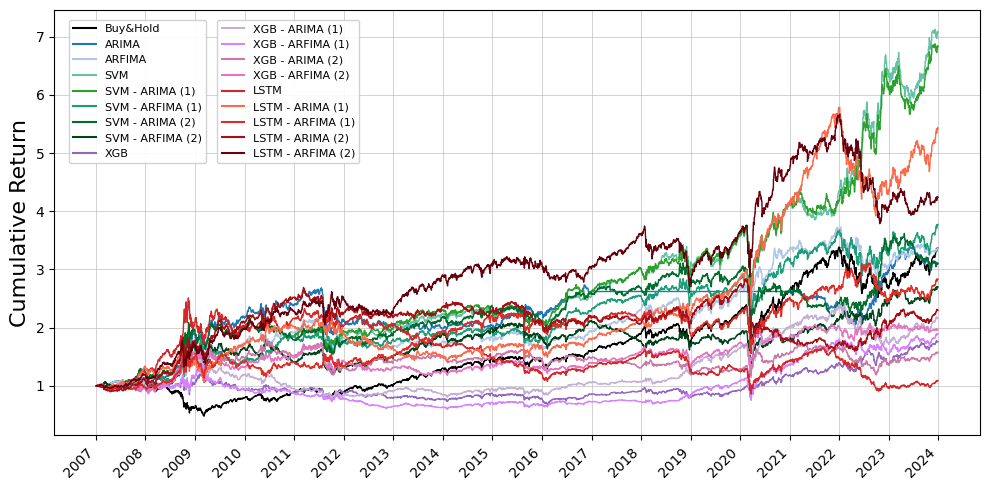

,ARIMA,ARFIMA,SVM,SVM - ARIMA (1),SVM - ARFIMA (1),SVM - ARIMA (2),SVM - ARFIMA (2),XGB,XGB - ARIMA (1),XGB - ARFIMA (1),XGB - ARIMA (2),XGB - ARFIMA (2),LSTM,LSTM - ARIMA (1),LSTM - ARFIMA (1),LSTM - ARIMA (2),LSTM - ARFIMA (2),Benchmark
Trades,1999.000000,1889.000000,1933.000000,1857.000000,2069.000000,2218.000000,2117.000000,1825.000000,1743.000000,1711.000000,2609.000000,2136.000000,1337.000000,865.000000,1047.000000,2073.000000,1879.000000,NaN
Long Trades,1000.000000,945.000000,967.000000,929.000000,1035.000000,1109.000000,1059.000000,913.000000,872.000000,856.000000,1305.000000,1068.000000,669.000000,433.000000,524.000000,1037.000000,940.000000,NaN
Short Trades,999.000000,944.000000,966.000000,928.000000,1034.000000,1109.000000,1058.000000,912.000000,871.000000,855.000000,1304.000000,1068.000000,668.000000,432.000000,523.000000,1036.000000,939.000000,NaN
Days in The Market,1967.000000,3308.000000,3267.000000,3314.000000,3204.000000,3137.000000,3192.000000,3325.000000,3369.000000,3386.000000,2944.000000,3188.000000,3554.000000,3819.000000,3740.000000,3192.000000,3312.000000,NaN
CAGR,6.887255,7.390163,12.196861,11.962636,8.111270,6.870227,6.011908,3.372229,4.648688,3.827773,2.706743,4.047040,0.495750,10.457889,6.308357,5.014453,8.865582,7.395083
ASD,14.238576,16.629582,17.997205,18.076893,17.859291,17.287262,17.456900,18.001702,17.951554,18.175112,17.264980,16.592357,18.418620,18.839017,18.597937,17.395232,17.166009,20.269440
MD,30.208302,27.184405,33.924960,33.924960,31.017354,35.426035,37.882076,47.839400,42.244421,56.466499,35.800864,31.253736,65.843264,36.578675,33.924960,43.671139,33.249190,56.775388
IR,0.483704,0.444399,0.677709,0.661764,0.454177,0.397416,0.344386,0.187328,0.258957,0.210605,0.156777,0.243910,0.026916,0.555119,0.339197,0.288266,0.516461,0.364839
Adj IR,0.110281,0.120811,0.243653,0.233352,0.118771,0.077071,0.054654,0.013205,0.028496,0.014277,0.011853,0.031584,0.000203,0.158709,0.063074,0.033100,0.137710,0.047521
SR,0.811151,0.704544,1.087927,1.064765,0.726661,0.645925,0.545939,0.286147,0.401460,0.328058,0.250895,0.380874,0.041105,0.888556,0.536735,0.452615,0.821919,0.562162


In [80]:
for i in range(1):

    print('\n')
    print(f'{i+1}')
    print('\n')
    
    df_profit_sp500_costs, trades_sp500_costs, long_sp500_costs, short_sp500_costs, days_in_market_sp500_costs = calculate_profit_costs_1(list_of_dfs[i], cost = 0.00005,
                             columns = models)

    
    plot_all_equity_lines_2(df = df_profit_sp500_costs, columns = columns_equity, models = models, title = "equity_1")
    print('\n')
    
    cagr_ratio_values_df = calculate_cagr(df_profit_sp500_costs)
    asd_ratio_values_df = calculate_asd(df_profit_sp500_costs)
    md_ratio_values_df = calculate_md(df_profit_sp500_costs)
    ir_ratio_values_df = calculate_ir(df_profit_sp500_costs)
    adj_ir_ratio_values_df = calculate_adj_ir(df_profit_sp500_costs)
    sr_ratio_values_df = calculate_sr(df_profit_sp500_costs)

    df_sp500_stats = pd.DataFrame(trades_sp500_costs, index = ['Trades'], columns = models, dtype = int)
    df_sp500_stats = pd.concat([df_sp500_stats, pd.DataFrame(long_sp500_costs, index = ['Long Trades'])])
    df_sp500_stats = pd.concat([df_sp500_stats, pd.DataFrame(short_sp500_costs, index = ['Short Trades'])])
    df_sp500_stats = pd.concat([df_sp500_stats, pd.DataFrame(days_in_market_sp500_costs, index = ['Days in The Market'])])
    df_sp500_stats = pd.concat([df_sp500_stats, cagr_ratio_values_df])
    df_sp500_stats = pd.concat([df_sp500_stats, asd_ratio_values_df])
    df_sp500_stats = pd.concat([df_sp500_stats, md_ratio_values_df])
    df_sp500_stats = pd.concat([df_sp500_stats, ir_ratio_values_df])
    df_sp500_stats = pd.concat([df_sp500_stats, adj_ir_ratio_values_df])
    df_sp500_stats = pd.concat([df_sp500_stats, sr_ratio_values_df])

    print('\n')

    display(df_sp500_stats)


In [156]:
with open('', 'wb') as f:
    
    pickle.dump(df_profit_sp500_costs, f)
    pickle.dump(trades_sp500_costs, f)
    pickle.dump(long_sp500_costs, f)
    pickle.dump(short_sp500_costs, f)
    pickle.dump(days_in_market_sp500_costs, f)



1




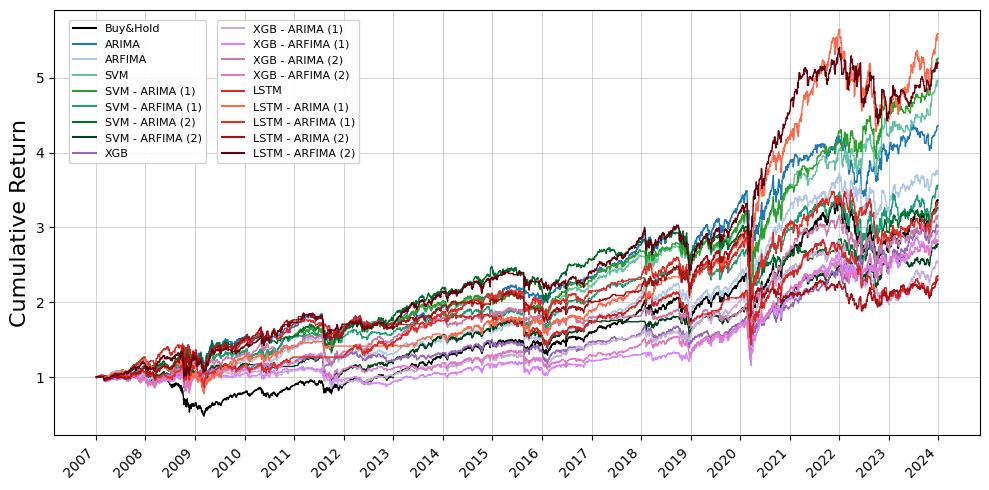

,ARIMA,ARFIMA,SVM,SVM - ARIMA (1),SVM - ARFIMA (1),SVM - ARIMA (2),SVM - ARFIMA (2),XGB,XGB - ARIMA (1),XGB - ARFIMA (1),XGB - ARIMA (2),XGB - ARFIMA (2),LSTM,LSTM - ARIMA (1),LSTM - ARFIMA (1),LSTM - ARIMA (2),LSTM - ARFIMA (2),Benchmark
Trades,1545.000000,1493.000000,1503.000000,1427.000000,1607.000000,1703.000000,1685.000000,1423.000000,1343.000000,1331.000000,2039.000000,1679.000000,999.000000,639.000000,813.000000,1551.000000,1483.000000,NaN
Long Trades,773.000000,747.000000,752.000000,714.000000,804.000000,852.000000,843.000000,712.000000,672.000000,666.000000,1020.000000,840.000000,500.000000,320.000000,407.000000,776.000000,742.000000,NaN
Short Trades,772.000000,746.000000,751.000000,713.000000,803.000000,851.000000,842.000000,711.000000,671.000000,665.000000,1019.000000,839.000000,499.000000,319.000000,406.000000,775.000000,741.000000,NaN
Days in The Market,3182.000000,3676.000000,3496.000000,3471.000000,3497.000000,3387.000000,3296.000000,3805.000000,3618.000000,3563.000000,3464.000000,3546.000000,3189.000000,3294.000000,3587.000000,3161.000000,3431.000000,NaN
CAGR,9.036672,8.095778,9.873391,10.245621,7.746385,7.193933,6.184194,6.708351,5.618197,6.562867,6.987457,6.287009,5.153270,10.640571,7.332483,5.019739,10.172854,7.395083
ASD,16.058202,16.061744,16.634811,16.672993,16.658191,15.883308,16.241450,17.274772,17.050802,16.876881,16.168680,15.686682,16.027990,17.481655,16.923230,15.852018,16.093223,20.269440
MD,33.924960,29.563826,33.924960,33.924960,30.670791,33.562855,31.999788,31.057277,33.924960,34.124496,27.572618,29.563826,33.924960,37.472604,33.924960,38.498321,25.561685,56.775388
IR,0.562745,0.504041,0.593538,0.614504,0.465020,0.452924,0.380766,0.388332,0.329498,0.388867,0.432160,0.400786,0.321517,0.608671,0.433279,0.316662,0.632120,0.364839
Adj IR,0.149900,0.138027,0.172741,0.185585,0.117448,0.097081,0.073586,0.083880,0.054567,0.074787,0.109518,0.085231,0.048839,0.172836,0.093648,0.041289,0.251567,0.047521
SR,0.861457,0.762992,0.909211,0.942350,0.711829,0.688851,0.569181,0.589413,0.497595,0.592059,0.667316,0.604080,0.475102,0.939135,0.662055,0.467194,0.966669,0.562162


In [81]:
for i in range(1):

    print('\n')
    print(f'{i+1}')
    print('\n')
    
    df_profit_sp500_costs, trades_sp500_costs, long_sp500_costs, short_sp500_costs, days_in_market_sp500_costs = calculate_profit_costs_2(list_of_dfs[i], cost = 0.00005,
                             columns = models)

    
    plot_all_equity_lines_2(df = df_profit_sp500_costs, columns = columns_equity, models = models, title = 'equity_2')
    print('\n')
    
    cagr_ratio_values_df = calculate_cagr(df_profit_sp500_costs)
    asd_ratio_values_df = calculate_asd(df_profit_sp500_costs)
    md_ratio_values_df = calculate_md(df_profit_sp500_costs)
    ir_ratio_values_df = calculate_ir(df_profit_sp500_costs)
    adj_ir_ratio_values_df = calculate_adj_ir(df_profit_sp500_costs)
    sr_ratio_values_df = calculate_sr(df_profit_sp500_costs)

    df_sp500_stats = pd.DataFrame(trades_sp500_costs, index = ['Trades'], columns = models, dtype = int)
    df_sp500_stats = pd.concat([df_sp500_stats, pd.DataFrame(long_sp500_costs, index = ['Long Trades'])])
    df_sp500_stats = pd.concat([df_sp500_stats, pd.DataFrame(short_sp500_costs, index = ['Short Trades'])])
    df_sp500_stats = pd.concat([df_sp500_stats, pd.DataFrame(days_in_market_sp500_costs, index = ['Days in The Market'])])
    df_sp500_stats = pd.concat([df_sp500_stats, cagr_ratio_values_df])
    df_sp500_stats = pd.concat([df_sp500_stats, asd_ratio_values_df])
    df_sp500_stats = pd.concat([df_sp500_stats, md_ratio_values_df])
    df_sp500_stats = pd.concat([df_sp500_stats, ir_ratio_values_df])
    df_sp500_stats = pd.concat([df_sp500_stats, adj_ir_ratio_values_df])
    df_sp500_stats = pd.concat([df_sp500_stats, sr_ratio_values_df])

    print('\n')
    display(df_sp500_stats)


In [158]:
with open('', 'wb') as f:
    
    pickle.dump(df_profit_sp500_costs, f)
    pickle.dump(trades_sp500_costs, f)
    pickle.dump(long_sp500_costs, f)
    pickle.dump(short_sp500_costs, f)
    pickle.dump(days_in_market_sp500_costs, f)